In [94]:
import pandas as pd
import numpy as np

In [95]:
df = pd.read_csv('/content/PricingData.csv')
df

Seat Fare Type 1  ...        RecordedAt
0                    900.00,800.00  ...  11-07-2020 16:28
1      910.00,833.00,795.00,762.00  ...  11-07-2020 19:17
2      910.00,833.00,795.00,762.00  ...  12-07-2020 09:02
3      910.00,833.00,795.00,762.00  ...  12-07-2020 10:05
4      876.00,800.00,767.00,729.00  ...  13-07-2020 01:53
...                            ...  ...               ...
30644                925.00,810.00  ...  30-07-2020 07:59
30645                925.00,810.00  ...  30-07-2020 07:59
30646                925.00,810.00  ...  30-07-2020 08:08
30647                925.00,810.00  ...  30-07-2020 08:21
30648                925.00,810.00  ...  30-07-2020 08:21

[30649 rows x 5 columns]

In [96]:
df.isna().sum() #30767

Seat Fare Type 1    12864
Seat Fare Type 2    17903
Bus                     0
Service Date            0
RecordedAt              0
dtype: int64

In [97]:
c=0
lst_Fair_1 = []
lst_Fair_2 = []
for i in range(30649):
  try:
    ab = df['Seat Fare Type 1'][i].split(',')
    ab = list(np.float64(ab))
    if len(ab) != 8:    ###   Assuming the total tyes of seats are 8.
      # print(ab)
      for j in range(len(ab), 8):
        ab.append('None')
    lst_Fair_1.append(ab)
    # print(lst_Fair_1)
  except:
    lst_Fair_1.append(['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'])
  #   lst_Fair_1.append('None', 'None', 'None', 'None')
  try:
      ab = df['Seat Fare Type 2'][i].split(',')
      ab = list(np.float64(ab))
      if len(ab) != 8:
        for j in range(len(ab), 8):
          ab.append('None')
      # print(ab)
      lst_Fair_2.append(ab)
      # print(lst_Fair_2)
  except:
      lst_Fair_2.append(['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'])
      c+=1
print(c)

# lst = np.array(lst)
# lst
lst_Fair_1 = np.array(lst_Fair_1)
lst_Fair_2 = np.array(lst_Fair_2)

17903


In [98]:
print(lst_Fair_1.shape, lst_Fair_2.shape)
print(lst_Fair_1)
print(lst_Fair_2)


(30649, 8) (30649, 8)
[['900.0' '800.0' 'None' ... 'None' 'None' 'None']
 ['910.0' '833.0' '795.0' ... 'None' 'None' 'None']
 ['910.0' '833.0' '795.0' ... 'None' 'None' 'None']
 ...
 ['925.0' '810.0' 'None' ... 'None' 'None' 'None']
 ['925.0' '810.0' 'None' ... 'None' 'None' 'None']
 ['925.0' '810.0' 'None' ... 'None' 'None' 'None']]
[['None' 'None' 'None' ... 'None' 'None' 'None']
 ['None' 'None' 'None' ... 'None' 'None' 'None']
 ['None' 'None' 'None' ... 'None' 'None' 'None']
 ...
 ['None' 'None' 'None' ... 'None' 'None' 'None']
 ['None' 'None' 'None' ... 'None' 'None' 'None']
 ['None' 'None' 'None' ... 'None' 'None' 'None']]


In [99]:
##  peparing the final list of two prices..

final_price_list = []

for i  in range(30649):
  final_price_list.append([lst_Fair_1[i], lst_Fair_2[i]])

final_price_list = np.array(final_price_list)
print(final_price_list.shape)
print(final_price_list)

(30649, 2, 8)
[[['900.0' '800.0' 'None' ... 'None' 'None' 'None']
  ['None' 'None' 'None' ... 'None' 'None' 'None']]

 [['910.0' '833.0' '795.0' ... 'None' 'None' 'None']
  ['None' 'None' 'None' ... 'None' 'None' 'None']]

 [['910.0' '833.0' '795.0' ... 'None' 'None' 'None']
  ['None' 'None' 'None' ... 'None' 'None' 'None']]

 ...

 [['925.0' '810.0' 'None' ... 'None' 'None' 'None']
  ['None' 'None' 'None' ... 'None' 'None' 'None']]

 [['925.0' '810.0' 'None' ... 'None' 'None' 'None']
  ['None' 'None' 'None' ... 'None' 'None' 'None']]

 [['925.0' '810.0' 'None' ... 'None' 'None' 'None']
  ['None' 'None' 'None' ... 'None' 'None' 'None']]]


In [100]:
df.fillna(0)

Seat Fare Type 1  ...        RecordedAt
0                    900.00,800.00  ...  11-07-2020 16:28
1      910.00,833.00,795.00,762.00  ...  11-07-2020 19:17
2      910.00,833.00,795.00,762.00  ...  12-07-2020 09:02
3      910.00,833.00,795.00,762.00  ...  12-07-2020 10:05
4      876.00,800.00,767.00,729.00  ...  13-07-2020 01:53
...                            ...  ...               ...
30644                925.00,810.00  ...  30-07-2020 07:59
30645                925.00,810.00  ...  30-07-2020 07:59
30646                925.00,810.00  ...  30-07-2020 08:08
30647                925.00,810.00  ...  30-07-2020 08:21
30648                925.00,810.00  ...  30-07-2020 08:21

[30649 rows x 5 columns]

In [101]:
import sklearn
from sklearn.manifold import TSNE

In [102]:
#  lst = np.array(lst)
#  lst = np.expand_dims(lst, -1)
#  X_embedded = TSNE(n_components=2, learning_rate='auto',
#                   init='random').fit_transform(lst)

In [103]:
# X_embedded.shape

In [104]:
output = pd.read_csv('/content/sample_output.csv')
output

Bus  ...  Confidence Score (0 to 1).1
0    d6fa79179fda2a77455794637f225962  ...                          NaN
1    23400e84ea8d9f642252d1c343d26464  ...                          NaN
2    cfa18a60741f6e93df4f7ea15cb0e30b  ...                          NaN
3    55d025d1d77431effef6d6680a2aea33  ...                          NaN
4    1e8f943f51641d72889455e26d49dec7  ...                          NaN
..                                ...  ...                          ...
112  52725e18d5c8af87b097a33ca2282a10  ...                          NaN
113  29b77a9e58d23bf43daa780eb8b7db65  ...                          NaN
114  241f07f1fafbd5405c0139ae4a148a74  ...                          NaN
115  23c7bd7bcab9a19b7da7cae4e3d4659a  ...                          NaN
116  1d5363d20e0f4941bdf3084f131938b2  ...                          NaN

[117 rows x 5 columns]

In [105]:
output.isna().sum()

Bus                              0
Follows                        117
Confidence Score (0 to 1)      117
Is followed by                 117
Confidence Score (0 to 1).1    117
dtype: int64

In [106]:
c=0
lst_Fair_1 = []
lst_Fair_2 = []
for i in range(30649):
  try:
    ab = df['Seat Fare Type 1'][i].split(',')
    ab = list(np.float64(ab))
    if len(ab) != 8:    ###   Assuming the total tyes of seats are 8.
      # print(ab)
      for j in range(len(ab), 8):
        ab.append(0)
    lst_Fair_1.append(ab)
    # print(lst_Fair_1)
  except:
    lst_Fair_1.append([0,0,0,0,0,0,0,0])
  #   lst_Fair_1.append('None', 'None', 'None', 'None')
  try:
      ab = df['Seat Fare Type 2'][i].split(',')
      ab = list(np.float64(ab))
      if len(ab) != 8:
        for j in range(len(ab), 8):
          ab.append(0)
      # print(ab)
      lst_Fair_2.append(ab)
      # print(lst_Fair_2)
  except:
      lst_Fair_2.append([0,0,0,0,0,0,0,0])
      c+=1
print(c)

# lst = np.array(lst)
# lst
lst_Fair_1 = np.array(lst_Fair_1)
lst_Fair_2 = np.array(lst_Fair_2)

final_price_list = []

for i  in range(30649):
  final_price_list.append(lst_Fair_1[i])
  final_price_list.append(lst_Fair_2[i])

final_price_list = np.array(final_price_list)
print(final_price_list.shape)
print(final_price_list)


17903
(61298, 8)
[[900. 800.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [910. 833. 795. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [925. 810.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [107]:
# from sklearn.cluster import KMeans
# import sklearn
# from sklearn.manifold import TSNE
# Tsne = TSNE(n_components=2, random_state=0).fit(final_price_list)

In [108]:
final_price_list.shape

(61298, 8)

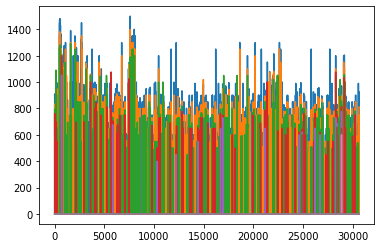

In [109]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# figure(figsize=(18, 18), dpi=80)
plt.plot(lst_Fair_1)
plt.show()

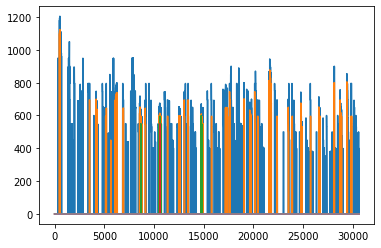

In [110]:
from matplotlib.pyplot import figure

# figure(figsize=(18, 18), dpi=80)

plt.plot(lst_Fair_2)
plt.show()

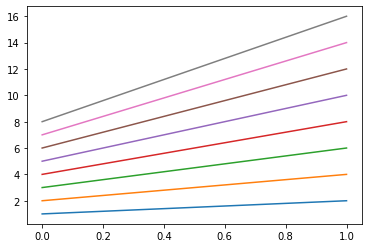

In [111]:
plt.plot([[1,2,3,4,5,6,7,8], [2,4,6,8,10,12,14,16]])
plt.show()

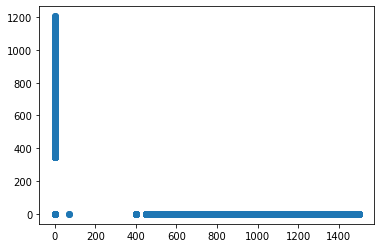

In [112]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import figure

# figure(figsize=(18, 18), dpi=80)
# figure(figsize=(18, 18), dpi=80)
plt.scatter(lst_Fair_1, lst_Fair_2)
plt.show()


In [125]:
buses = df['Bus']
print(buses)
buses = sorted(buses)
buses = set(buses)
print(len(buses))
buses = list(buses)

0        d6fa79179fda2a77455794637f225962
1        d6fa79179fda2a77455794637f225962
2        d6fa79179fda2a77455794637f225962
3        d6fa79179fda2a77455794637f225962
4        d6fa79179fda2a77455794637f225962
                       ...               
30644    6ebe14c775a983e43b07c55e6b71d77d
30645    6ebe14c775a983e43b07c55e6b71d77d
30646    6ebe14c775a983e43b07c55e6b71d77d
30647    6ebe14c775a983e43b07c55e6b71d77d
30648    6ebe14c775a983e43b07c55e6b71d77d
Name: Bus, Length: 30649, dtype: object
117


In [115]:
## preparing the dictionary ids
final_dic_1 = {}
for i in range(117):
  final_dic_1[buses[i]] = []
# final_dic

final_dic_2 = {}
for i in range(117):
  final_dic_2[buses[i]] = []

In [116]:
c=0
lst_Fair_1 = []
lst_Fair_2 = []
for i in range(30649):
  try:
    ab = df['Seat Fare Type 1'][i].split(',')
    ab = list(np.float64(ab))
    if len(ab) != 8:    ###   Assuming the total tyes of seats are 8.
      # print(ab)
      for j in range(len(ab), 8):
        ab.append(0)
    lst_Fair_1.append(ab)
    final_dic_1[df['Bus'][i]].append(ab)
    # print(lst_Fair_1)
  except:
    ab = [0,0,0,0,0,0,0,0]
    lst_Fair_1.append(ab)
    final_dic_1[df['Bus'][i]].append(ab)
  #   lst_Fair_1.append('None', 'None', 'None', 'None')
  try:
      ab = df['Seat Fare Type 2'][i].split(',')
      ab = list(np.float64(ab))
      if len(ab) != 8:
        for j in range(len(ab), 8):
          ab.append(0)
      # print(ab)
      lst_Fair_2.append(ab)
      final_dic_2[df['Bus'][i]].append(ab)
      # print(lst_Fair_2)
  except:
      ab= [0,0,0,0,0,0,0,0]
      lst_Fair_2.append(ab)
      final_dic_2[df['Bus'][i]].append(ab)
      c+=1
print(c)

# lst = np.array(lst)
# lst
lst_Fair_1 = np.array(lst_Fair_1)
lst_Fair_2 = np.array(lst_Fair_2)

final_price_list = []

for i  in range(30649):
  final_price_list.append(lst_Fair_1[i])
  final_price_list.append(lst_Fair_2[i])

final_price_list = np.array(final_price_list)
print(final_price_list.shape)
print(final_price_list)


17903
(61298, 8)
[[900. 800.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [910. 833. 795. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [925. 810.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [124]:
print(final_dic_1['6ebe14c775a983e43b07c55e6b71d77d'])

[[1450.0, 1350.0, 0, 0, 0, 0, 0, 0], [1450.0, 1350.0, 0, 0, 0, 0, 0, 0], [1450.0, 1350.0, 0, 0, 0, 0, 0, 0], [1450.0, 1350.0, 0, 0, 0, 0, 0, 0], [1450.0, 1350.0, 0, 0, 0, 0, 0, 0], [1450.0, 1350.0, 0, 0, 0, 0, 0, 0], [1450.0, 1350.0, 0, 0, 0, 0, 0, 0], [1450.0, 1350.0, 0, 0, 0, 0, 0, 0], [1450.0, 1350.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0, 0, 0], [1249.0, 1110.0, 0, 0, 0, 0

117


<Figure size 800x800 with 0 Axes>

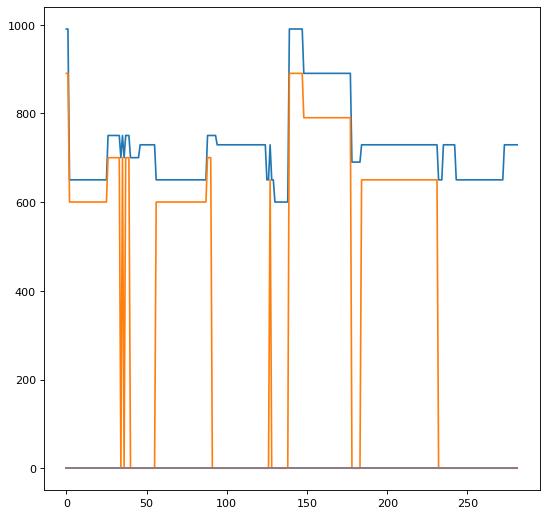

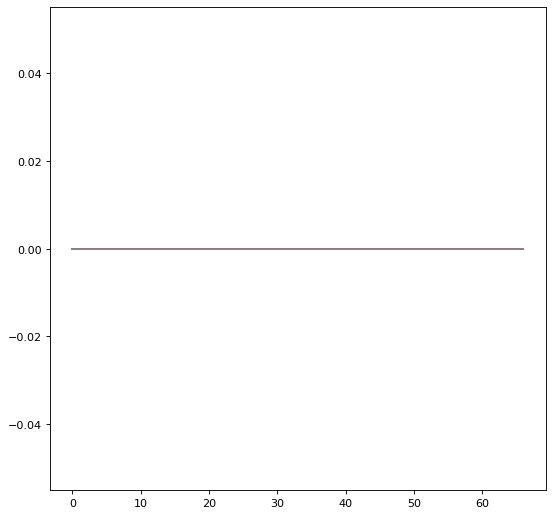

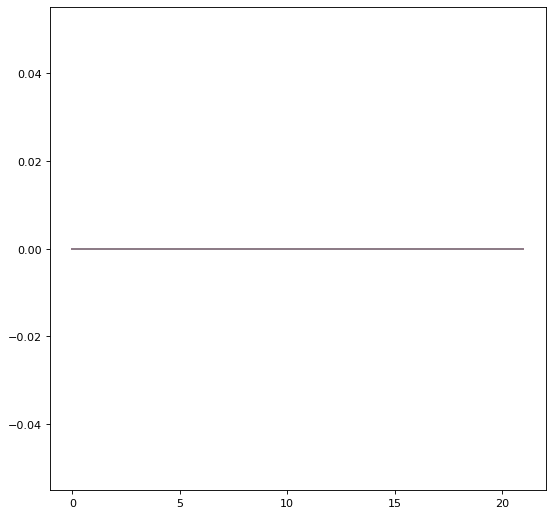

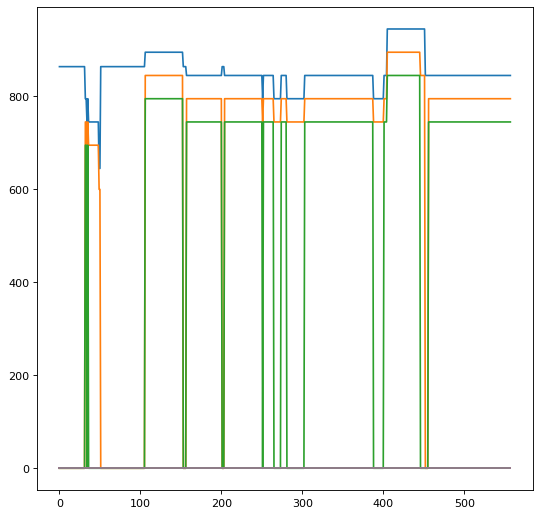

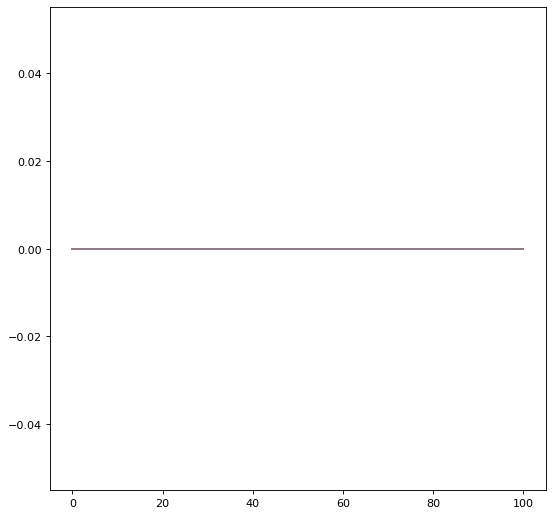

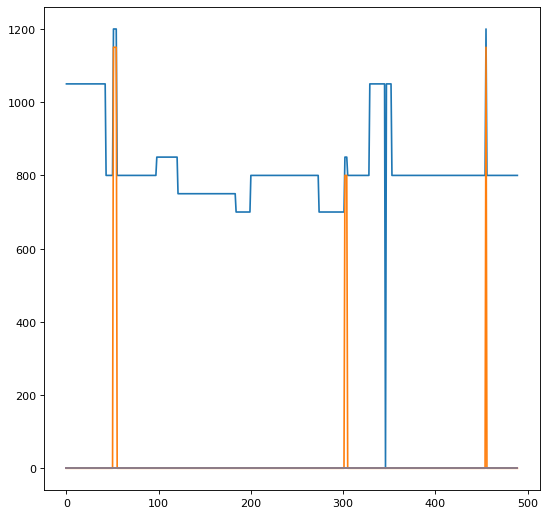

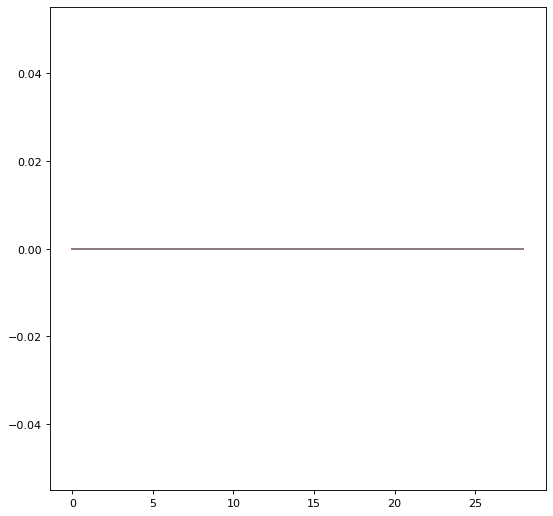

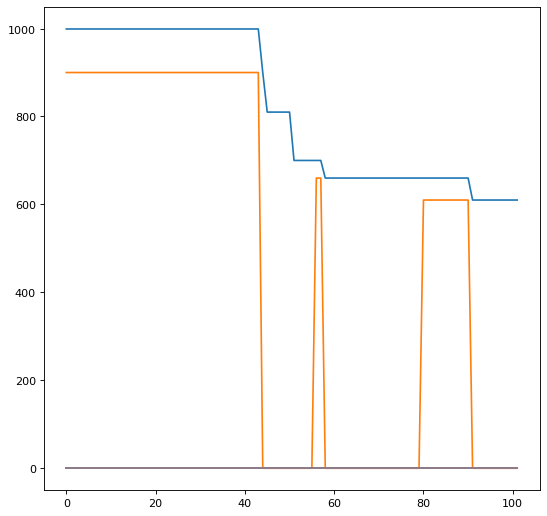

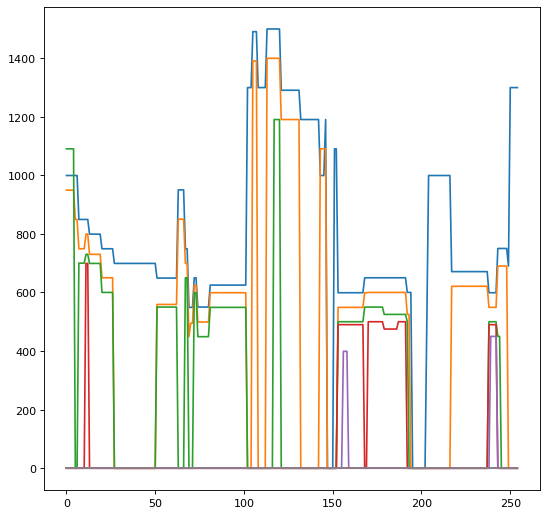

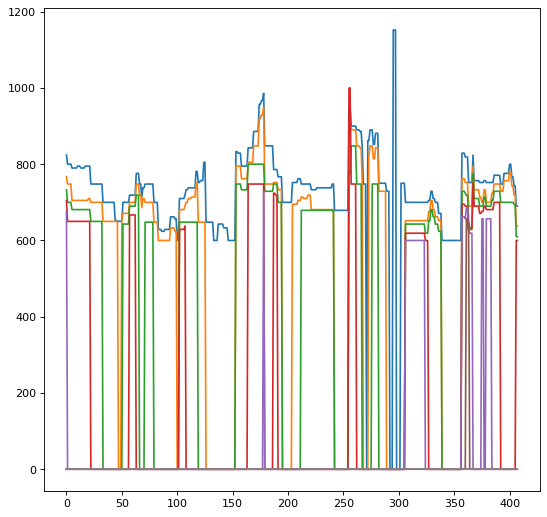

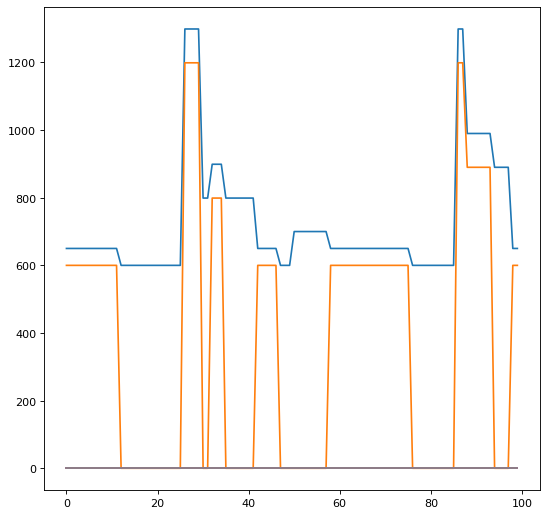

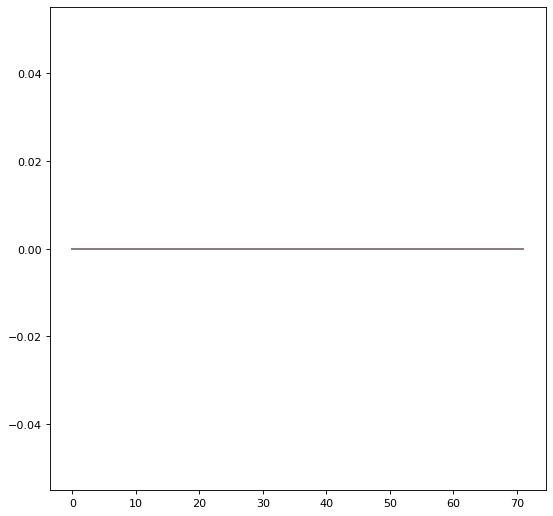

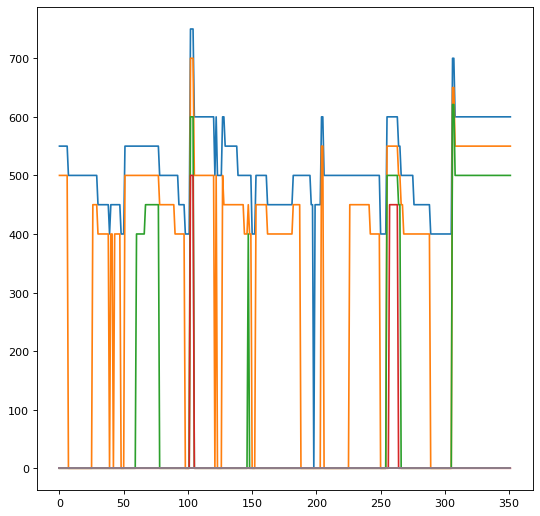

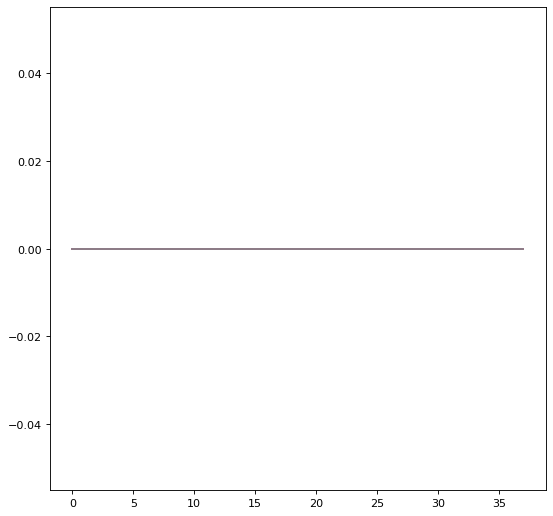

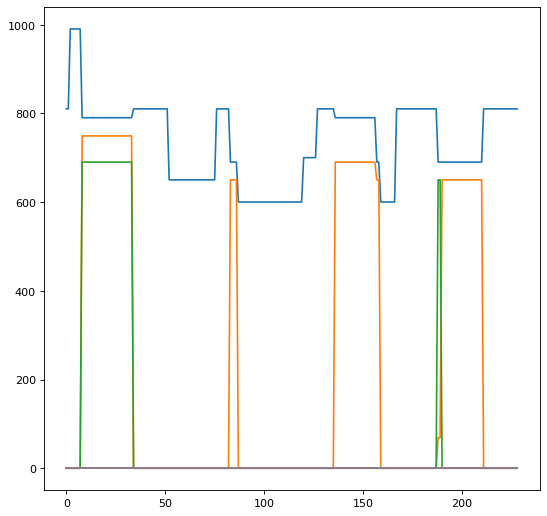

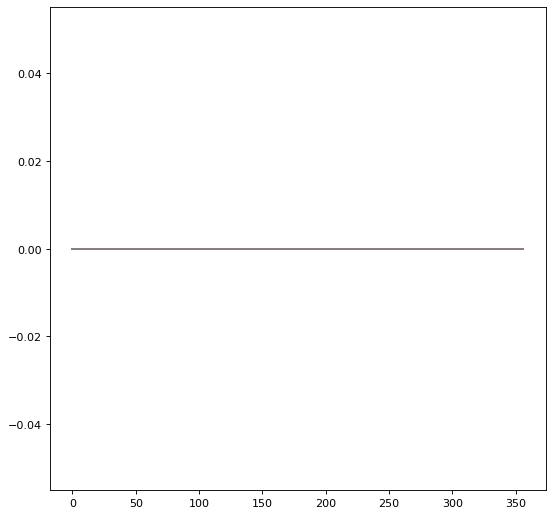

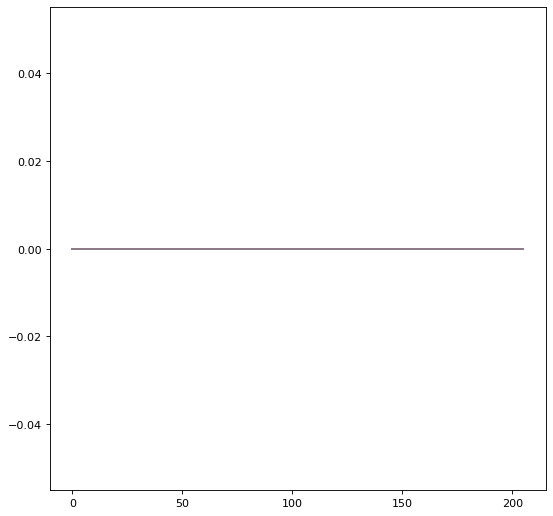

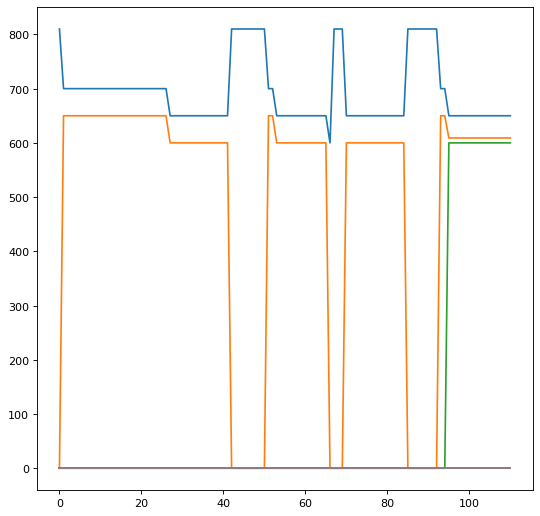

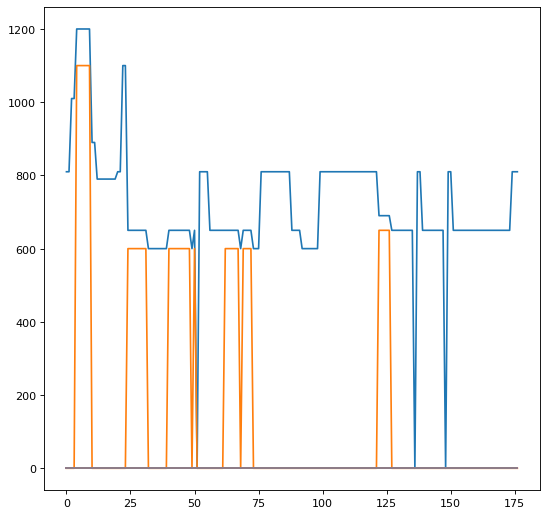

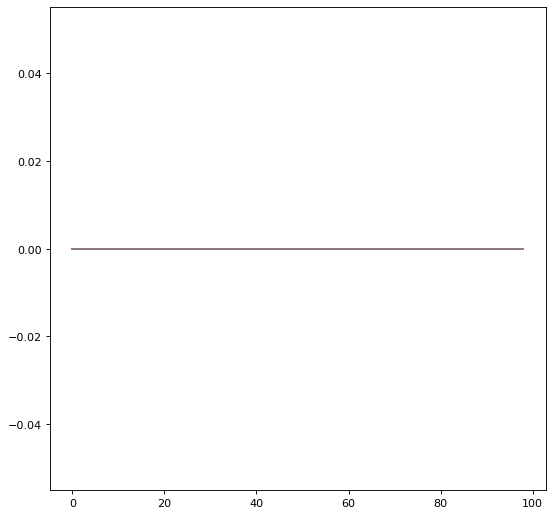

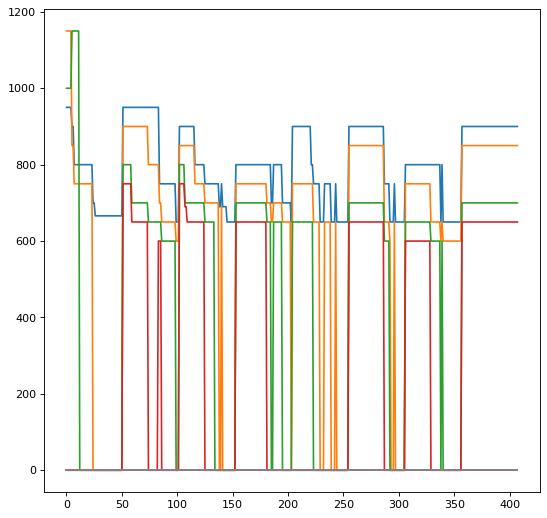

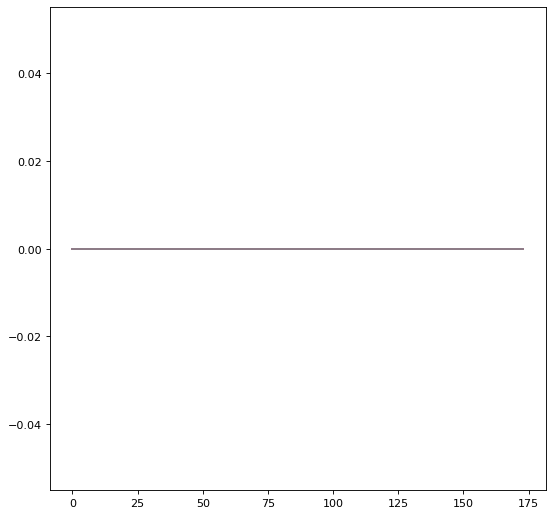

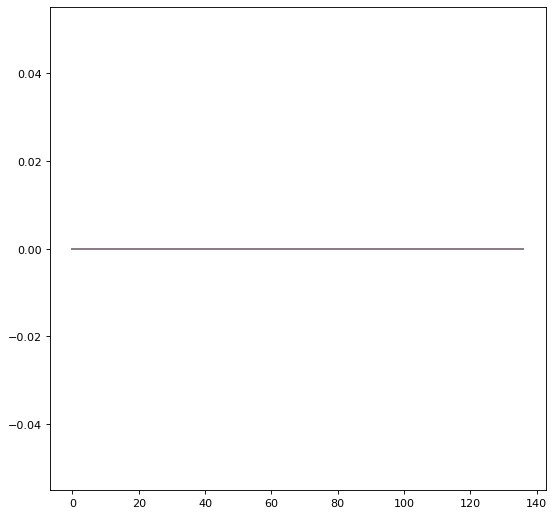

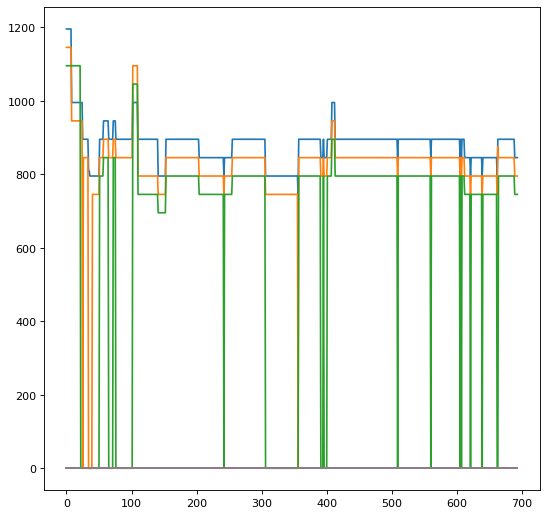

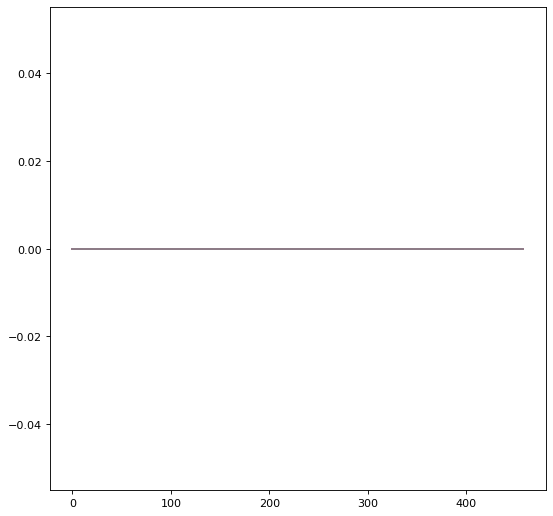

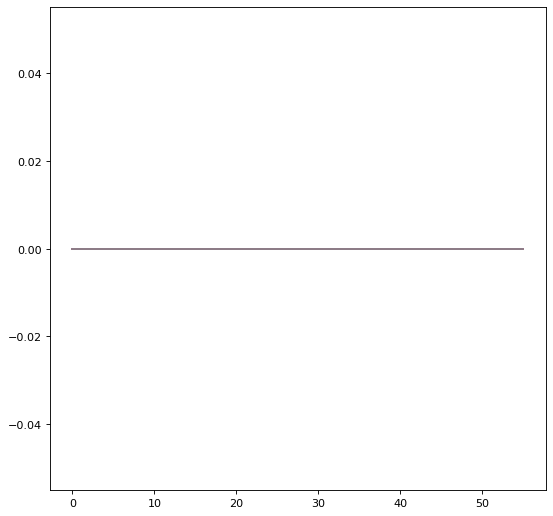

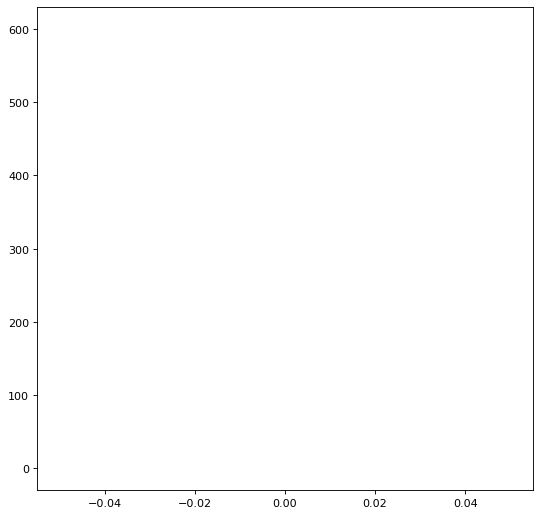

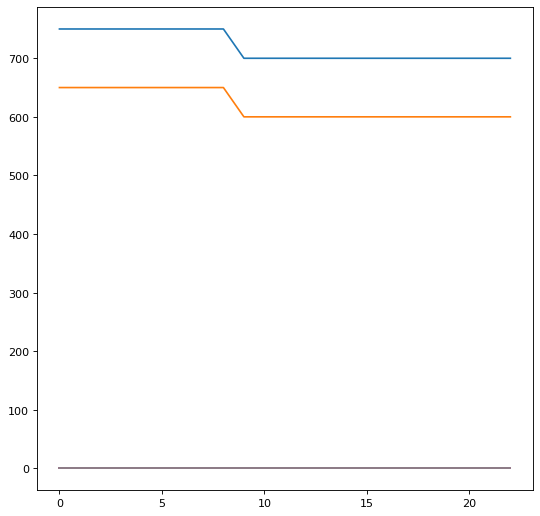

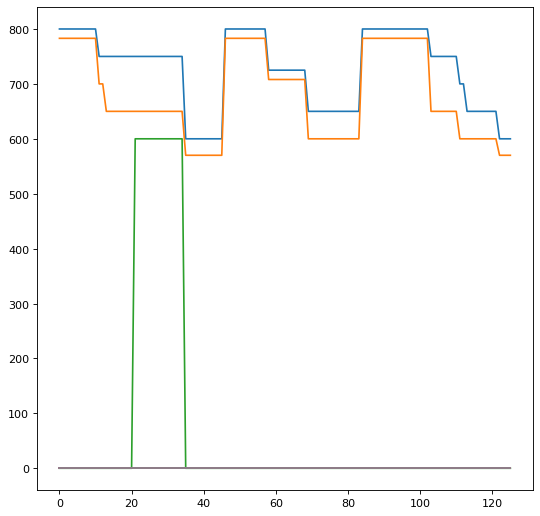

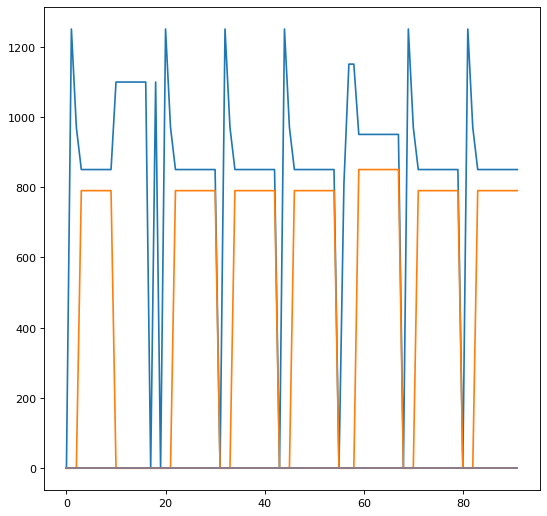

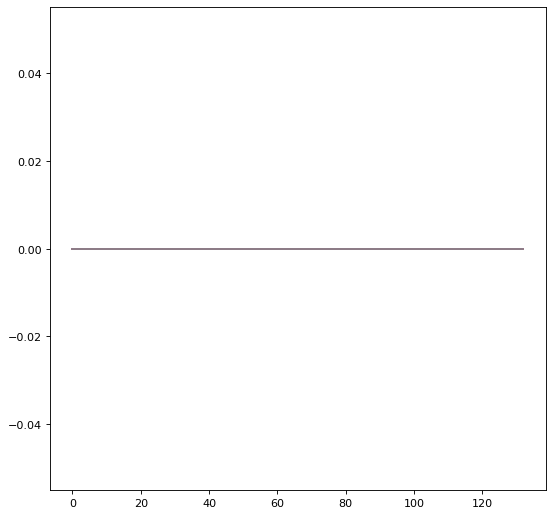

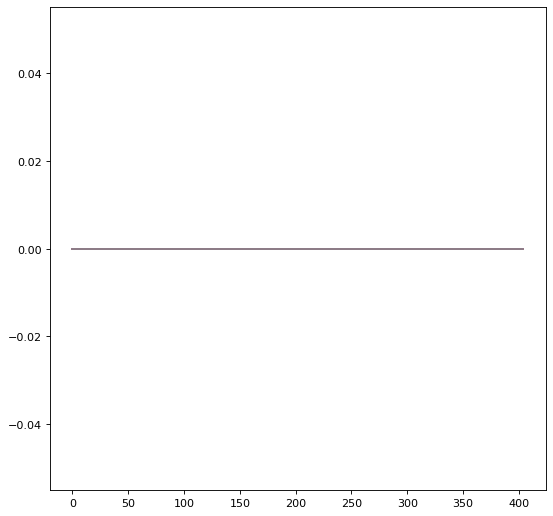

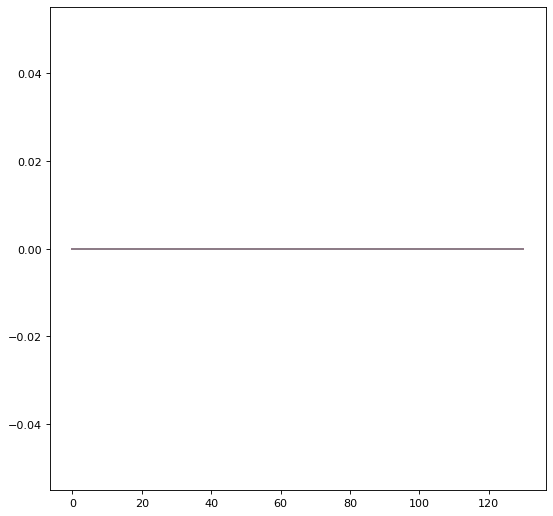

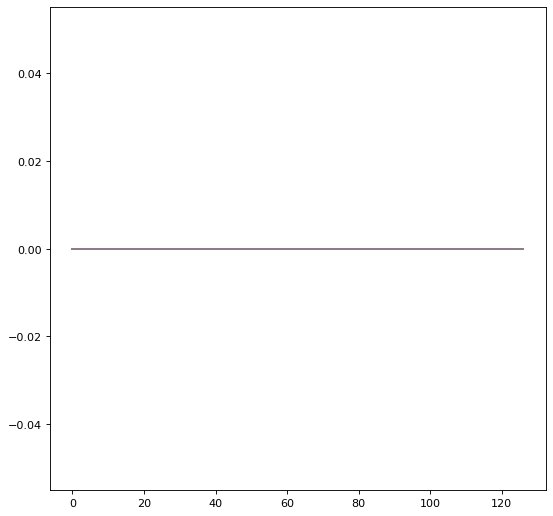

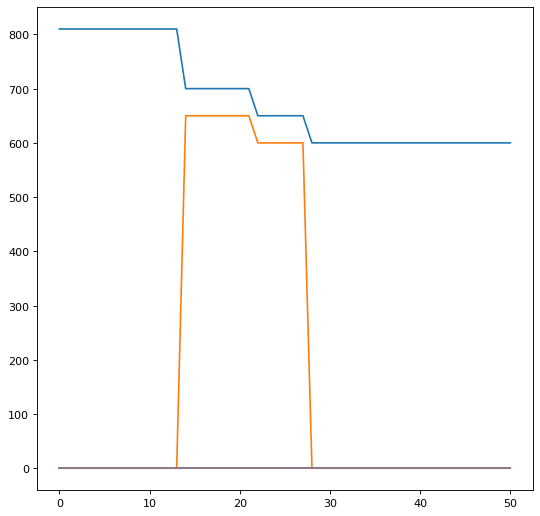

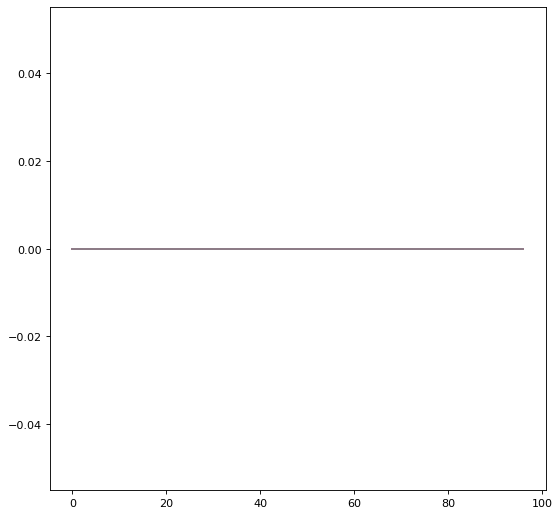

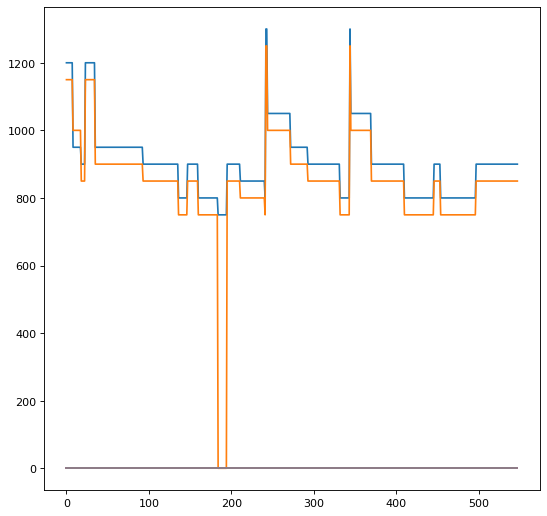

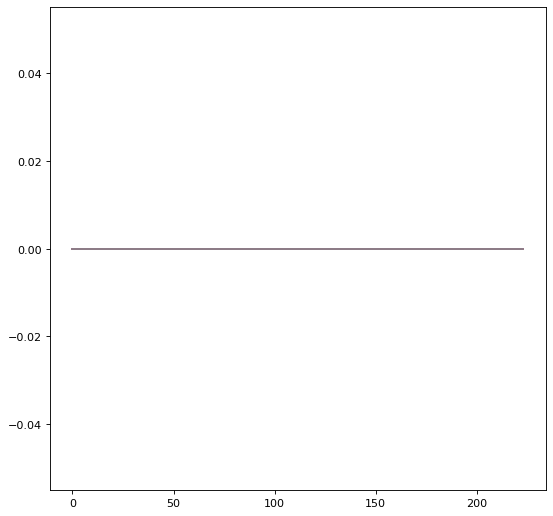

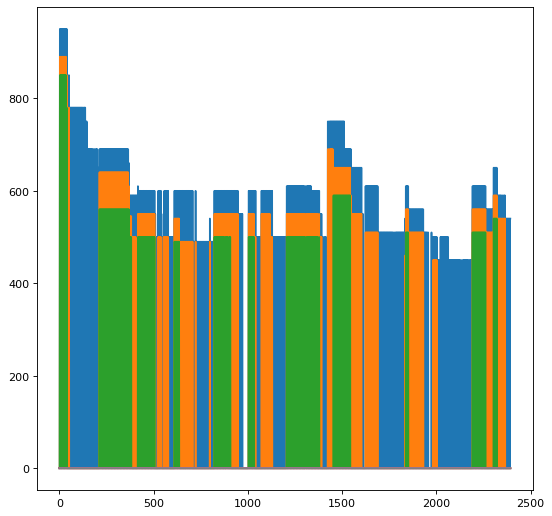

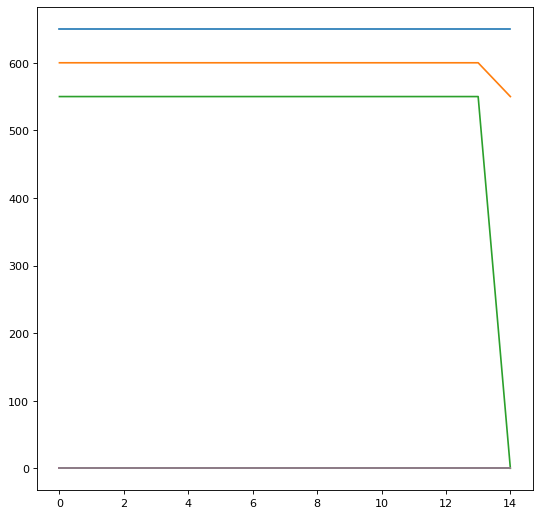

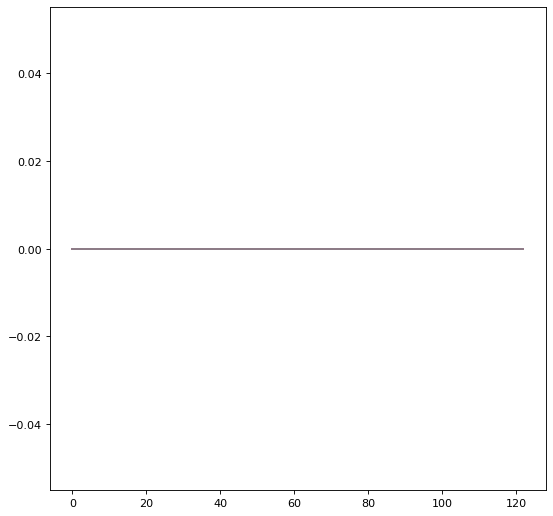

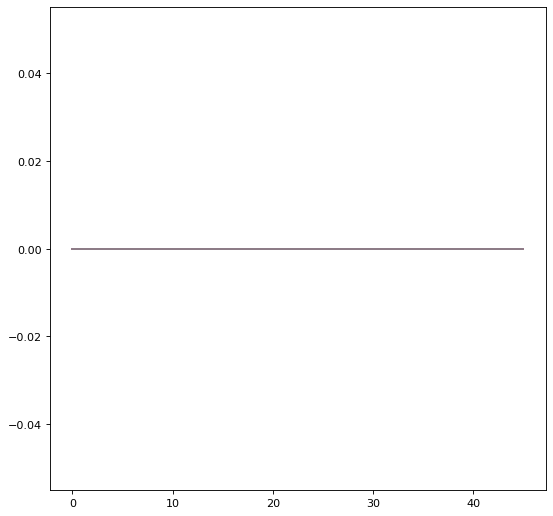

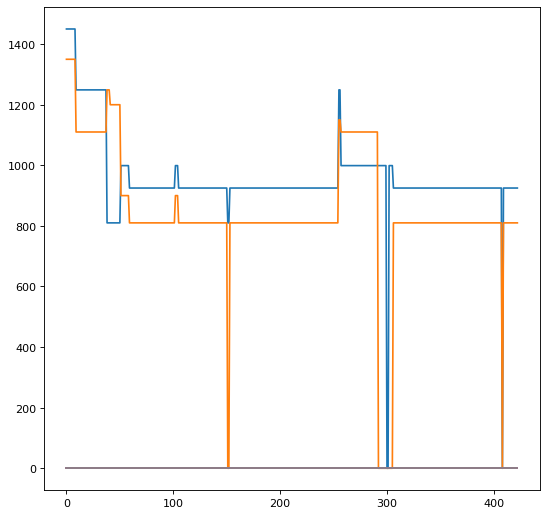

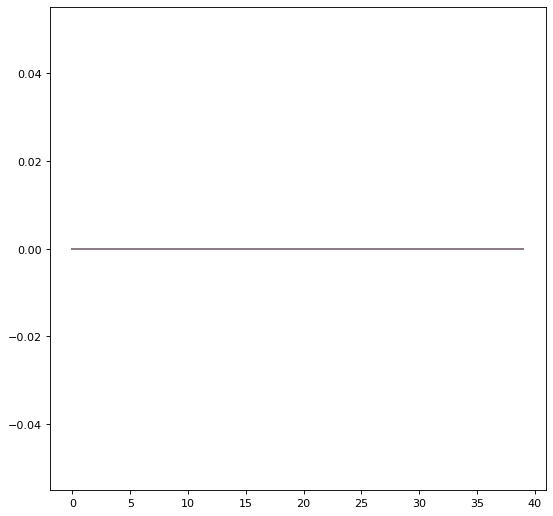

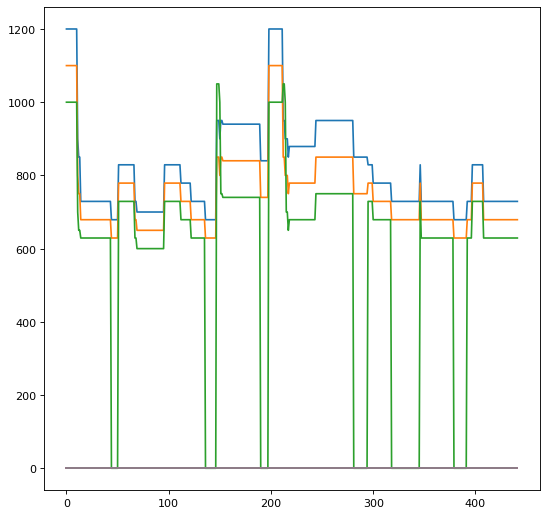

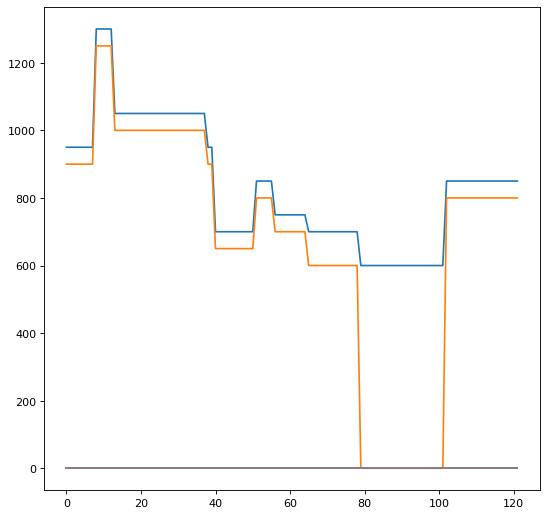

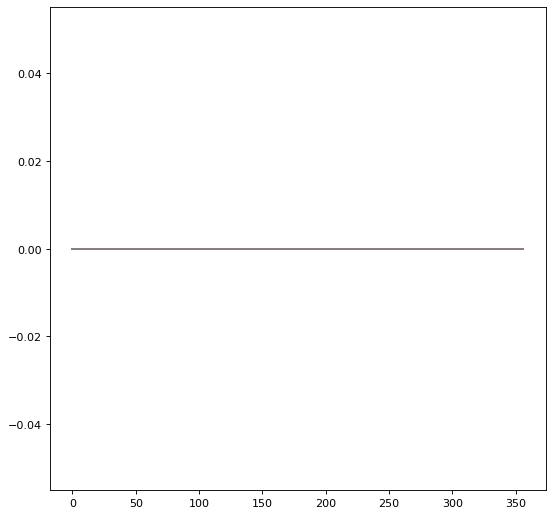

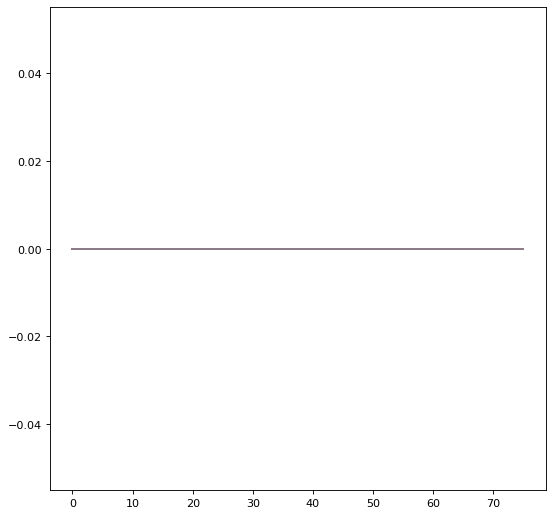

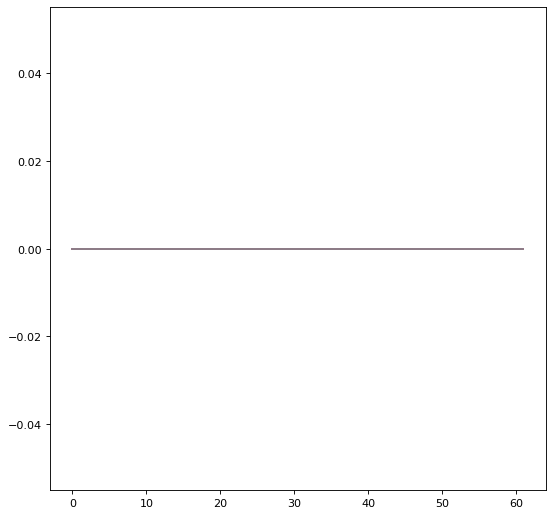

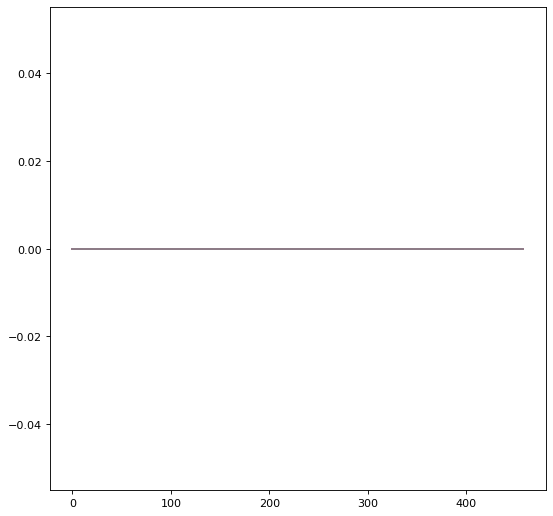

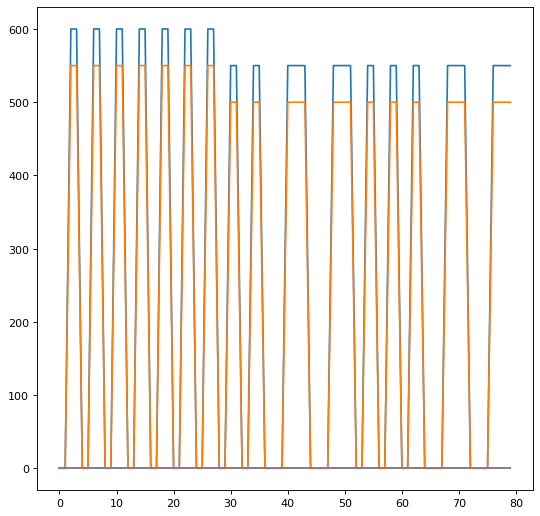

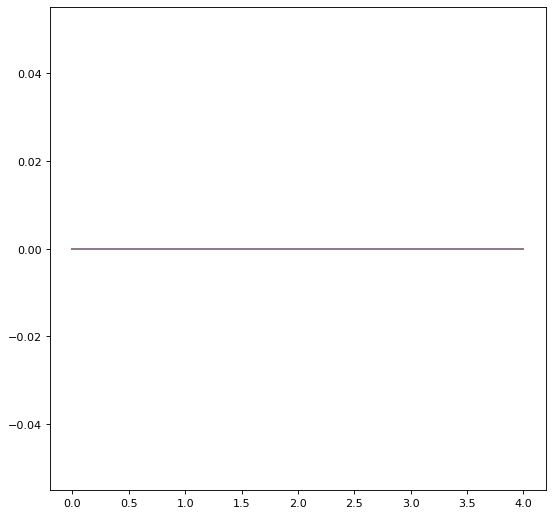

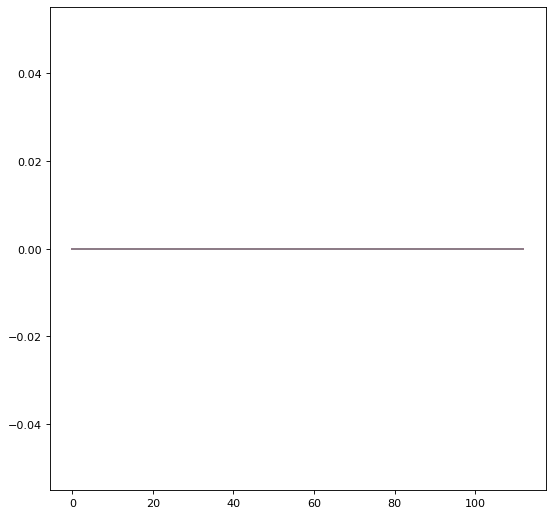

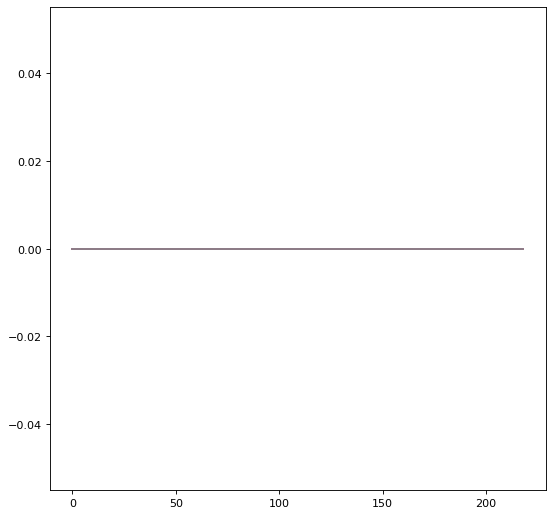

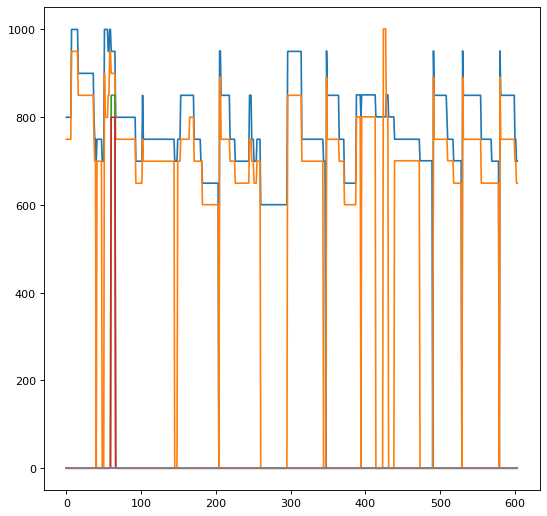

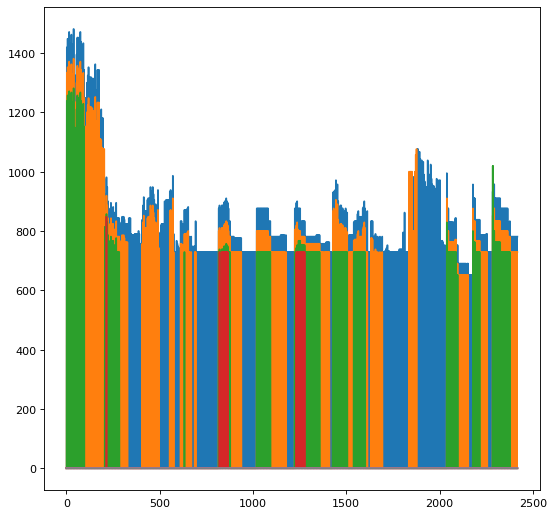

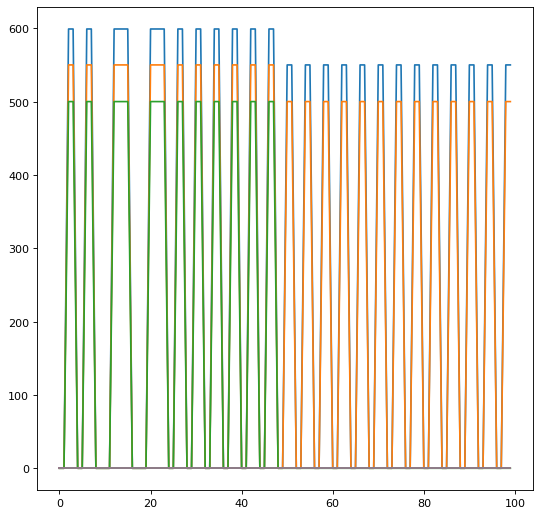

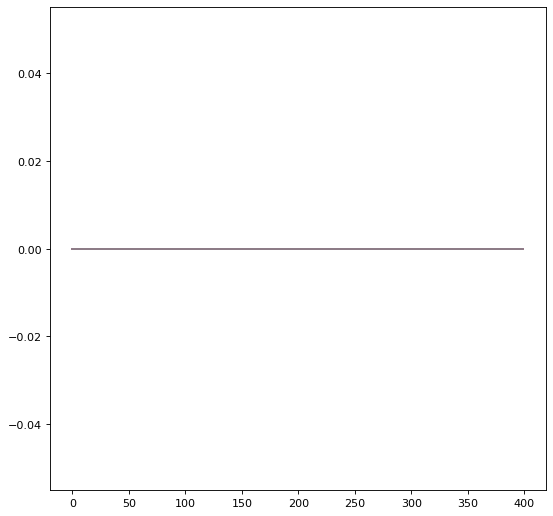

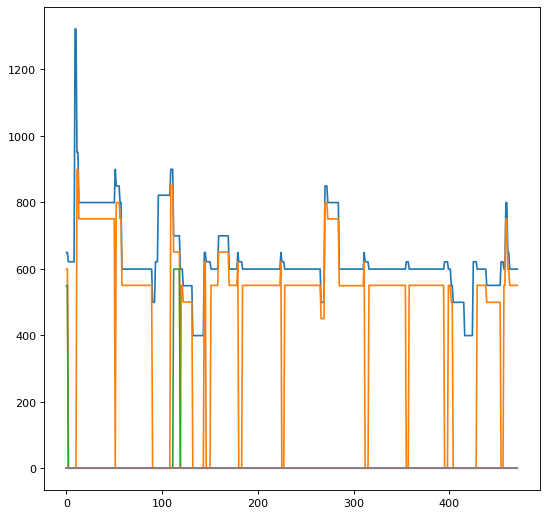

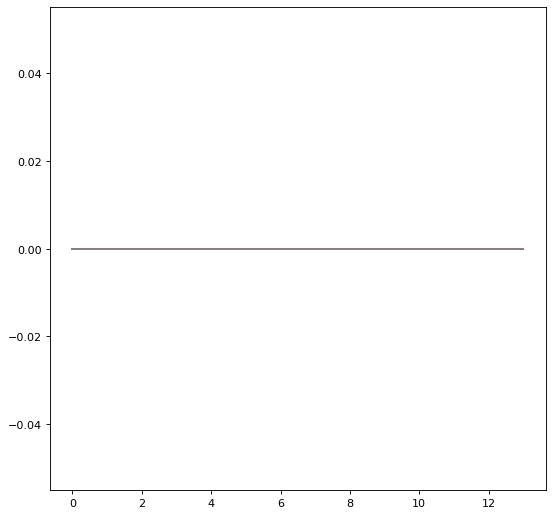

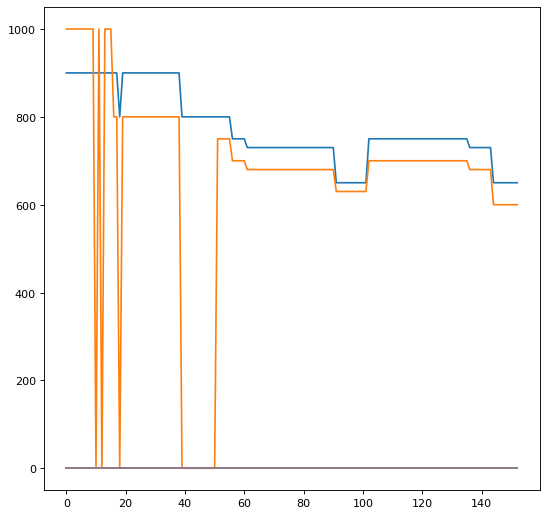

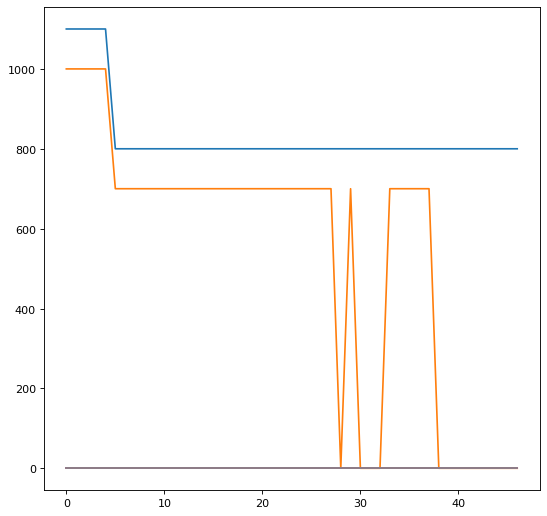

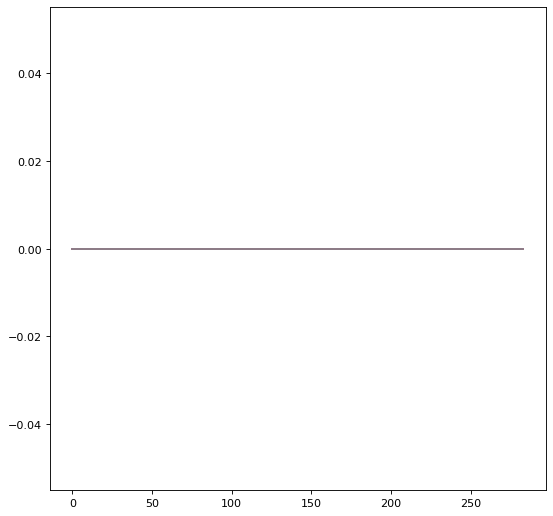

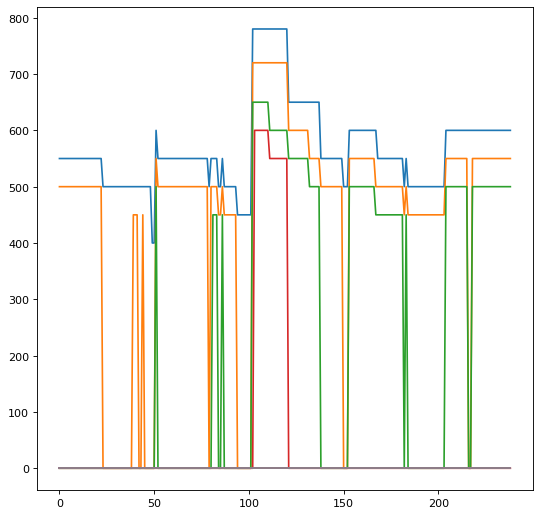

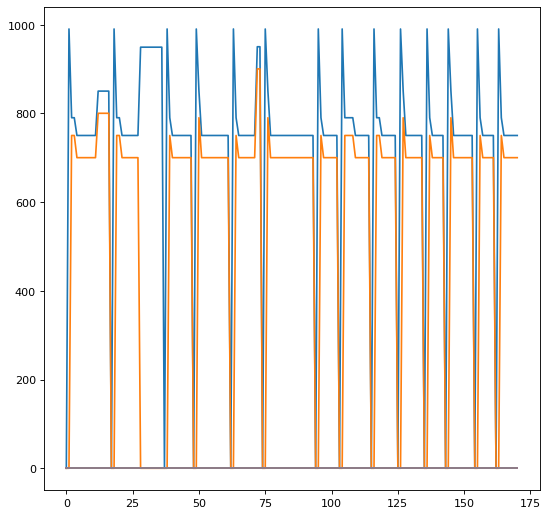

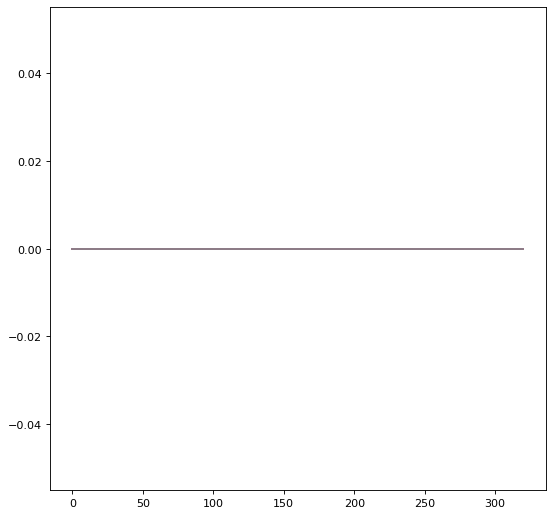

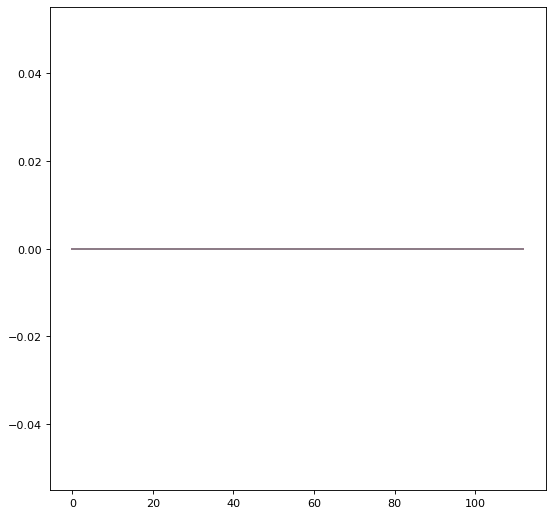

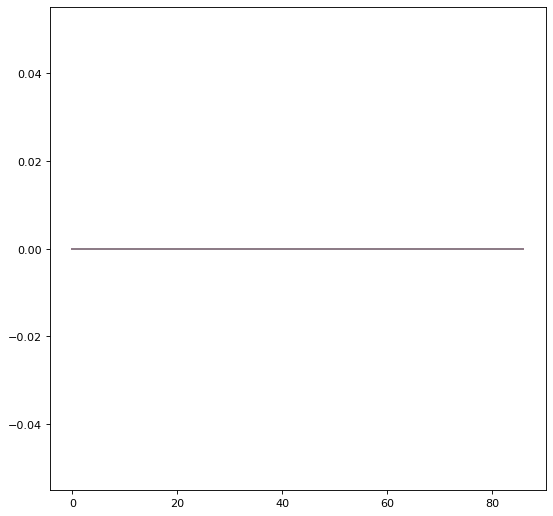

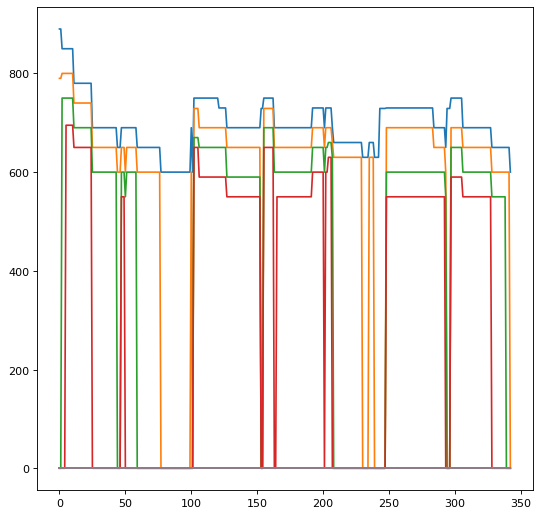

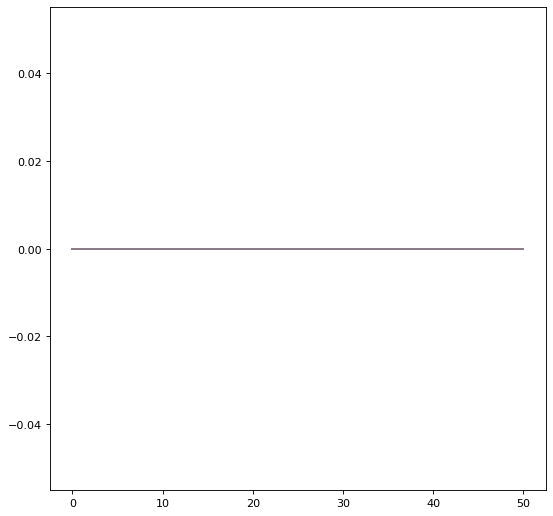

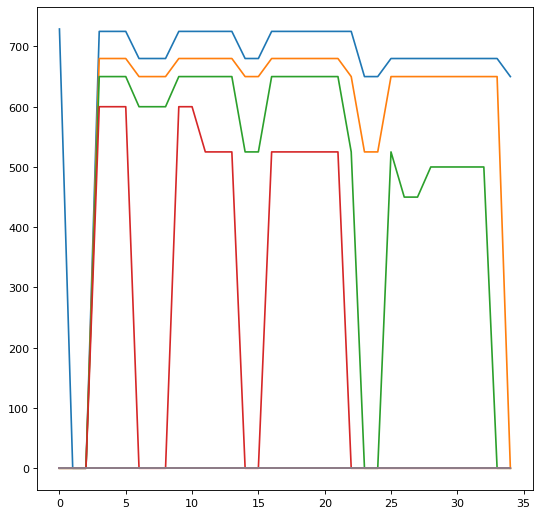

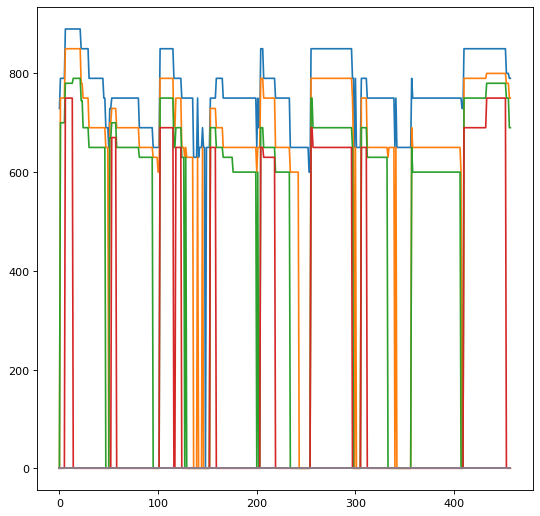

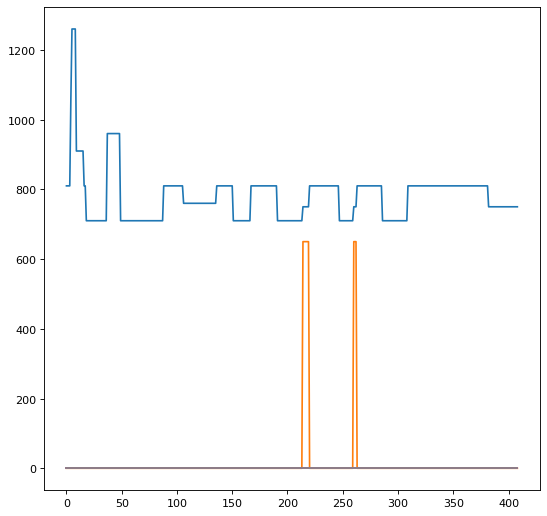

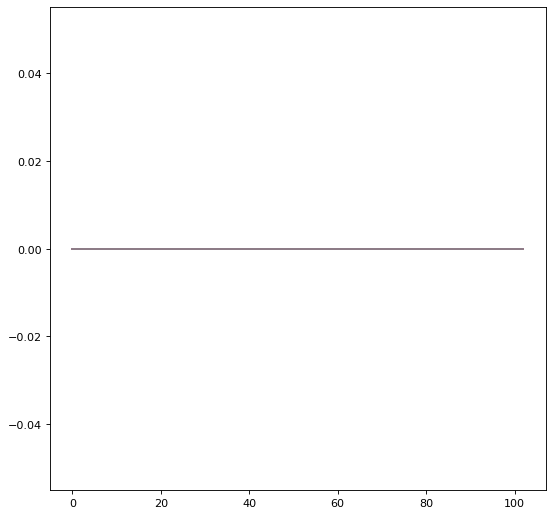

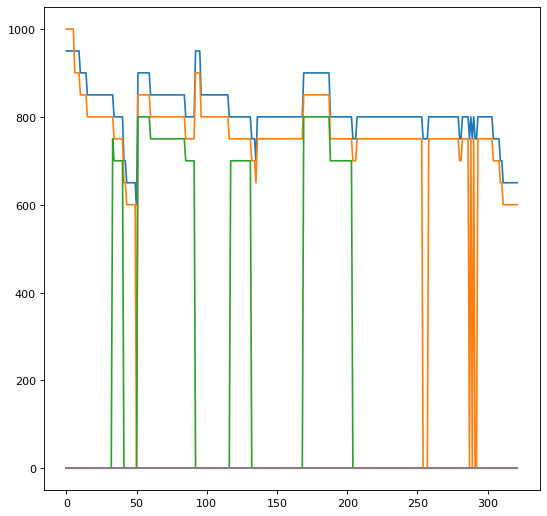

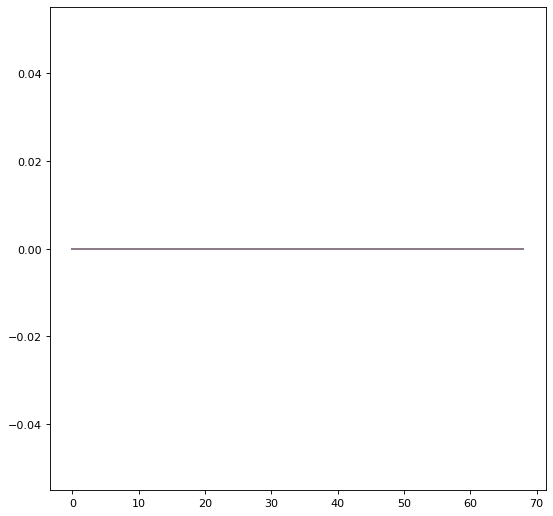

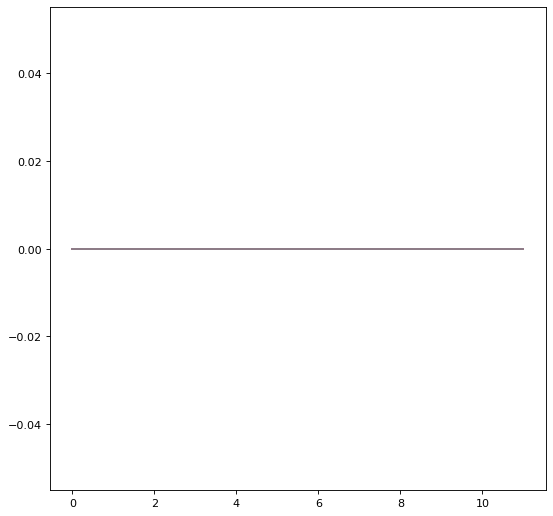

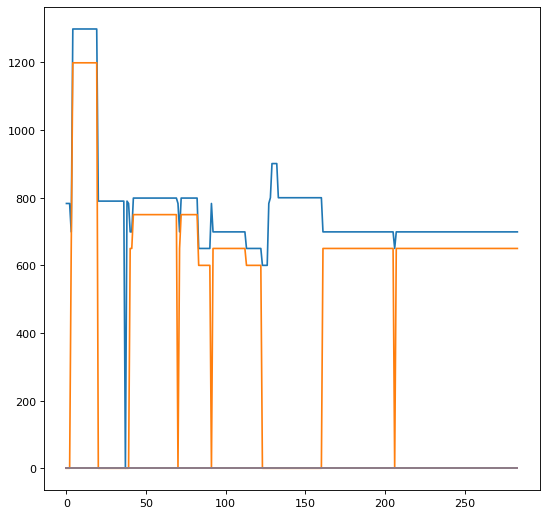

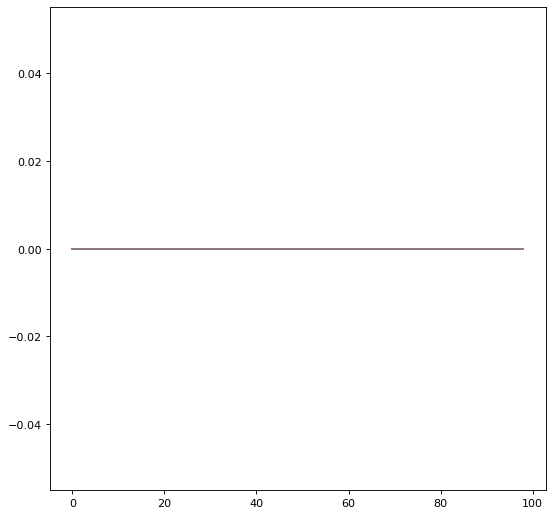

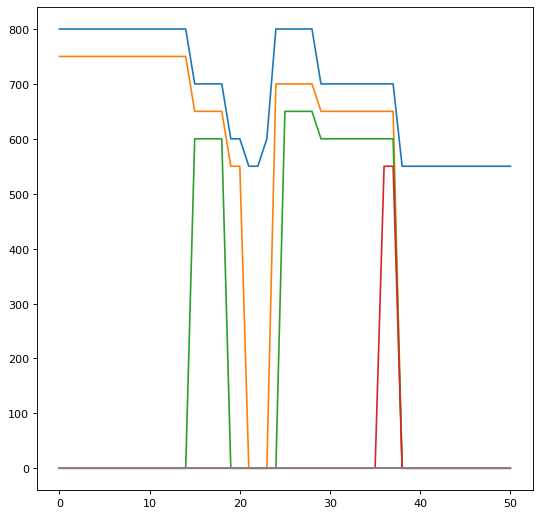

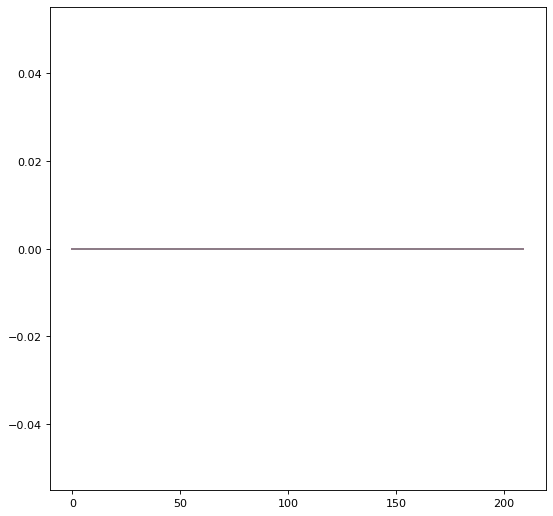

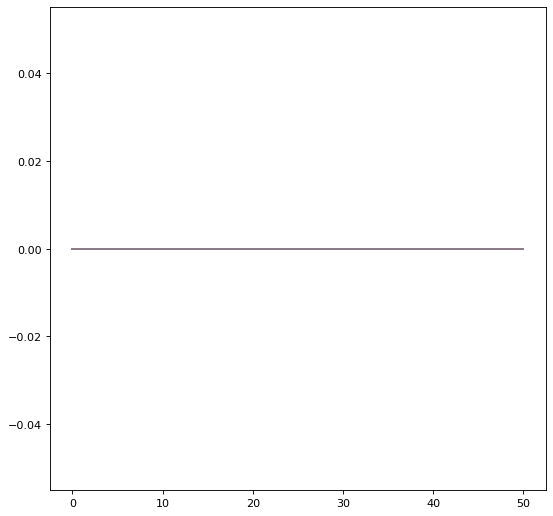

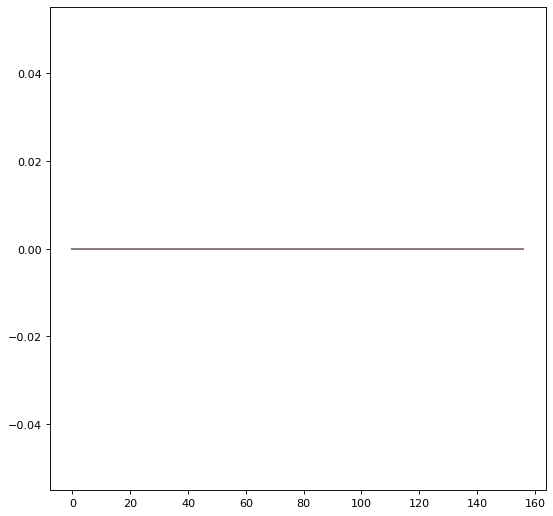

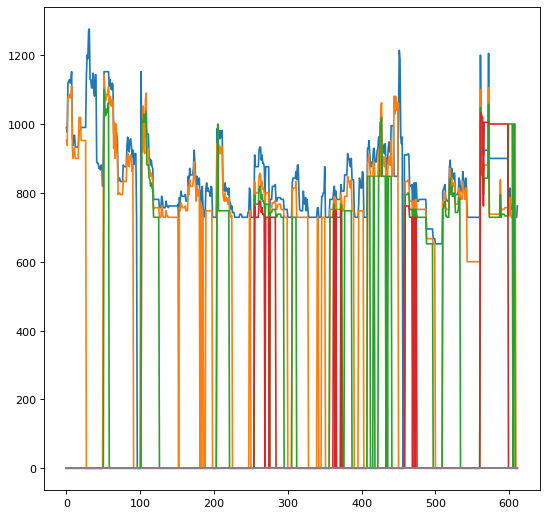

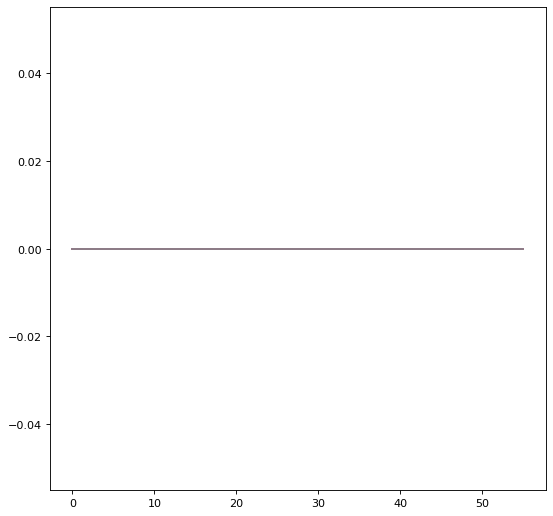

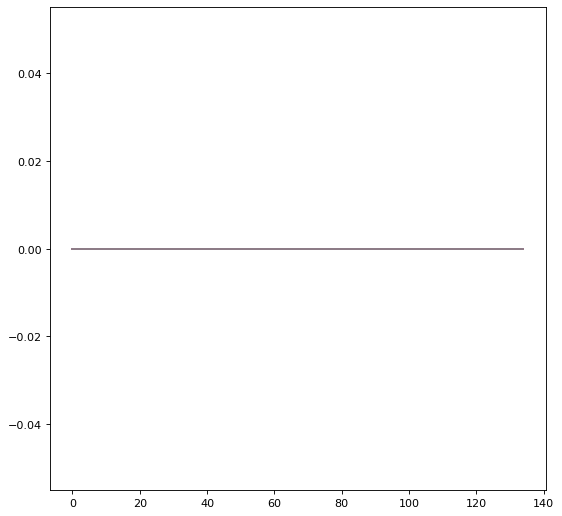

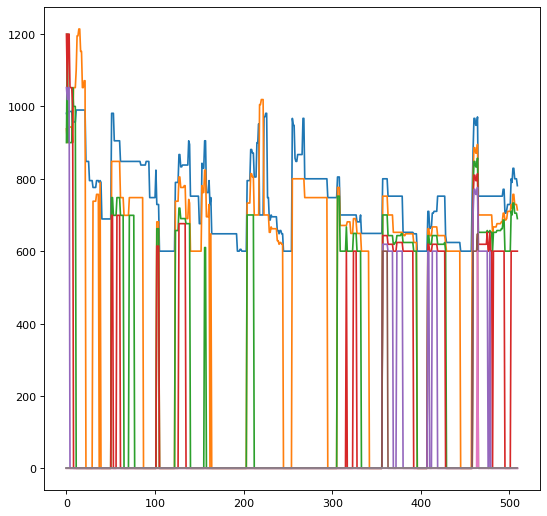

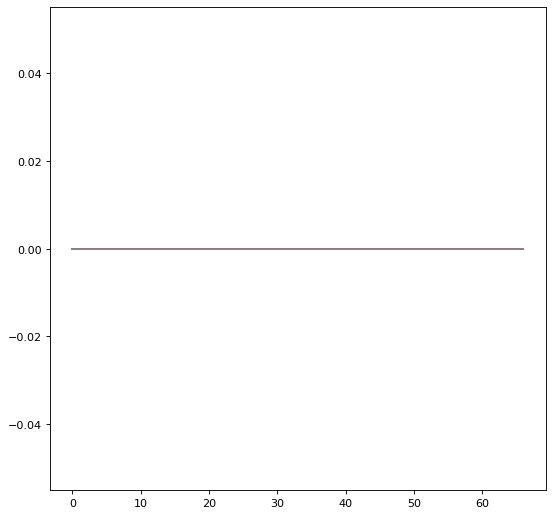

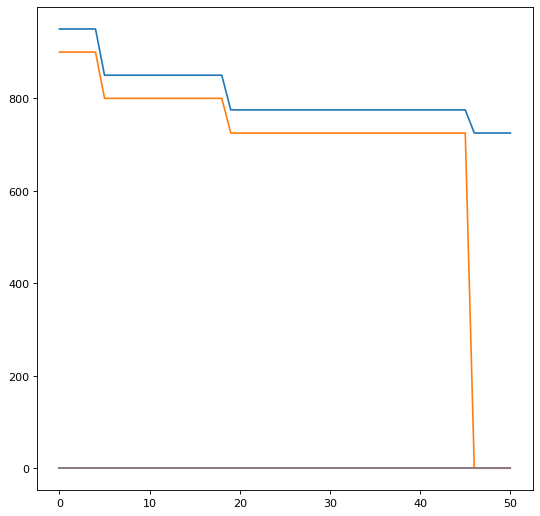

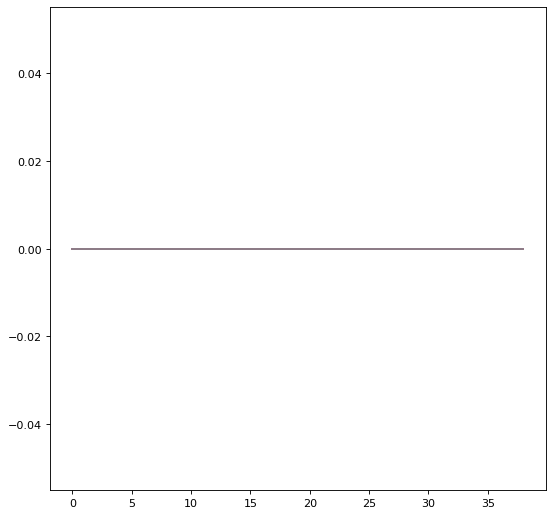

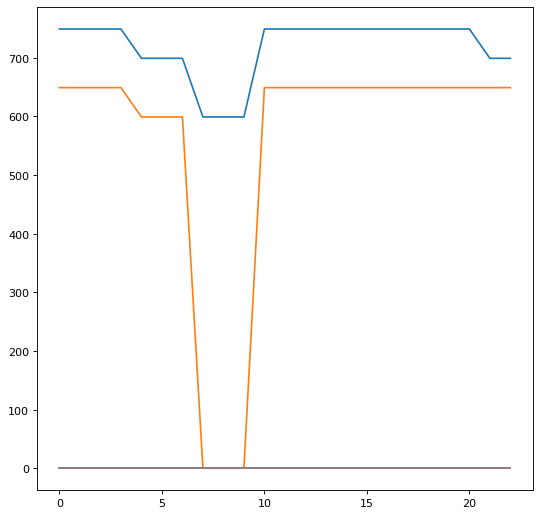

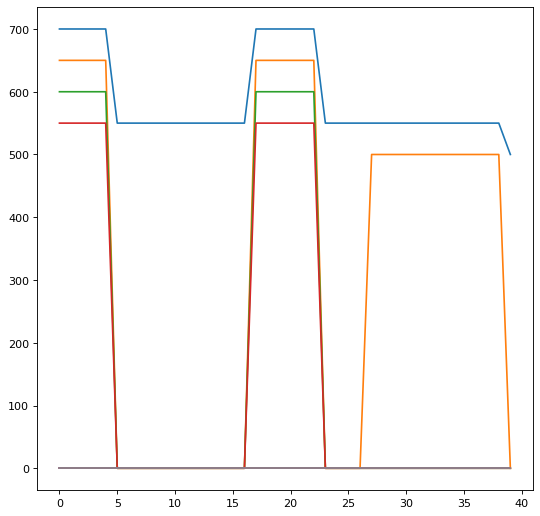

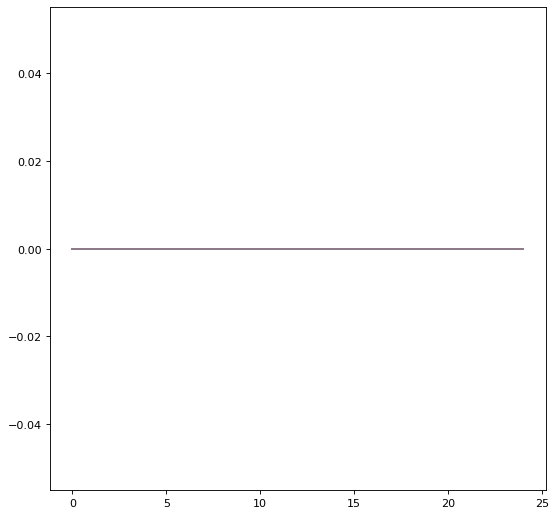

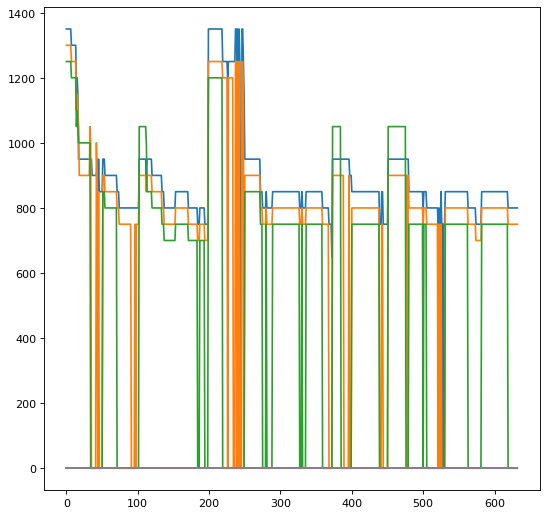

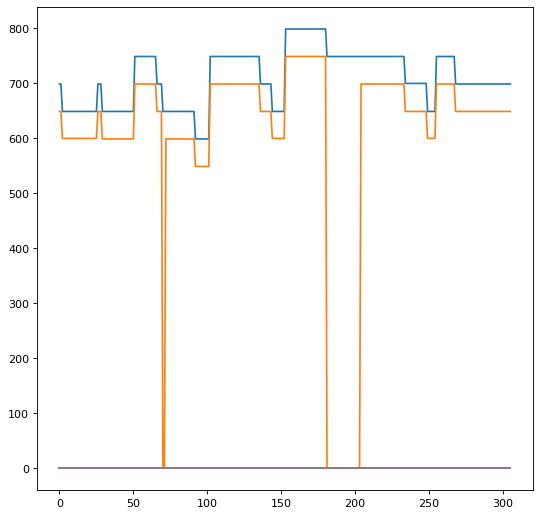

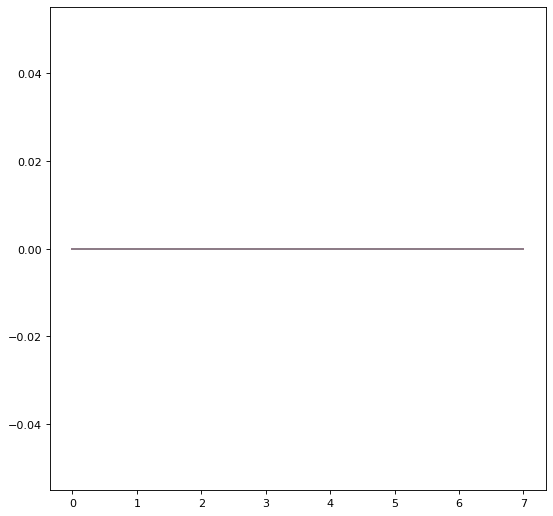

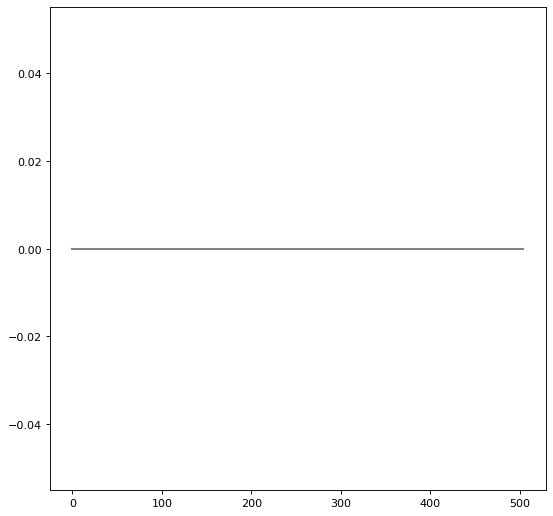

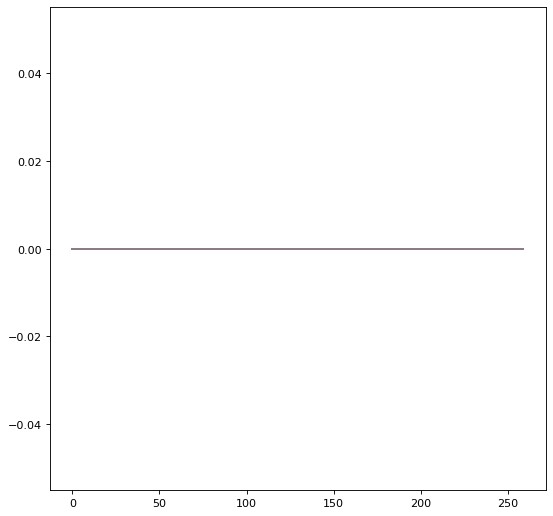

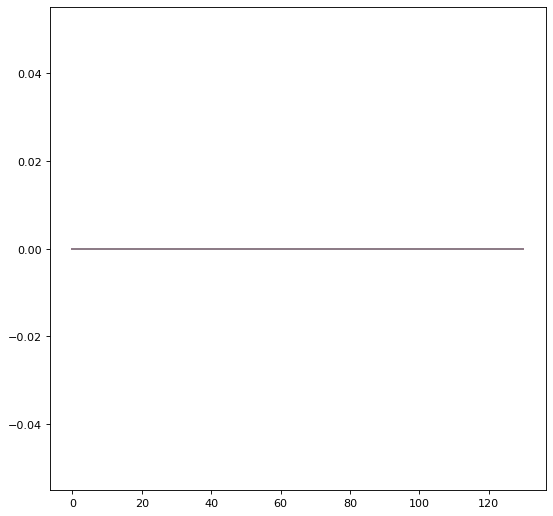

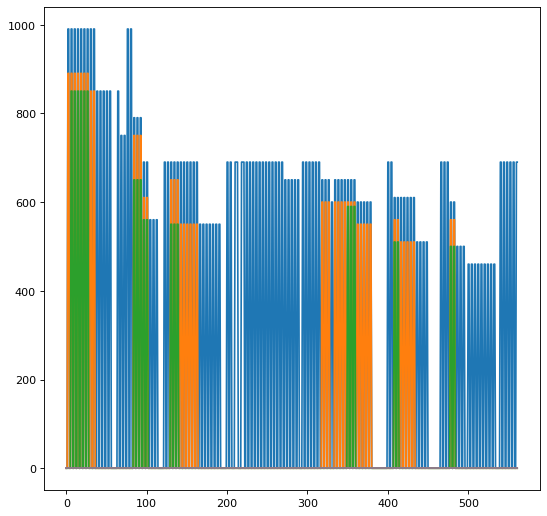

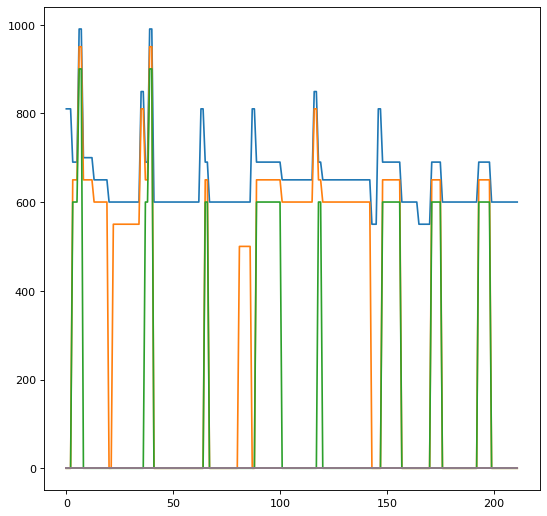

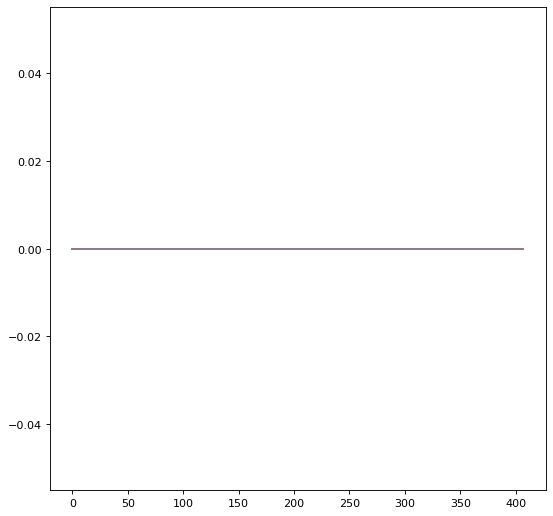

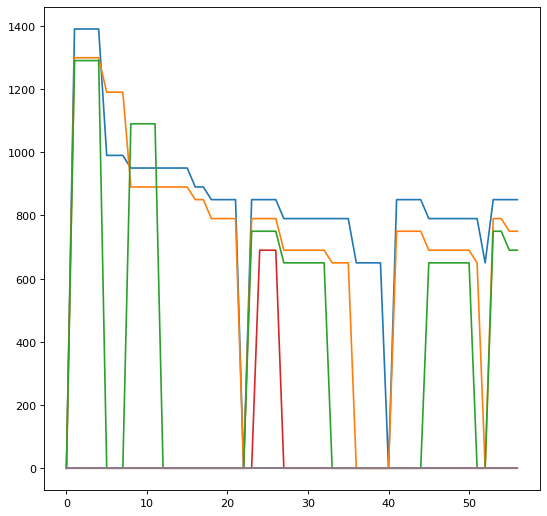

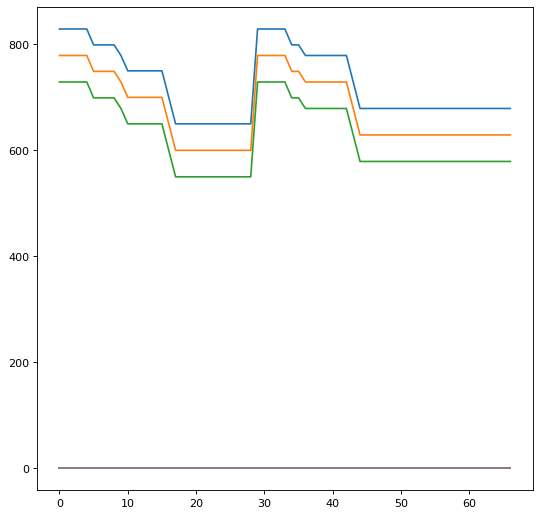

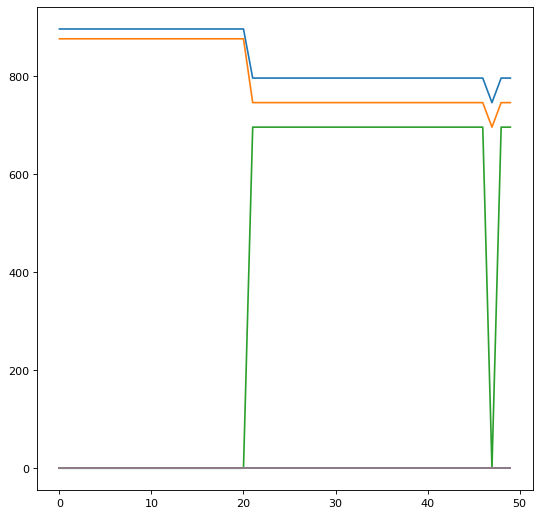

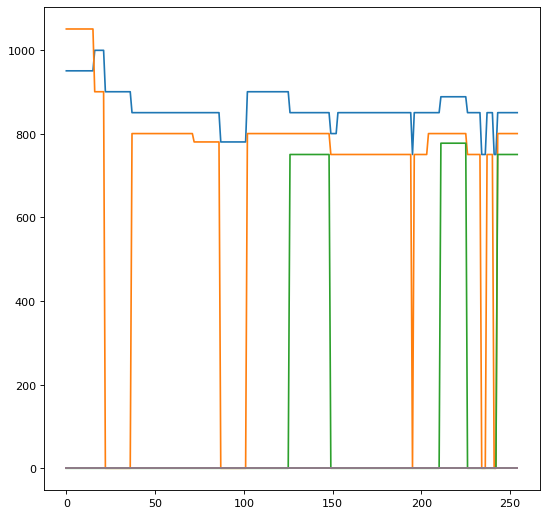

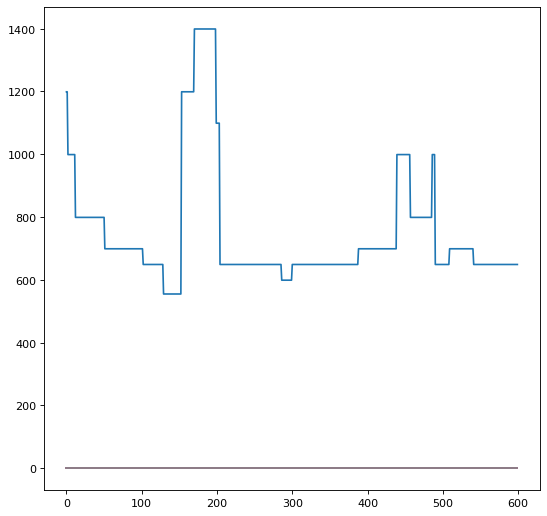

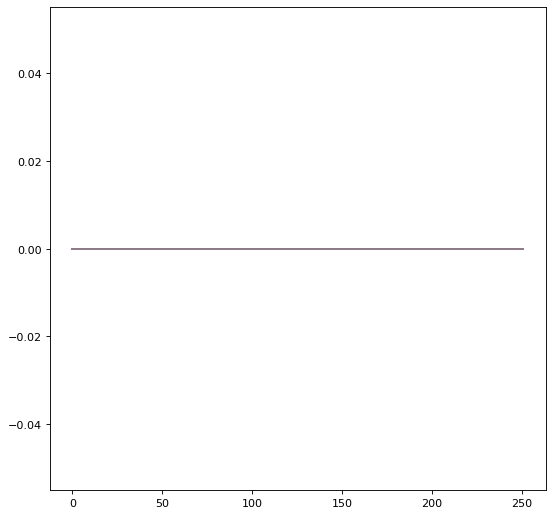

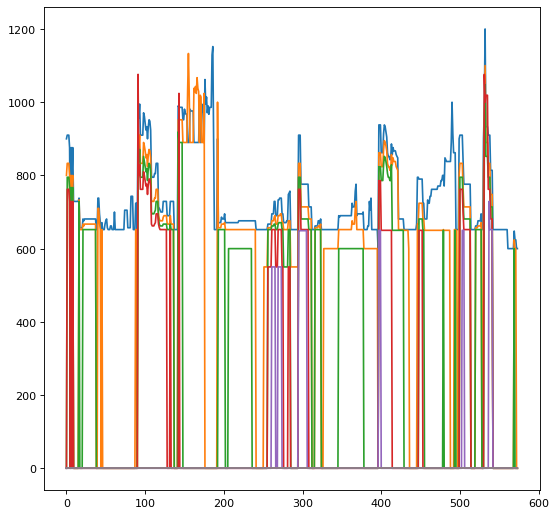

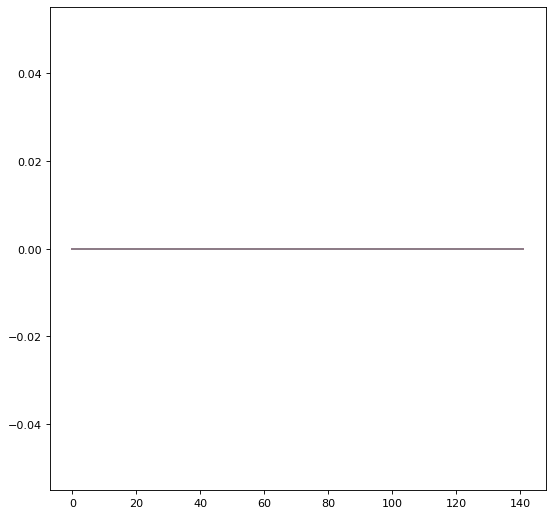

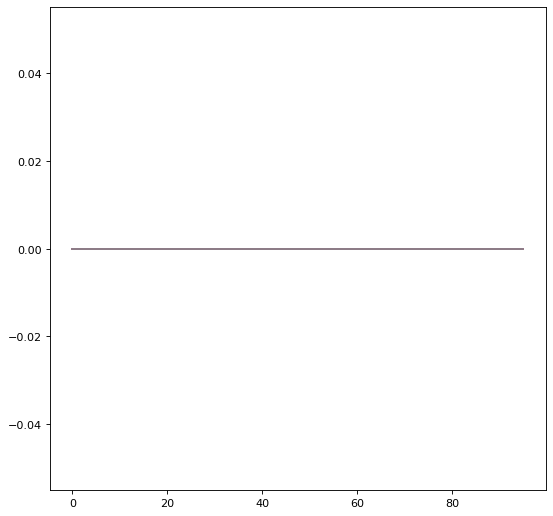

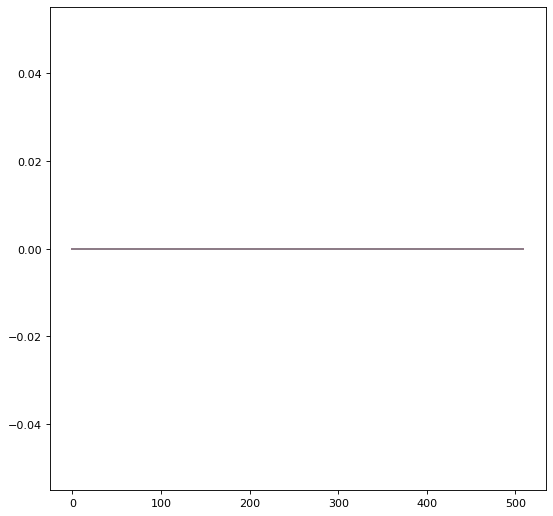

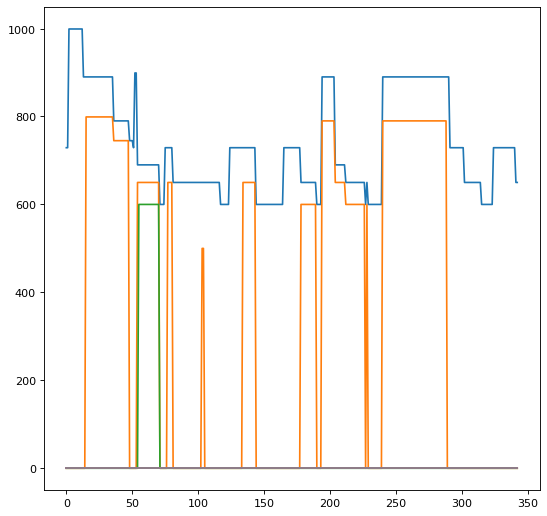

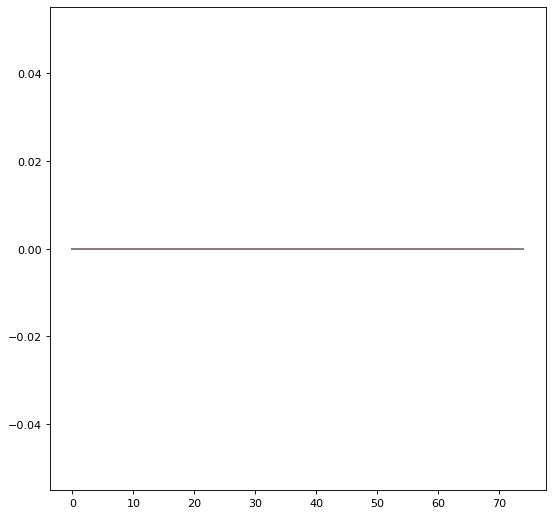

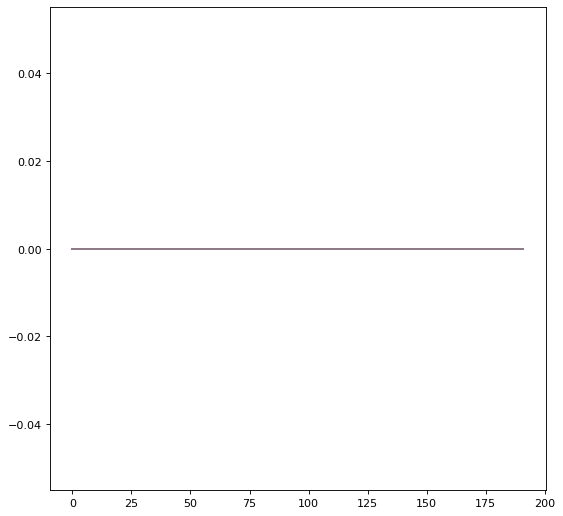

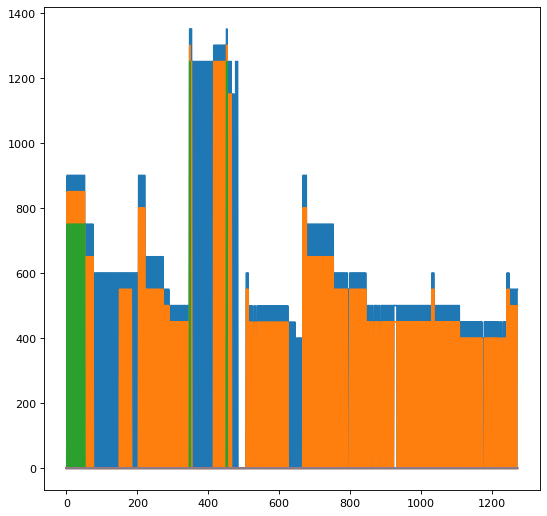

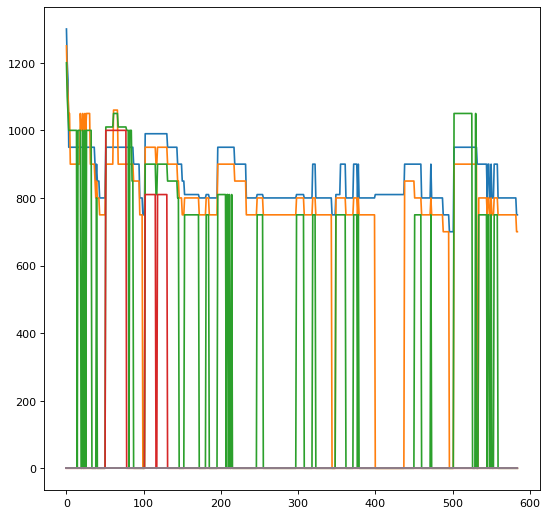

In [136]:
# making list of data for plotting for rate tye - 1.

from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
plot_bus = []
for bus in buses:
  plot_bus.append(final_dic_1[bus])
print(len(plot_bus))

for i in range(117):
  figure(figsize=(8, 8), dpi=80)
  plt.plot(plot_bus[i])
  plt.show()

117


<Figure size 800x800 with 0 Axes>

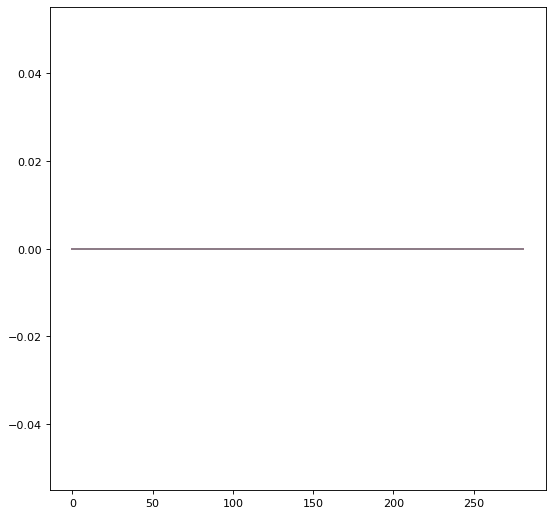

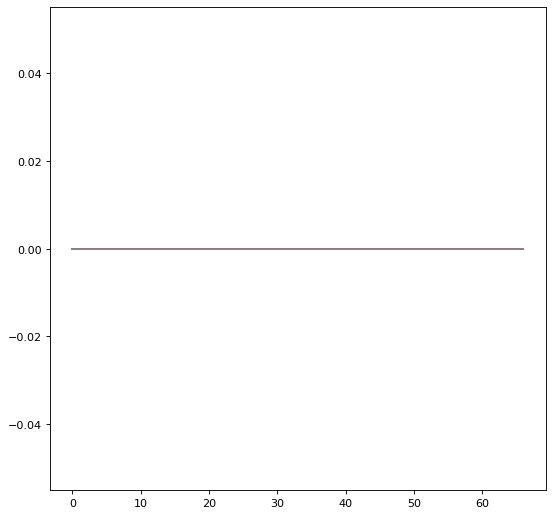

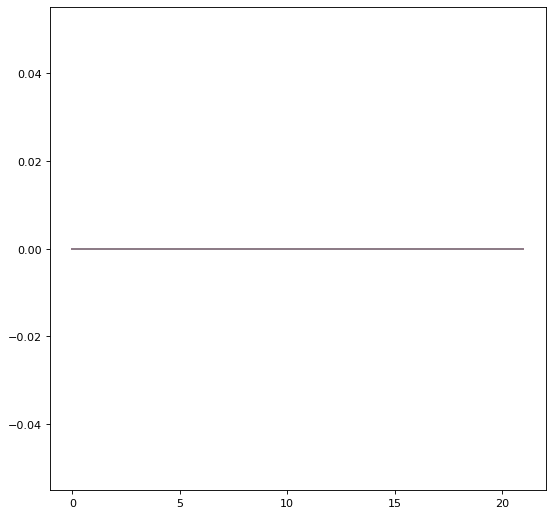

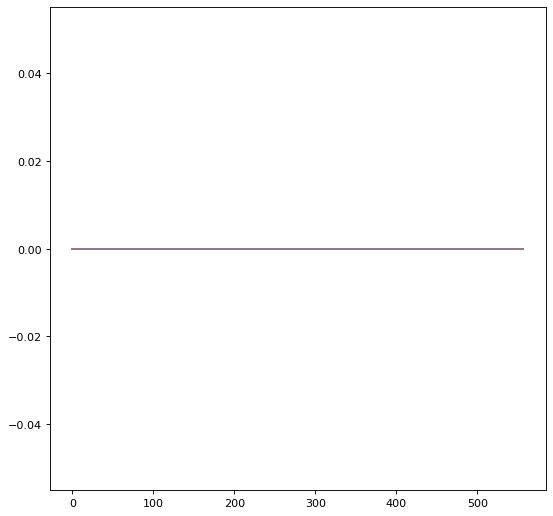

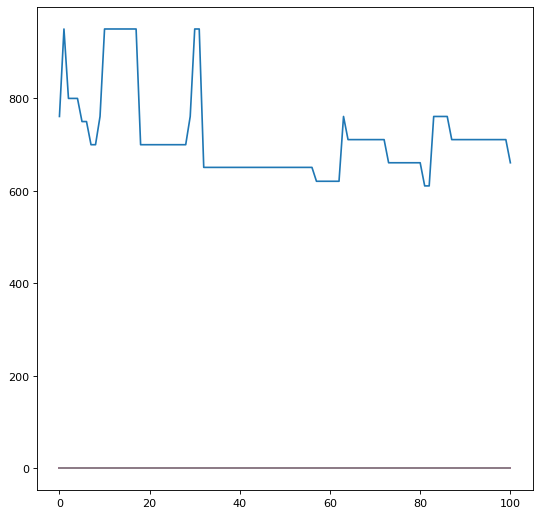

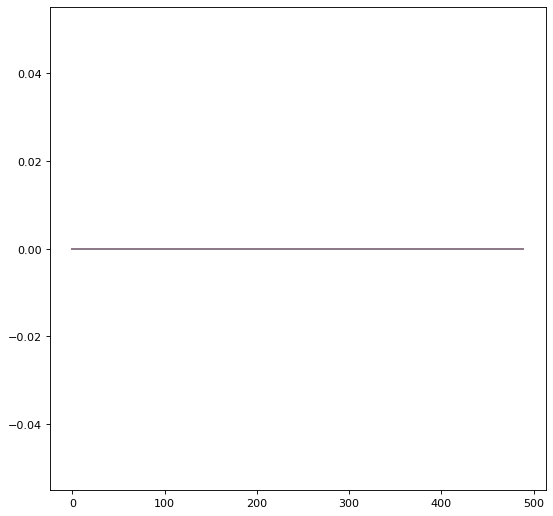

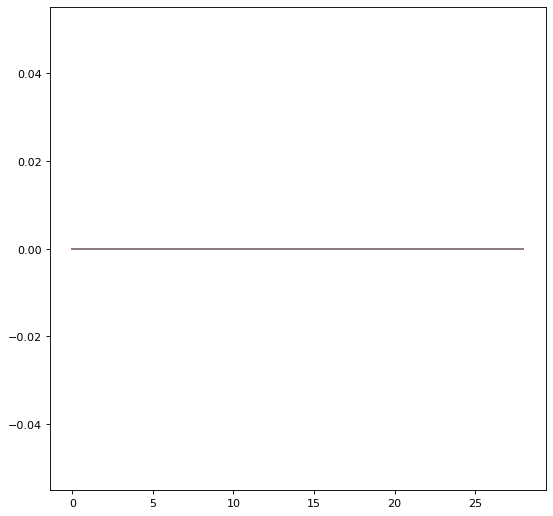

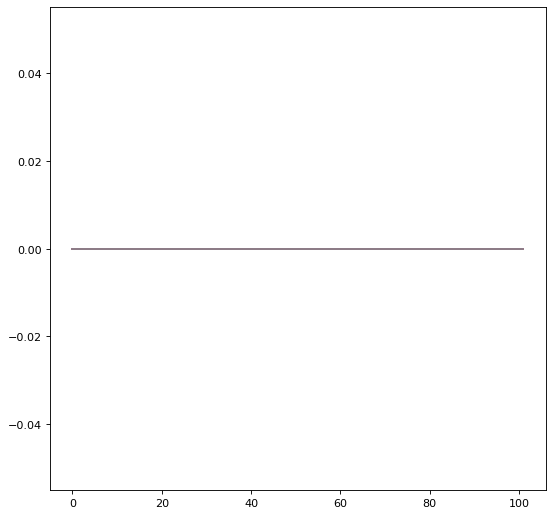

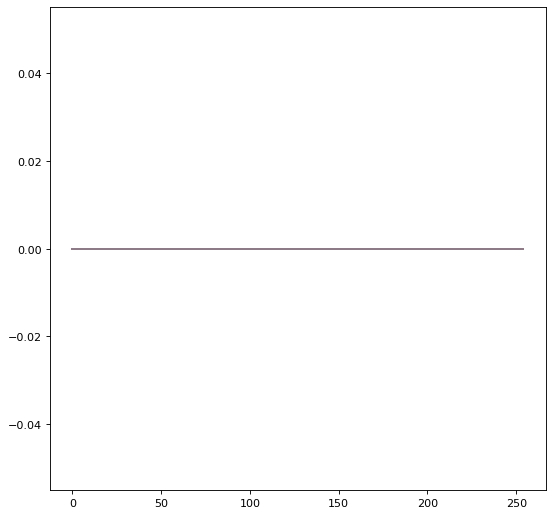

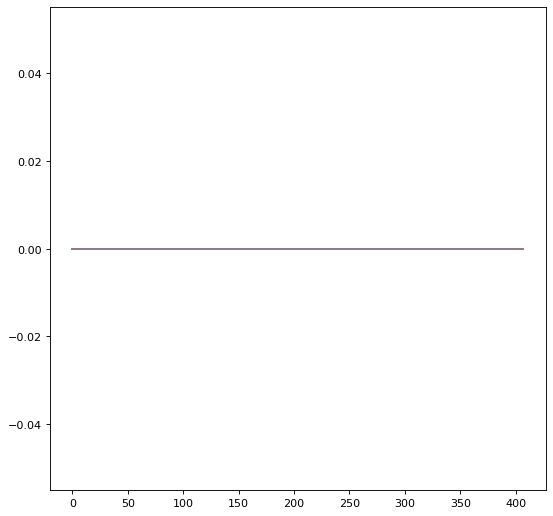

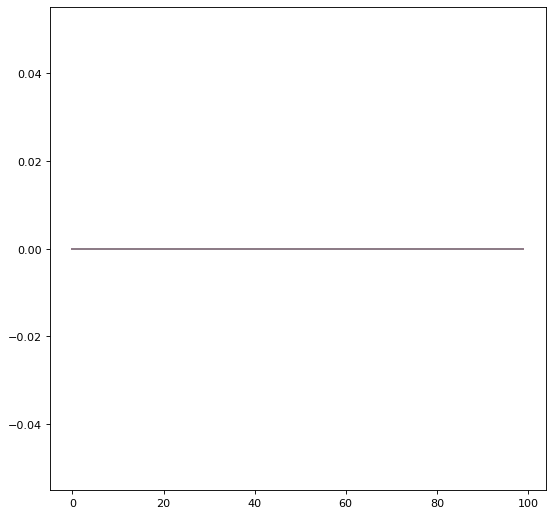

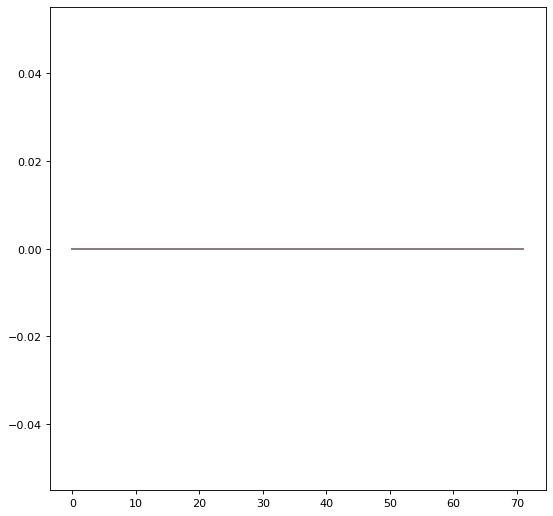

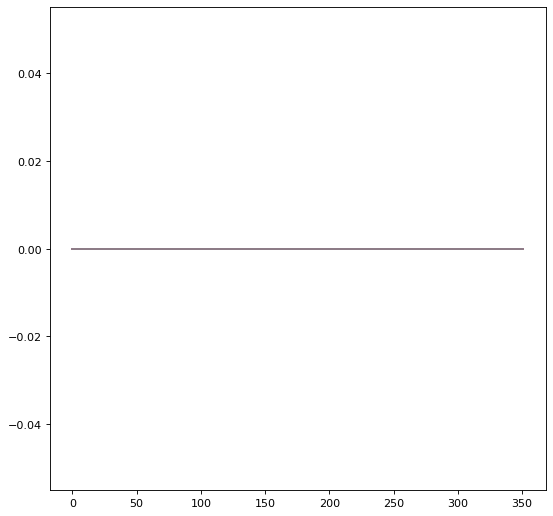

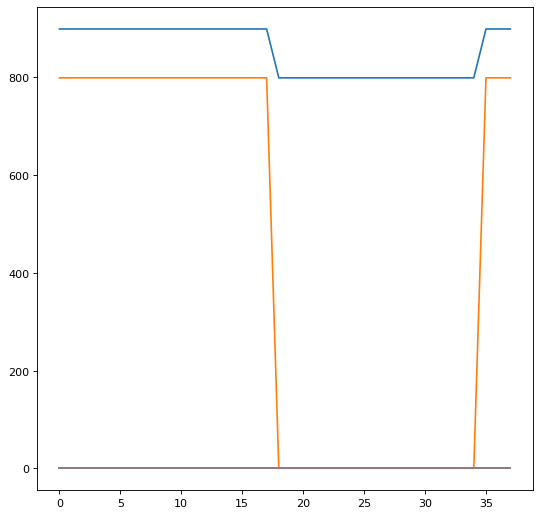

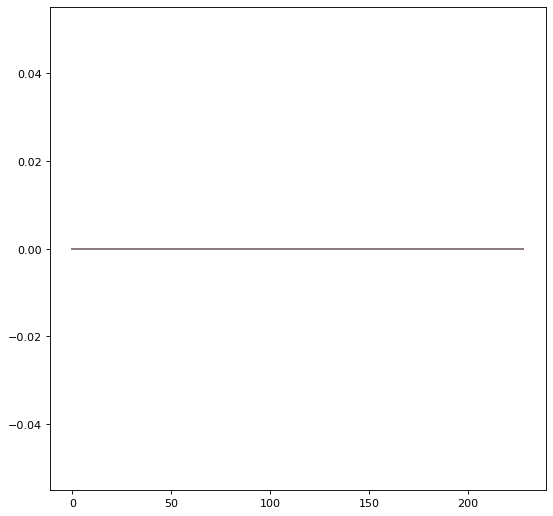

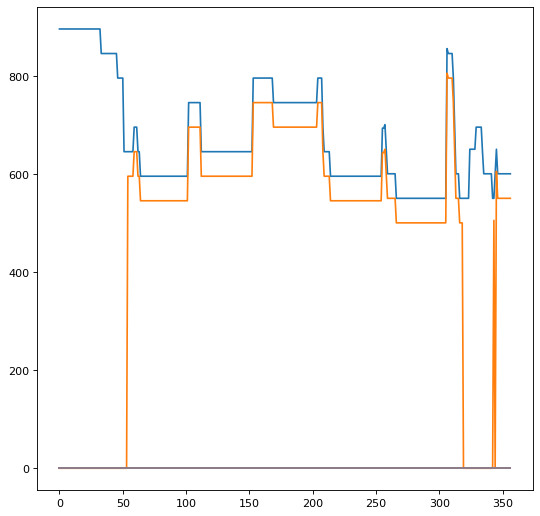

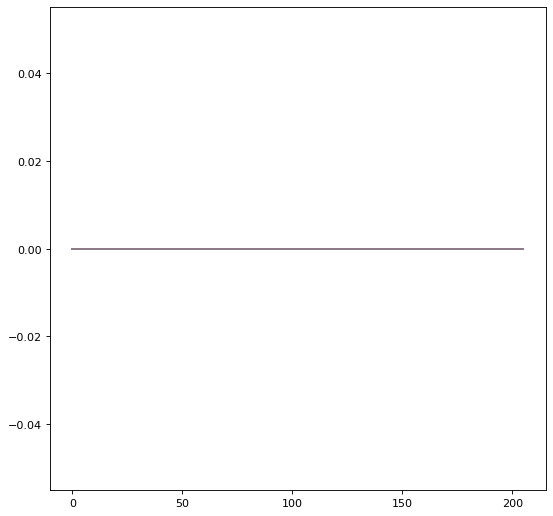

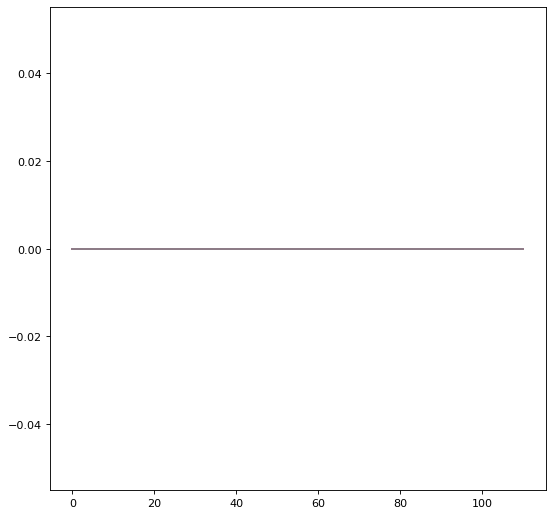

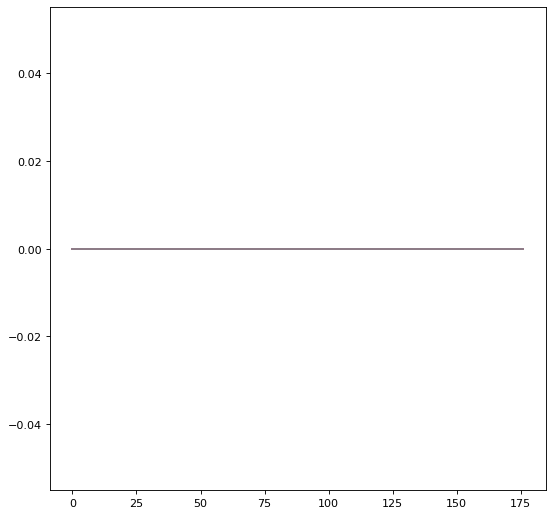

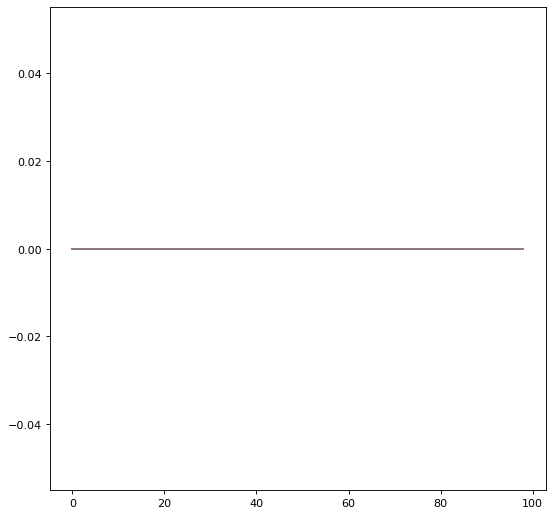

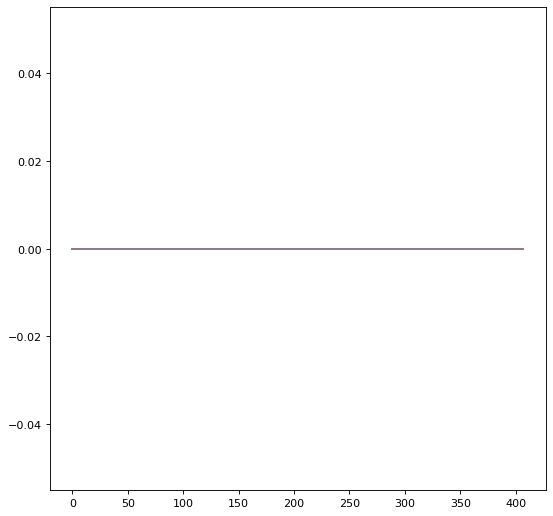

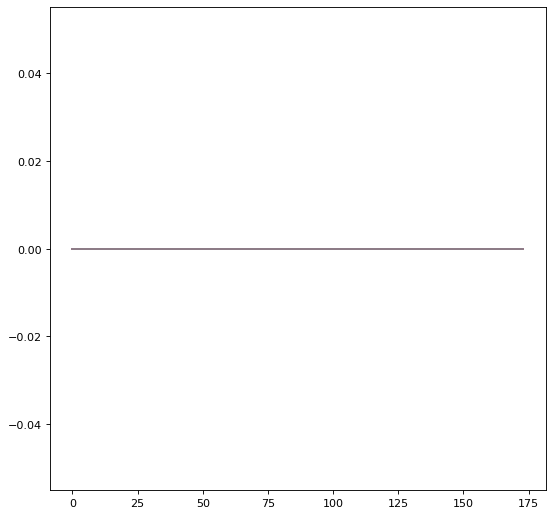

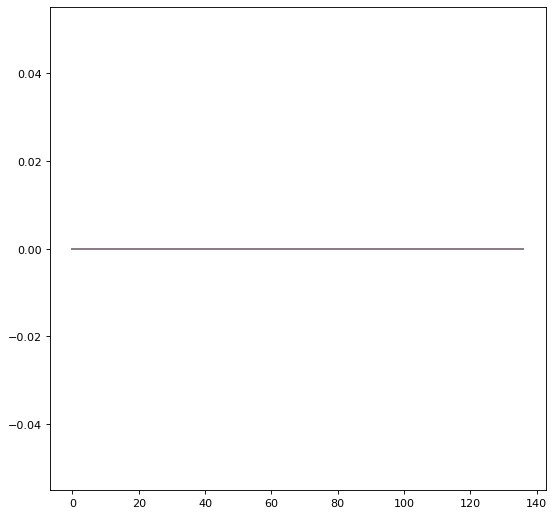

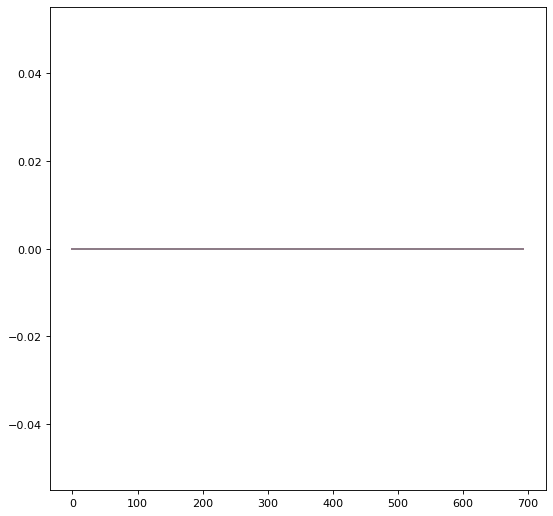

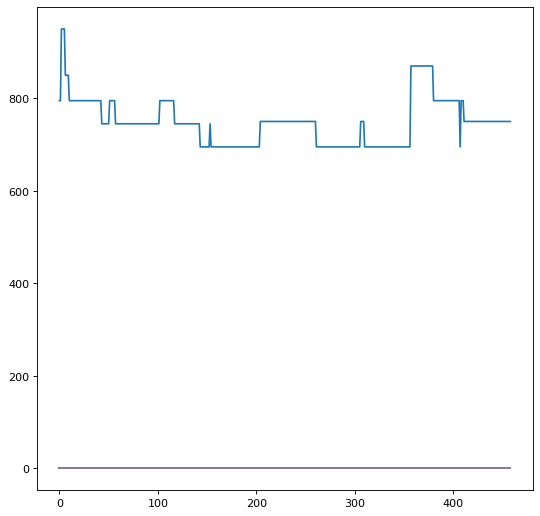

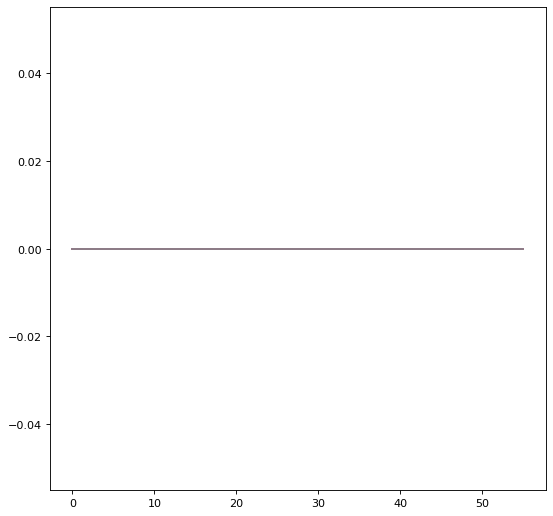

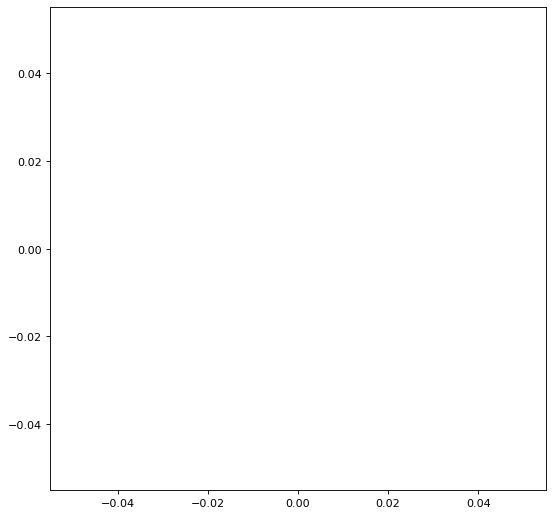

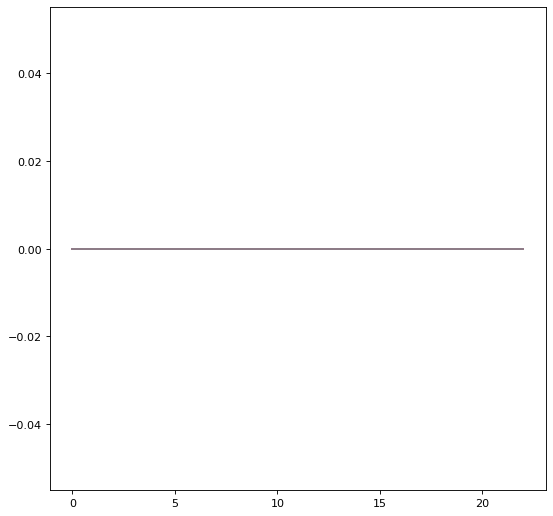

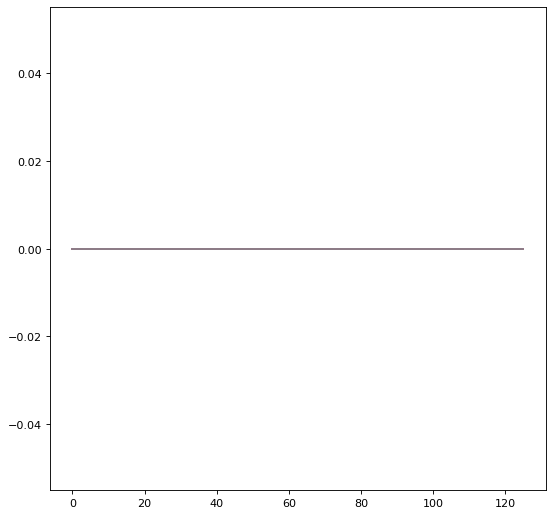

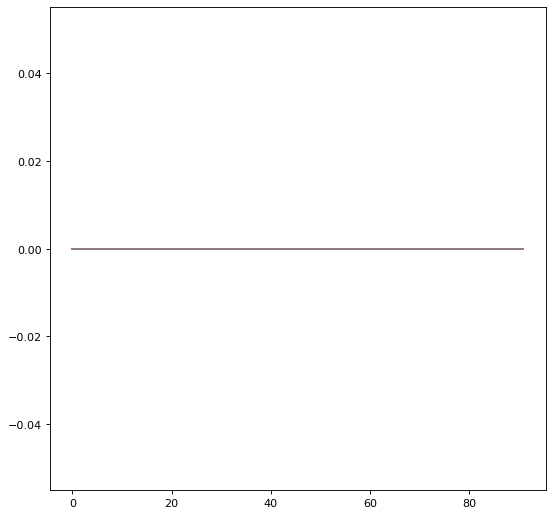

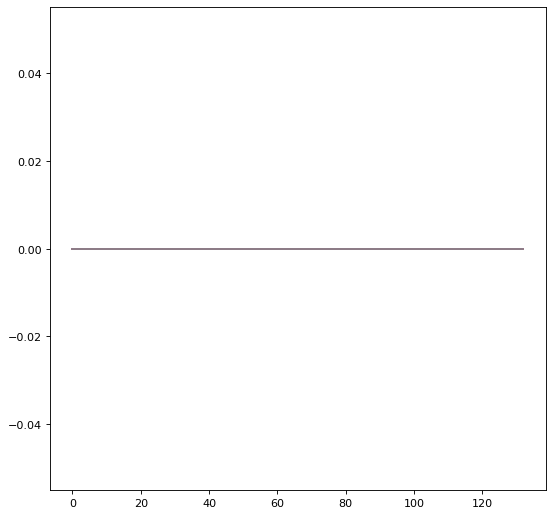

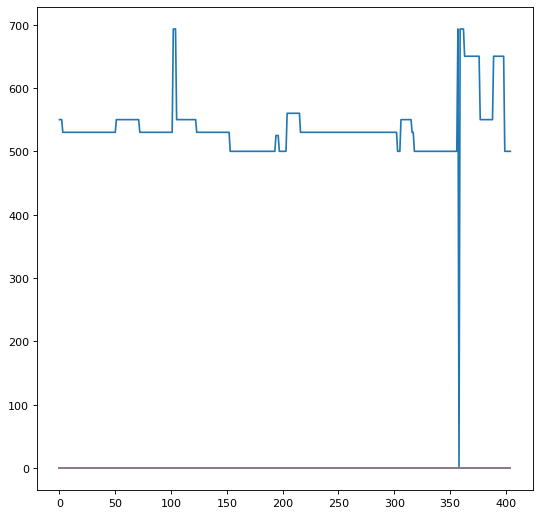

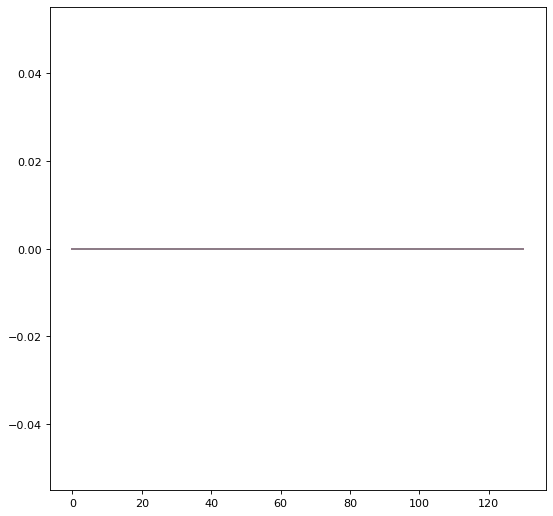

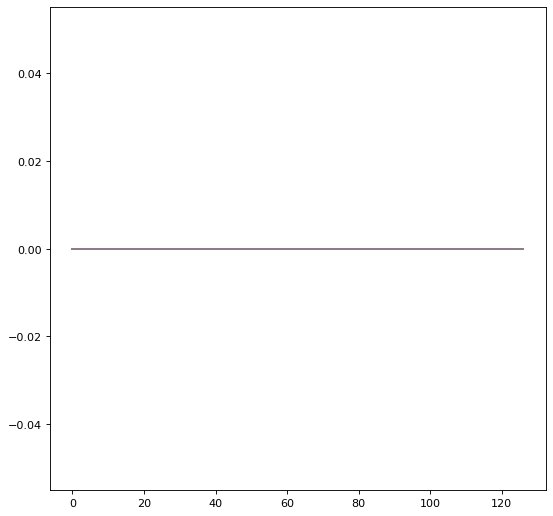

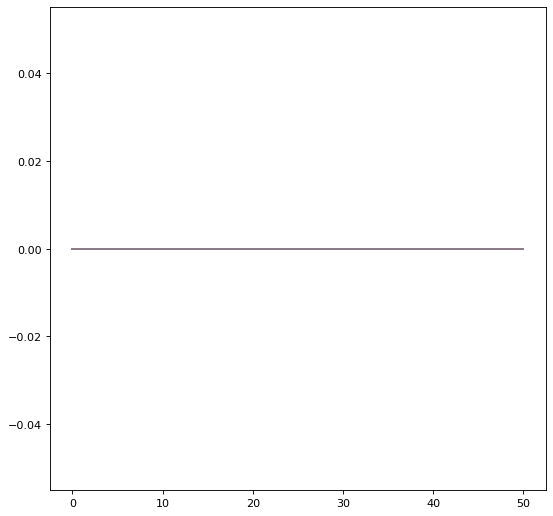

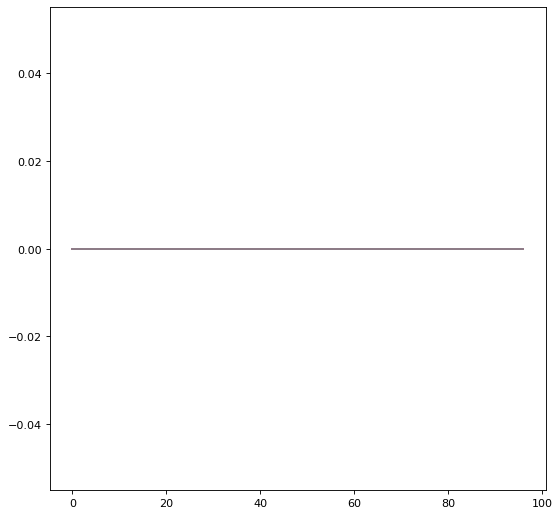

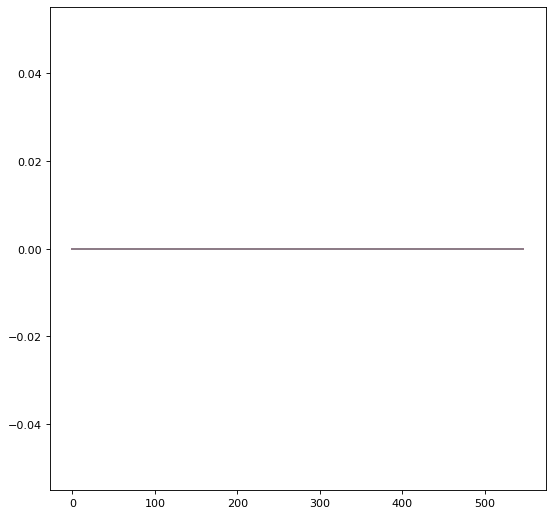

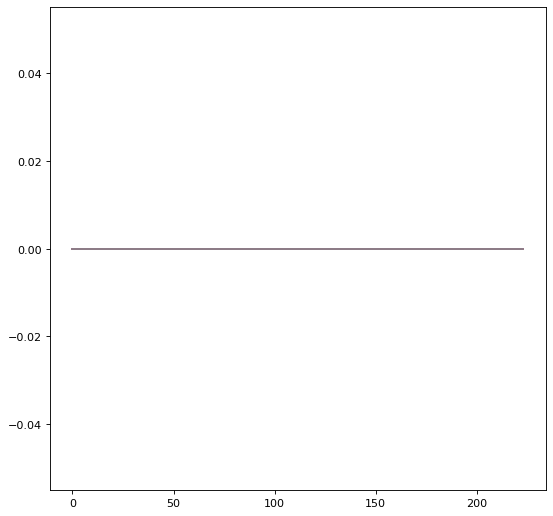

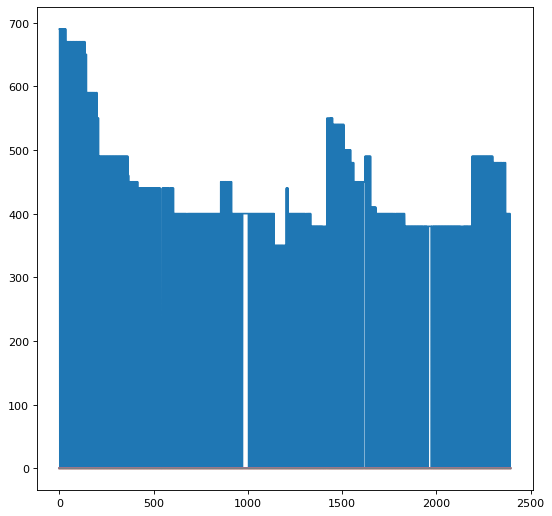

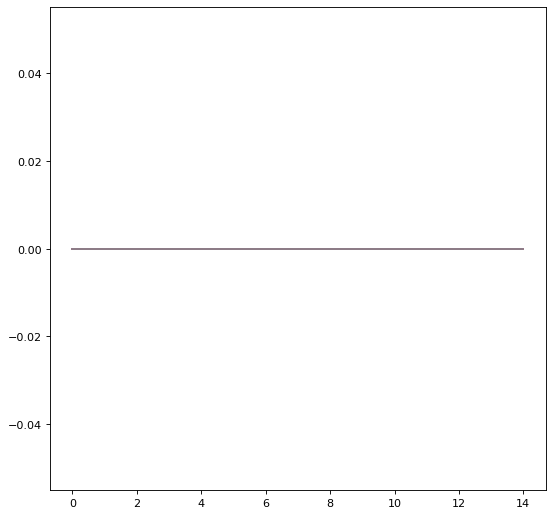

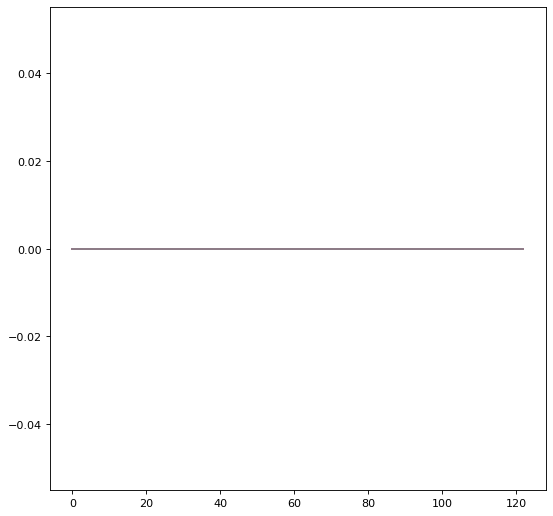

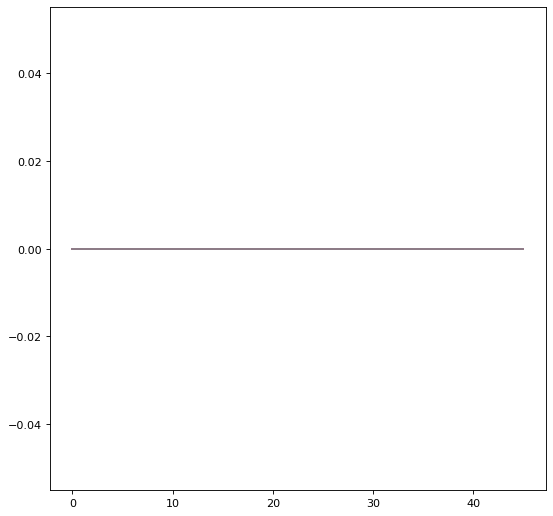

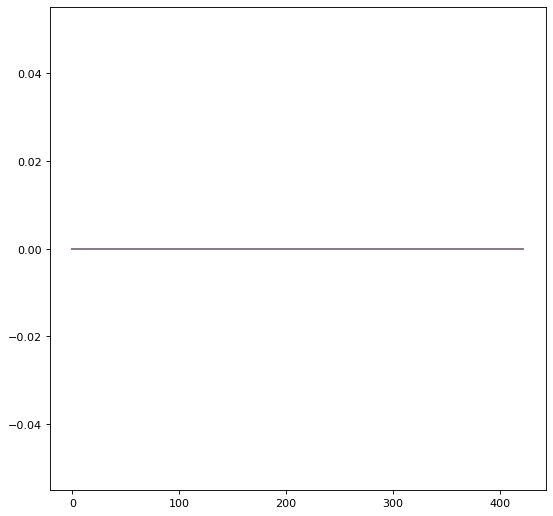

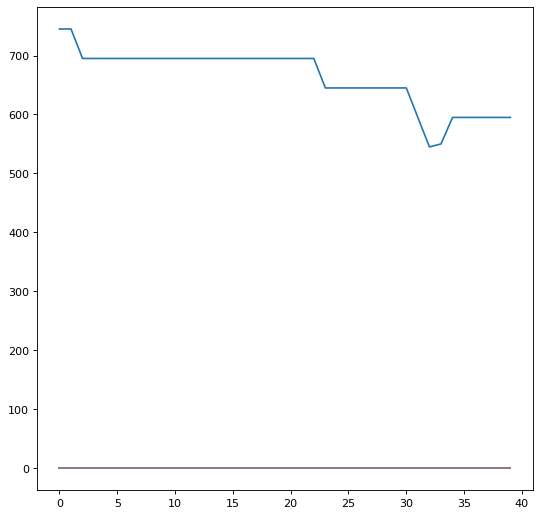

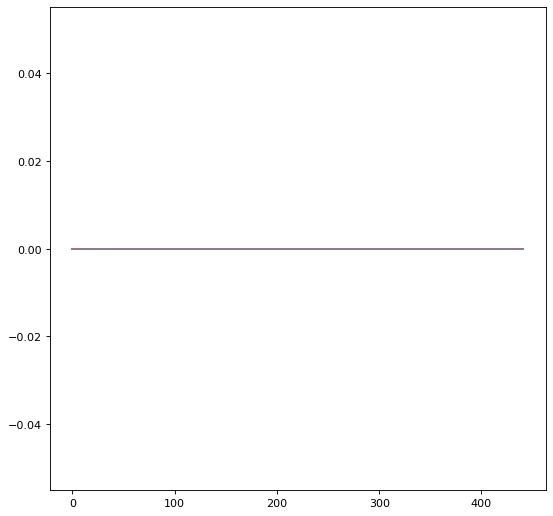

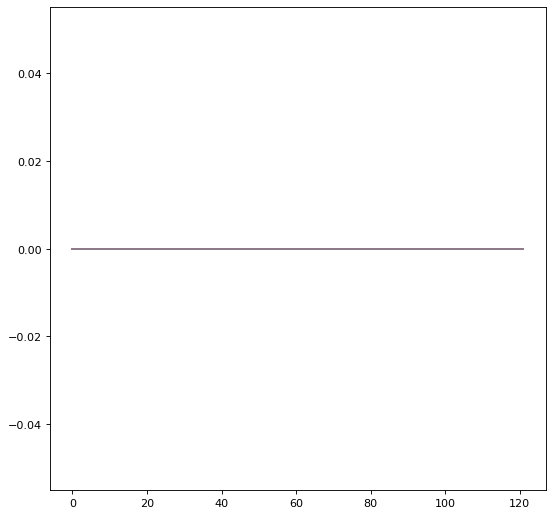

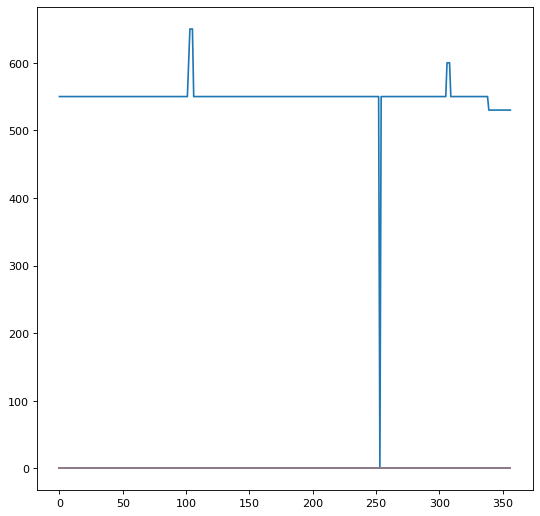

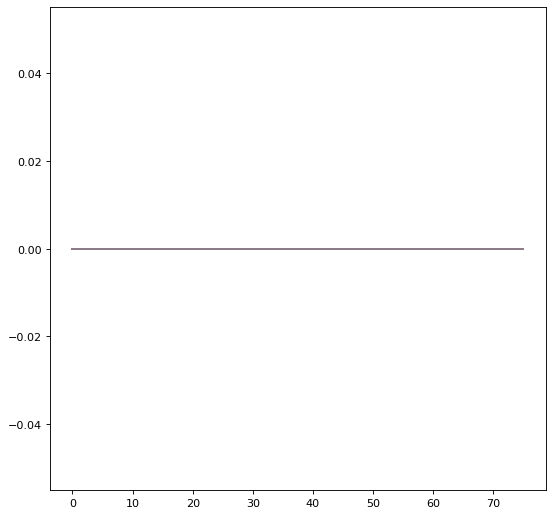

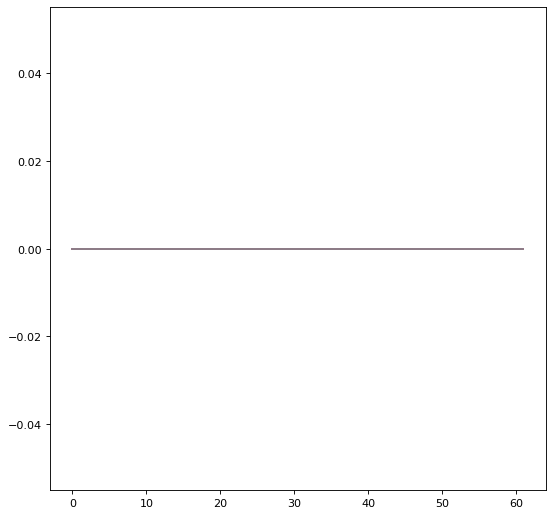

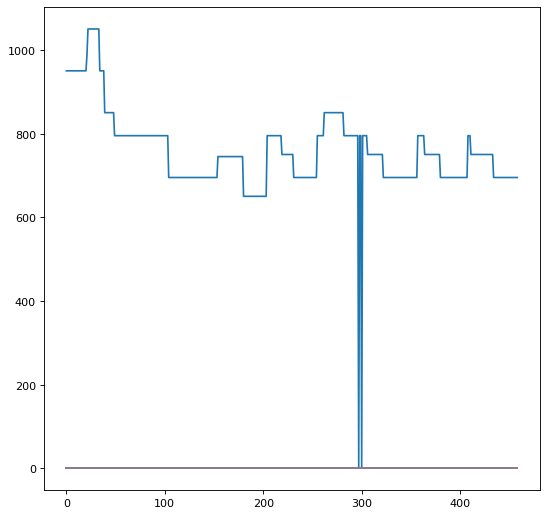

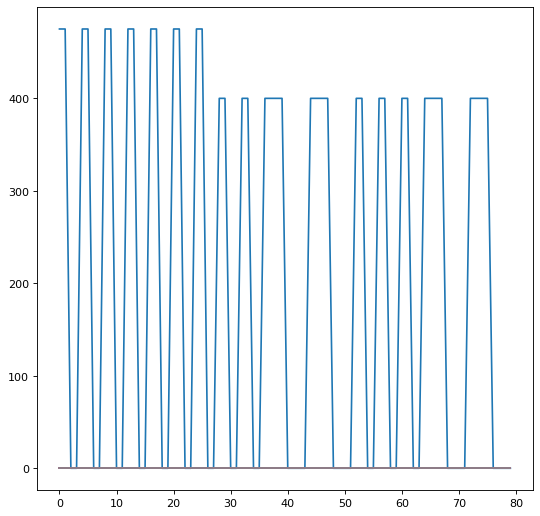

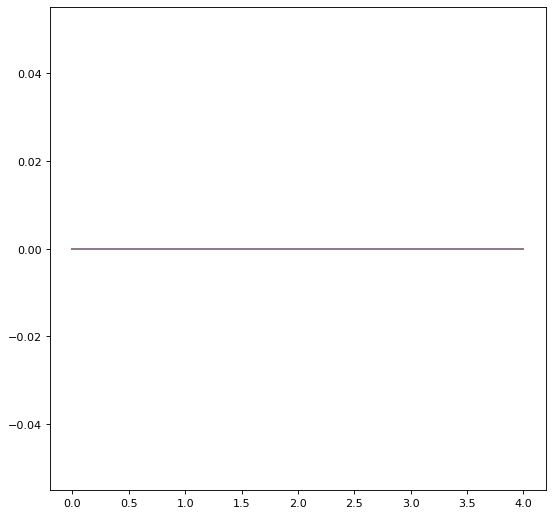

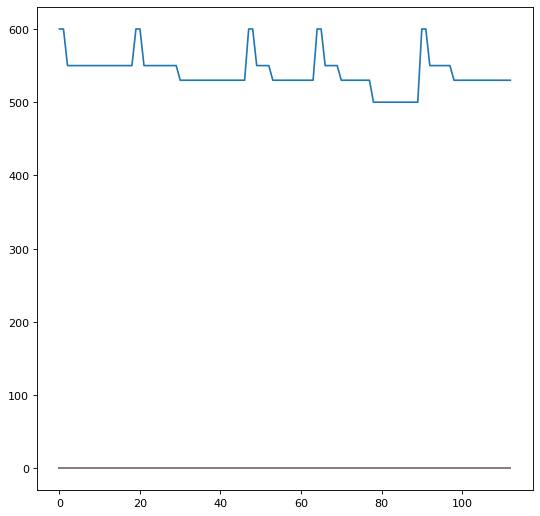

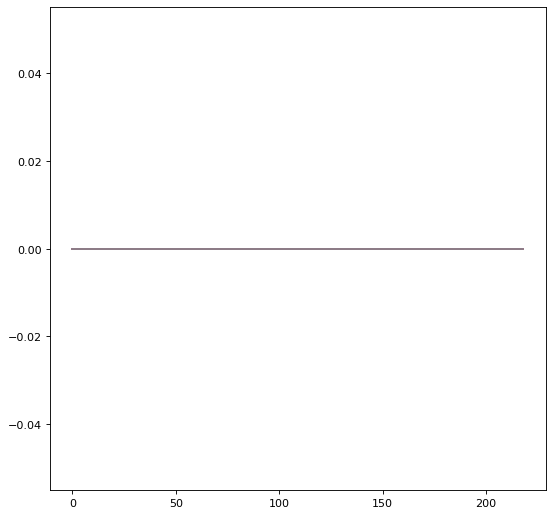

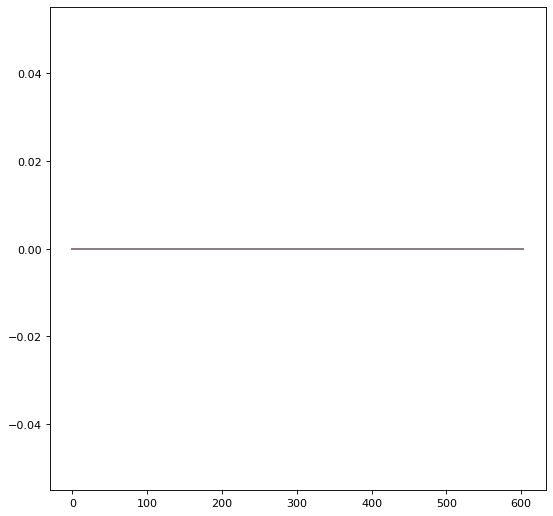

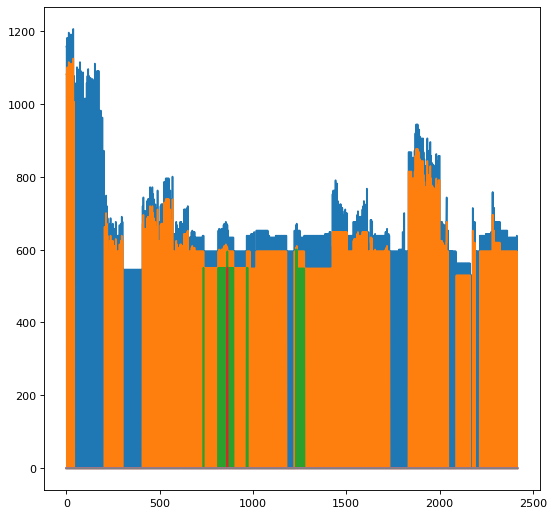

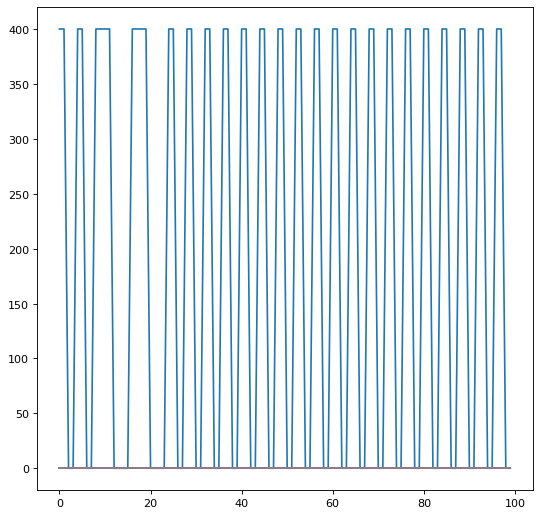

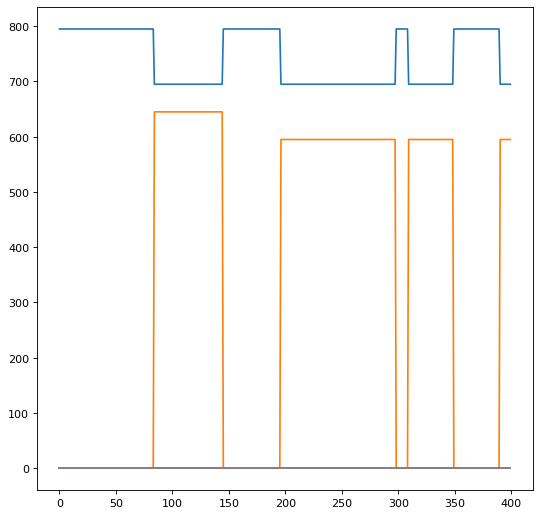

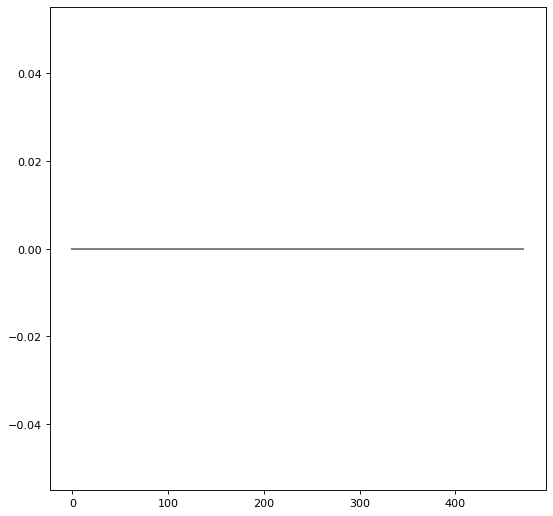

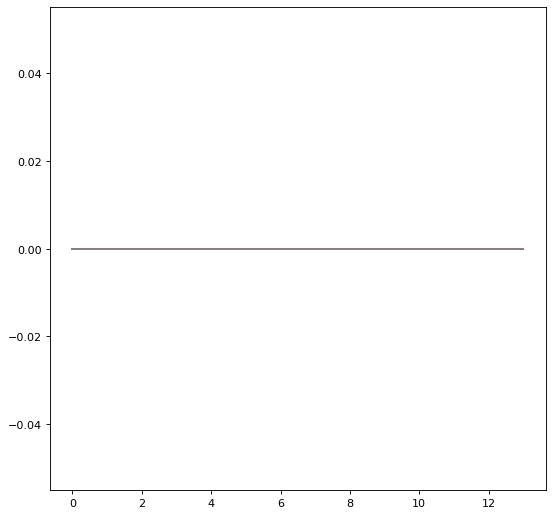

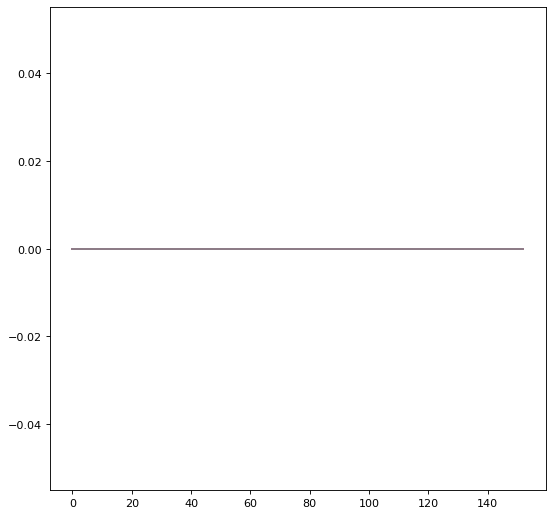

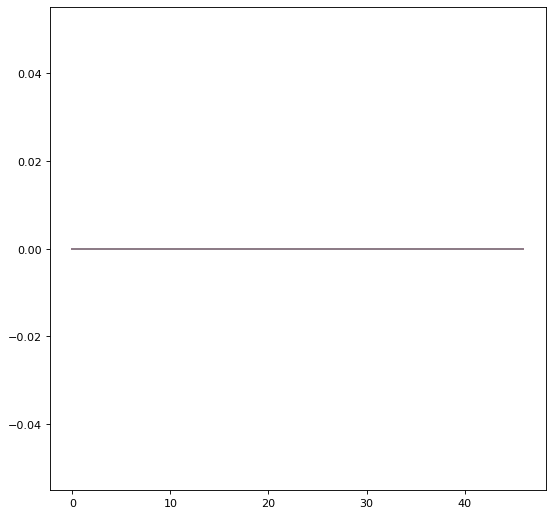

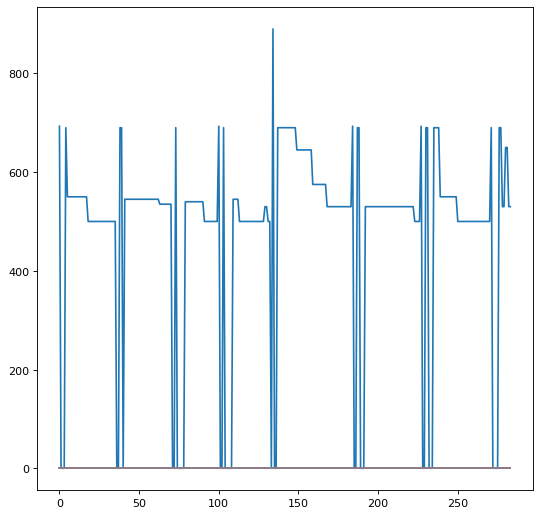

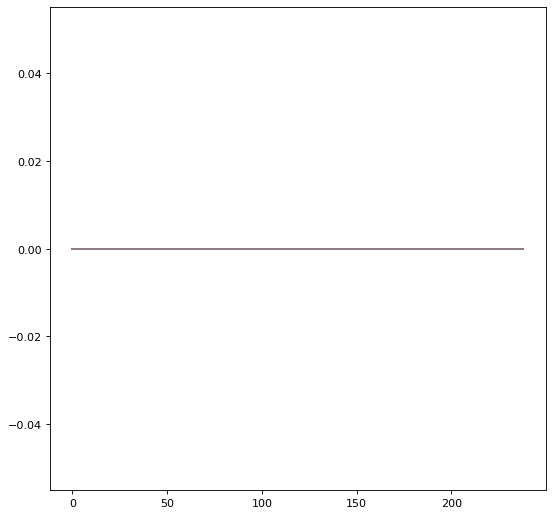

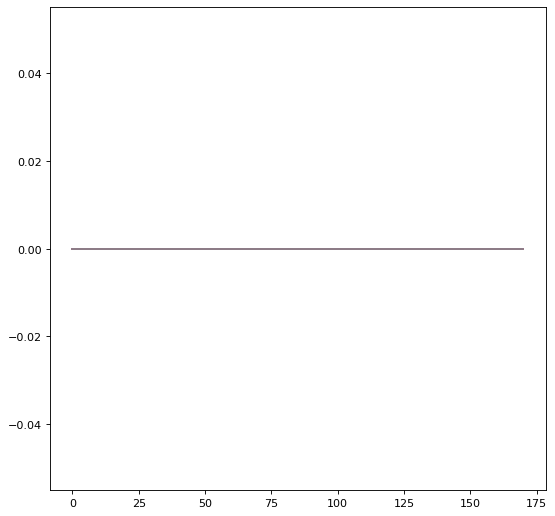

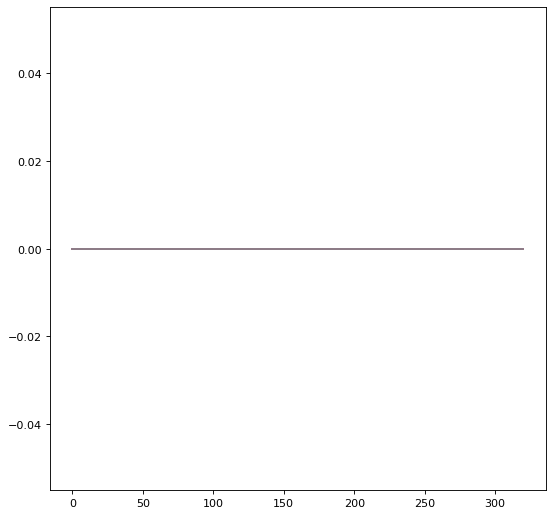

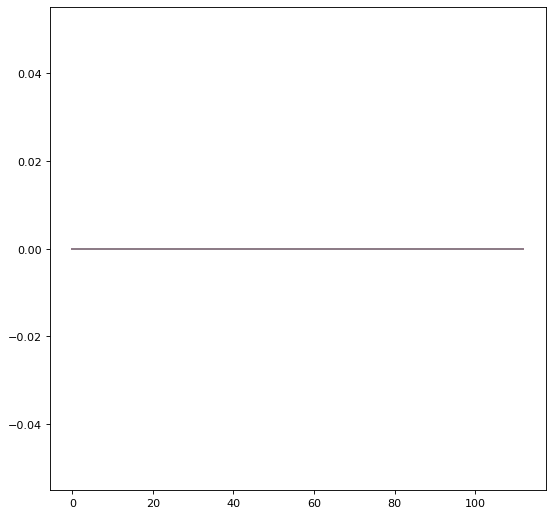

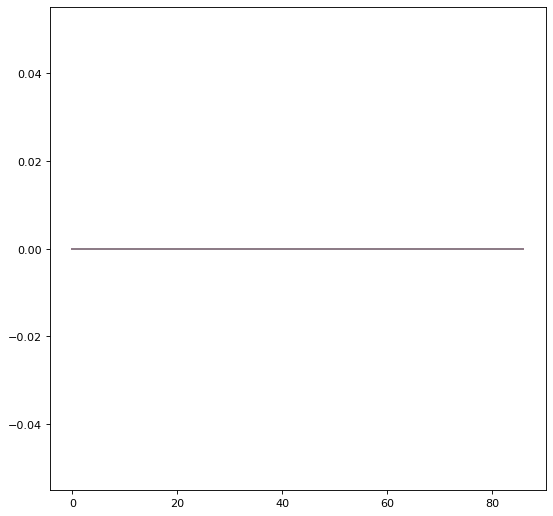

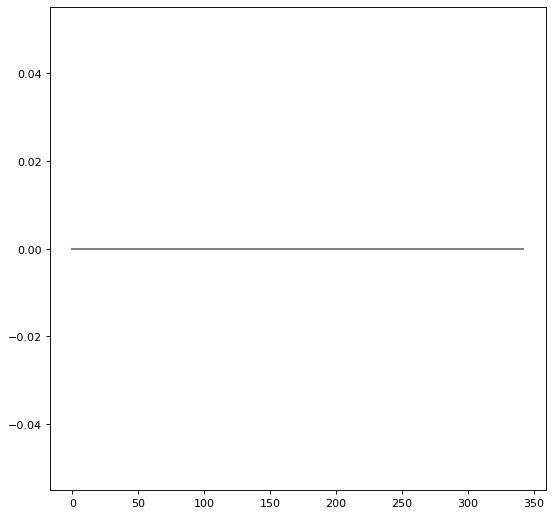

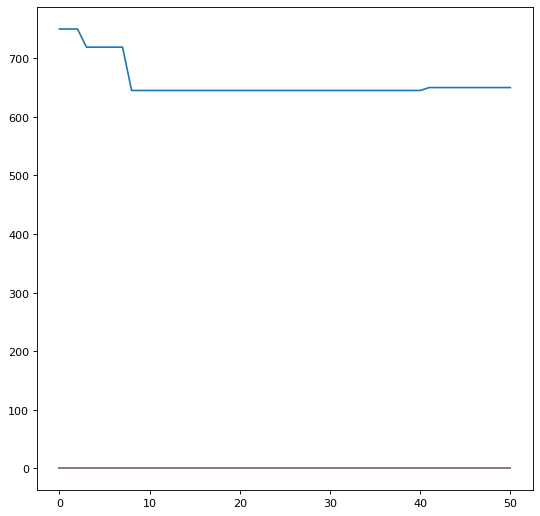

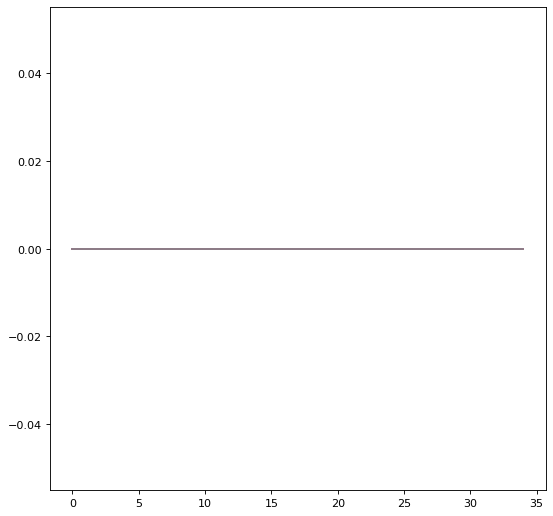

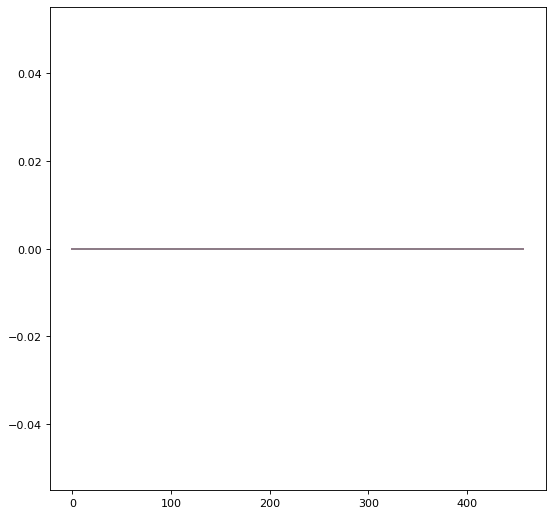

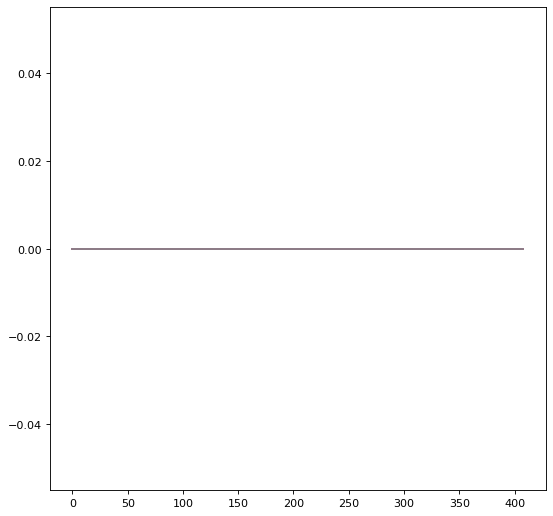

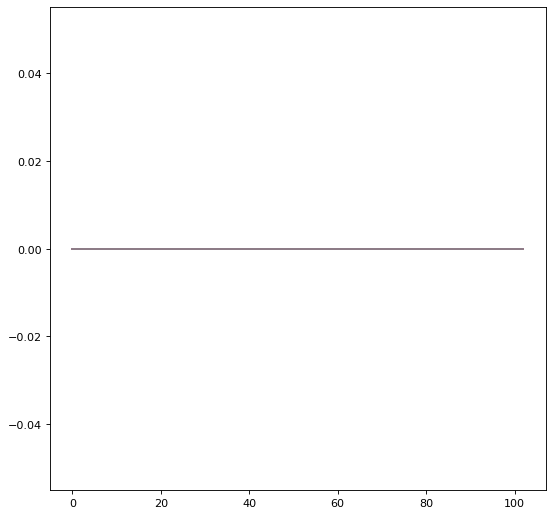

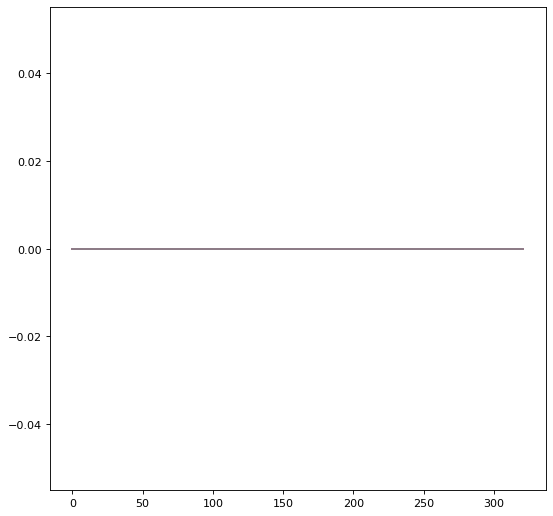

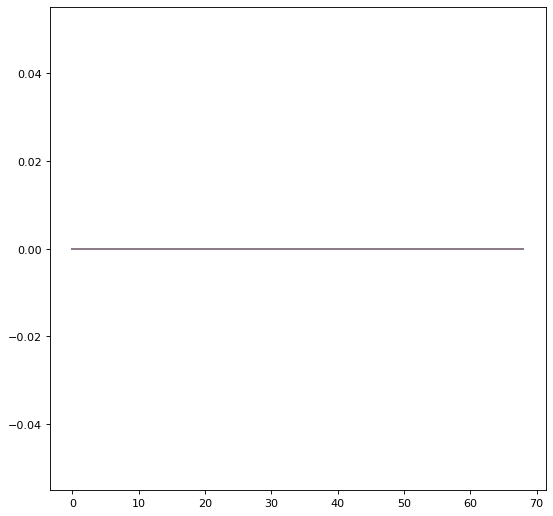

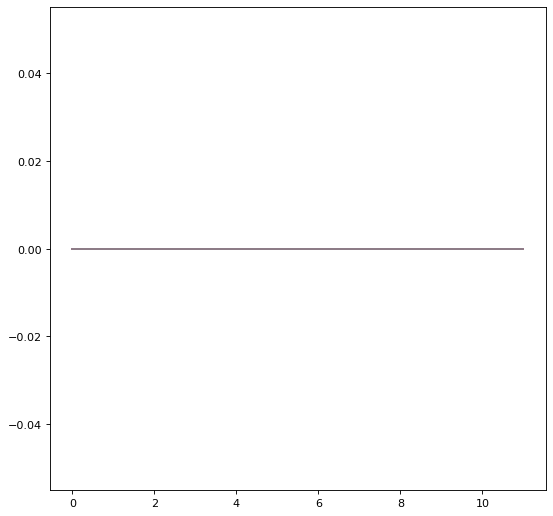

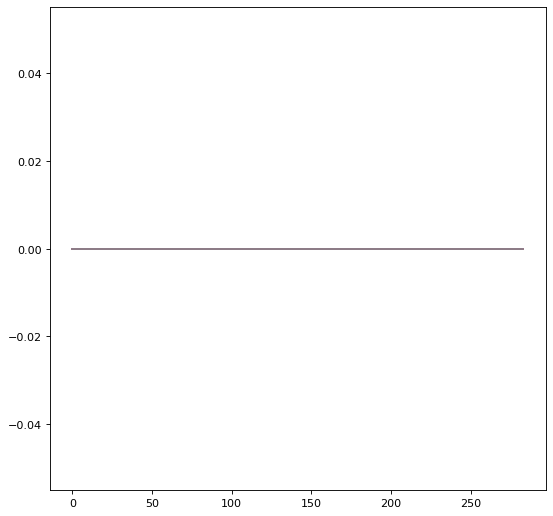

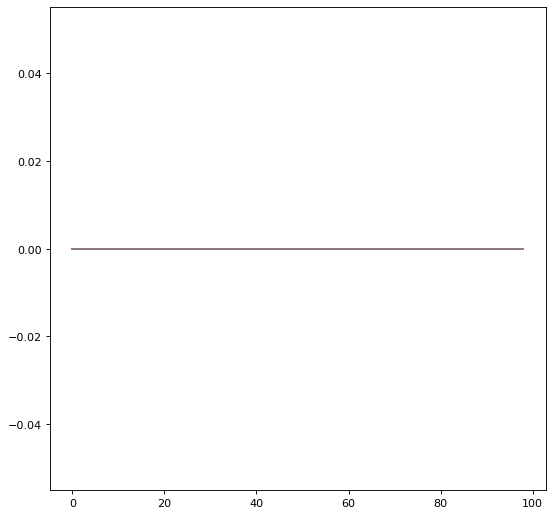

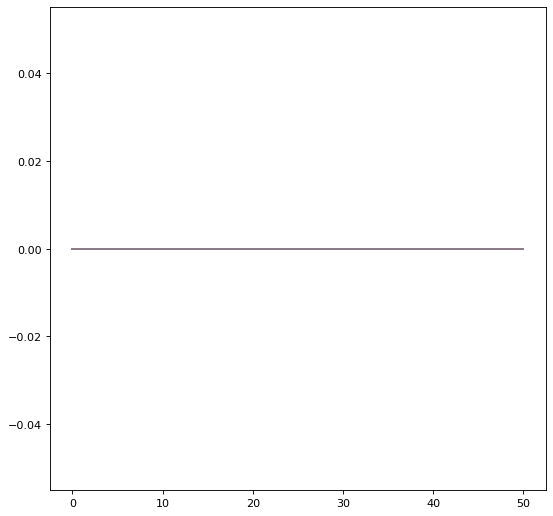

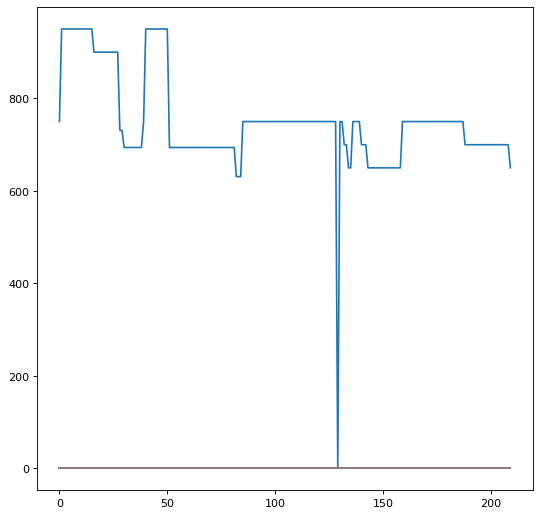

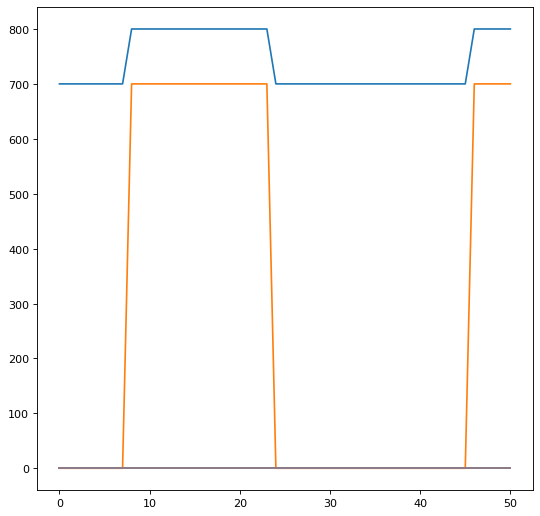

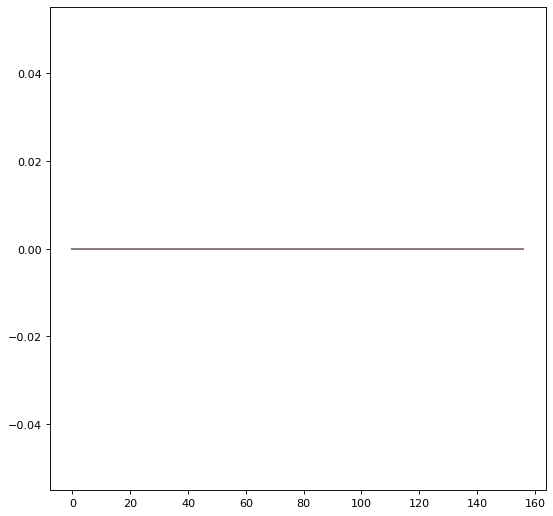

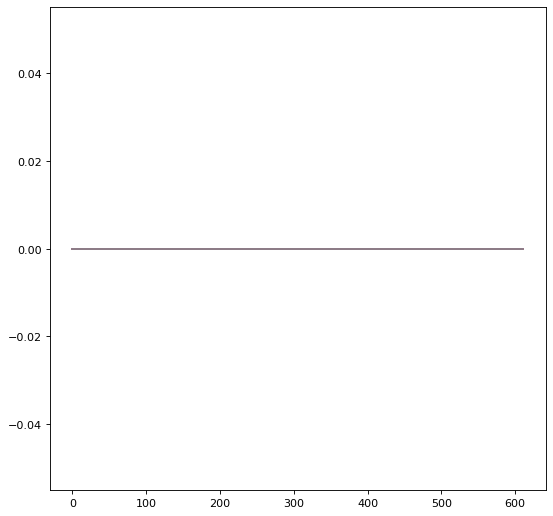

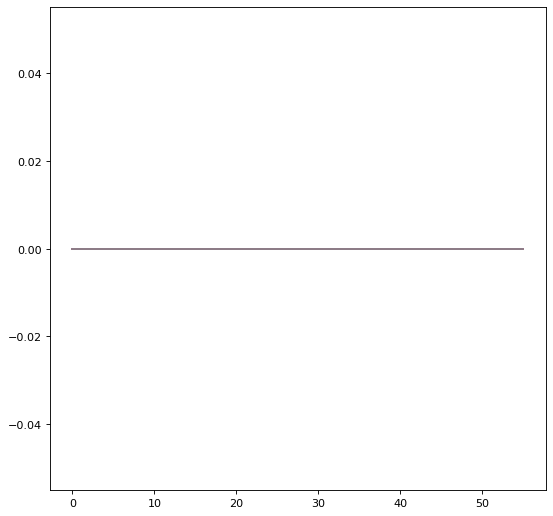

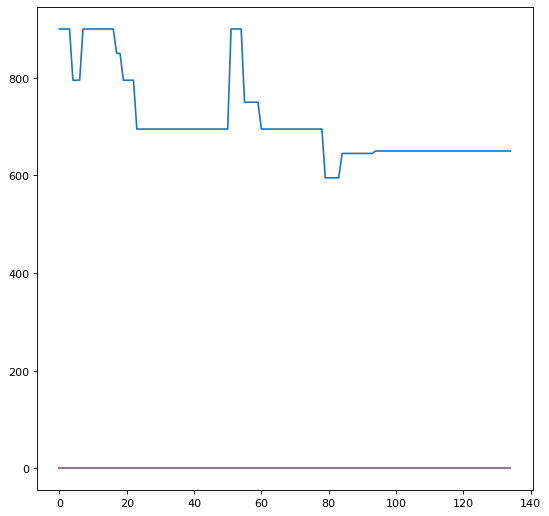

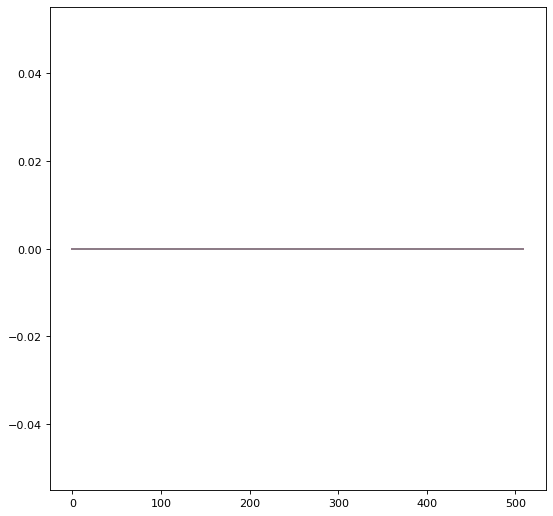

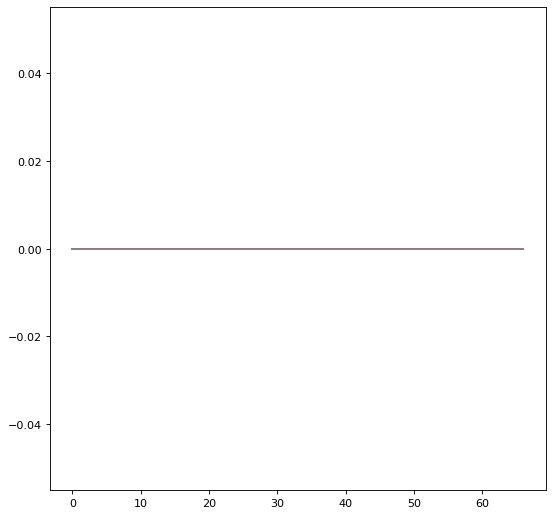

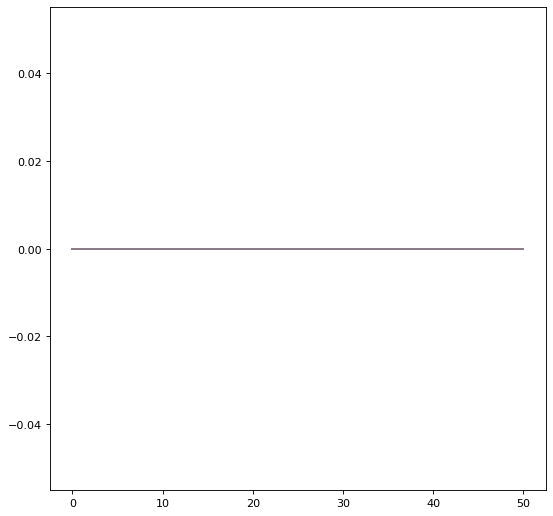

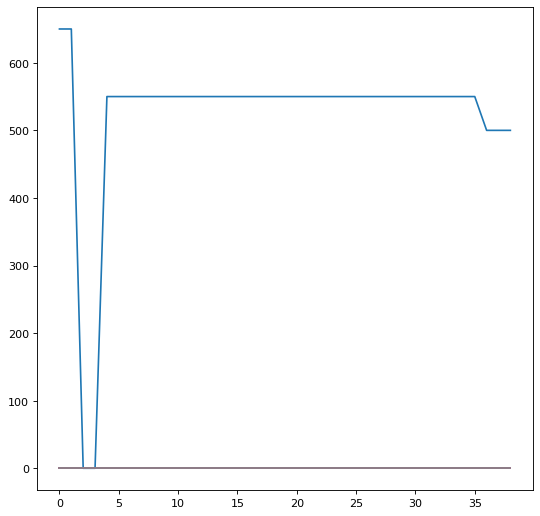

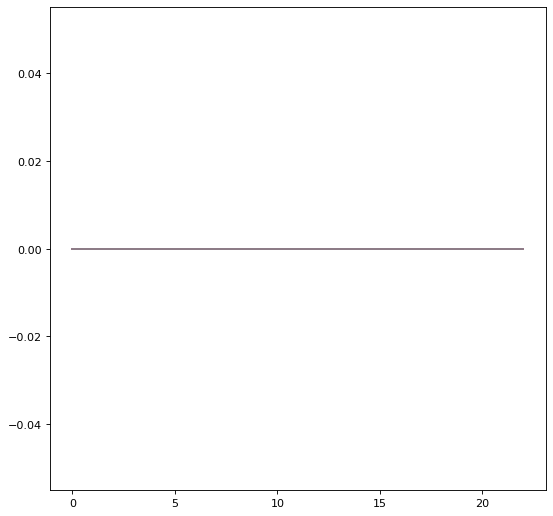

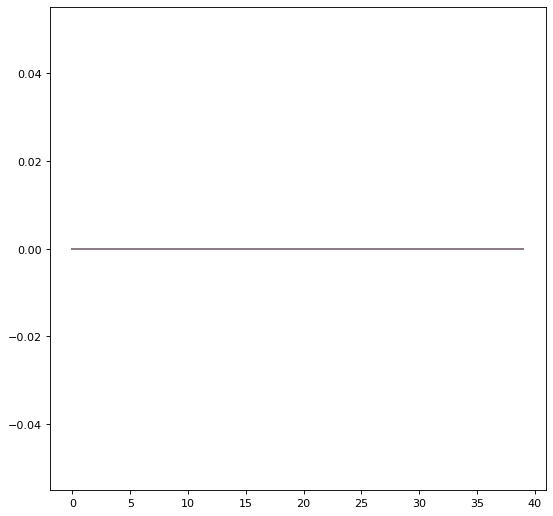

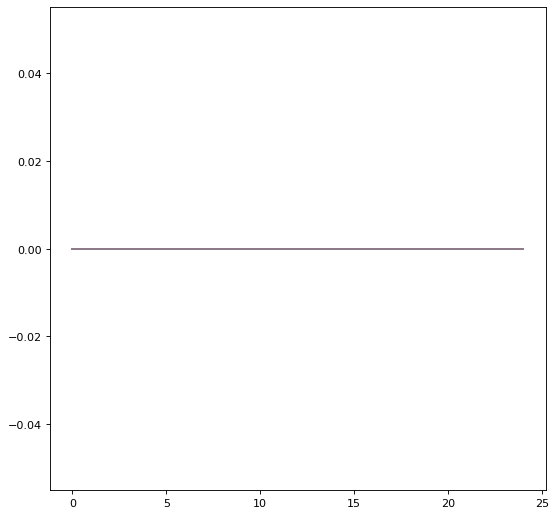

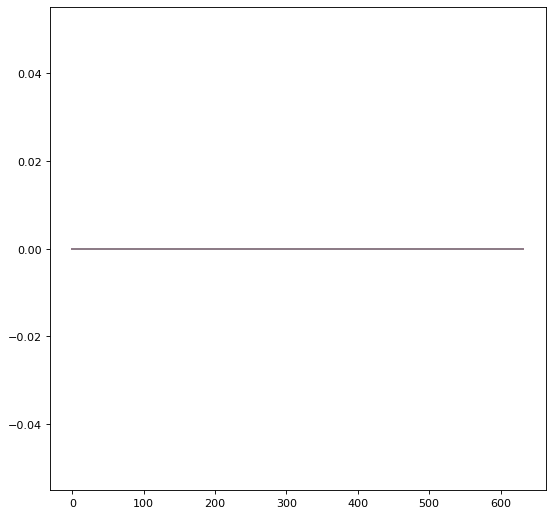

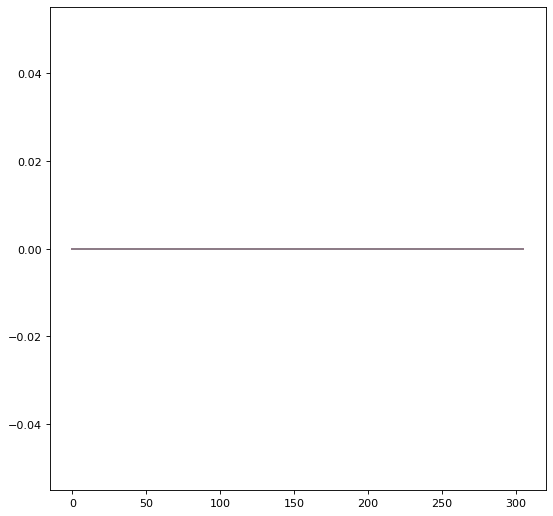

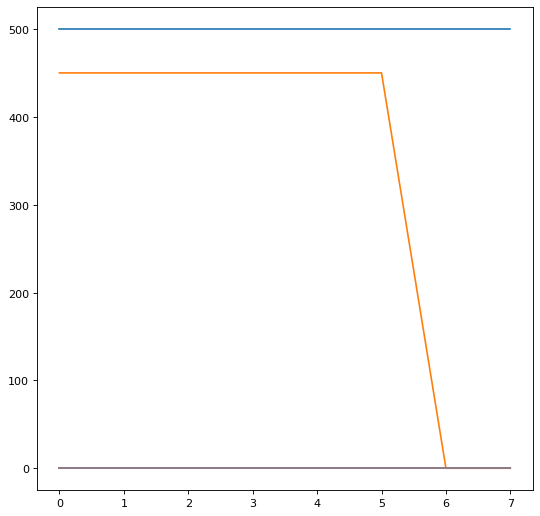

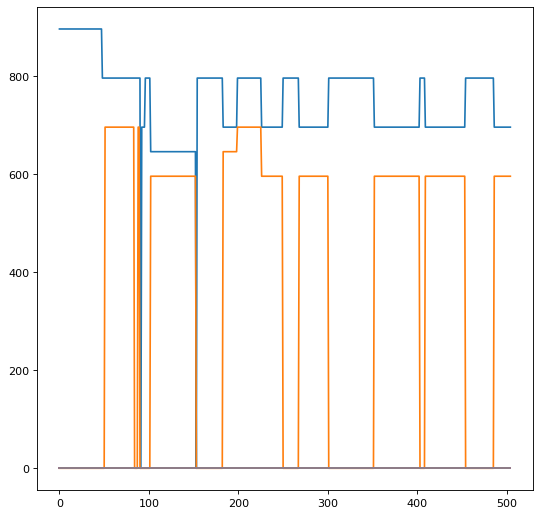

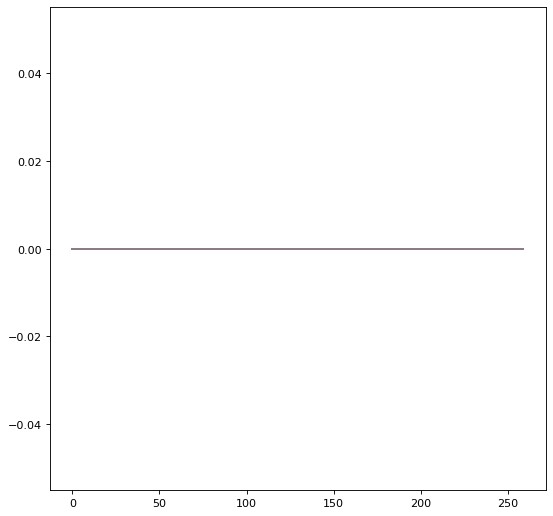

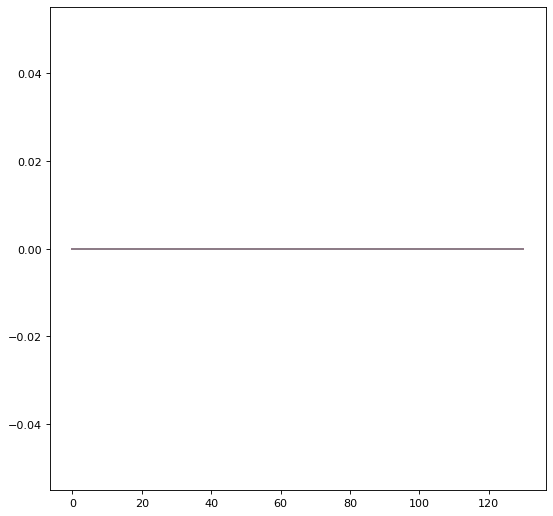

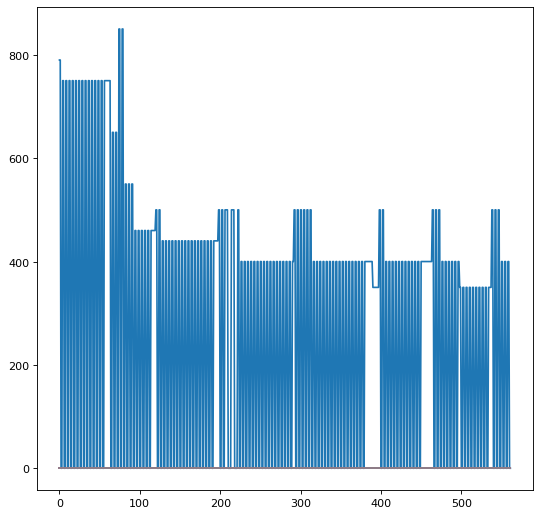

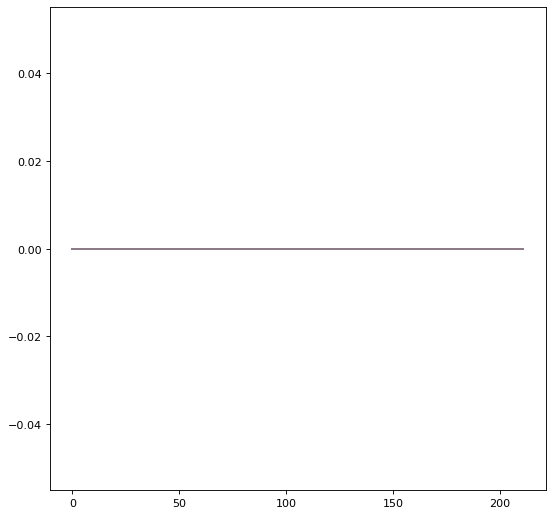

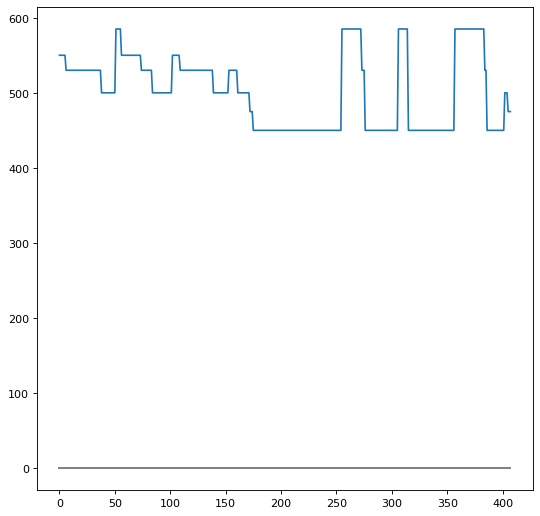

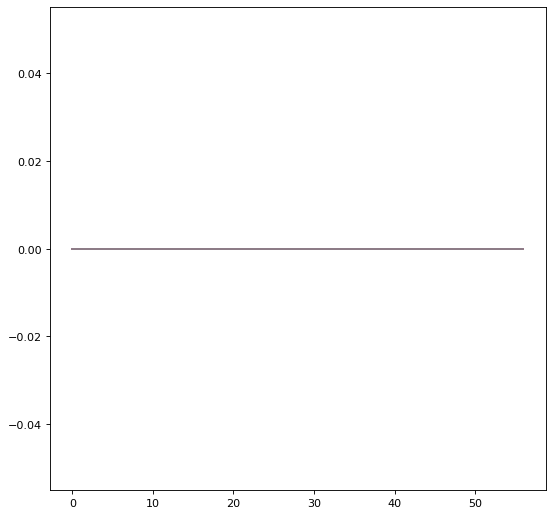

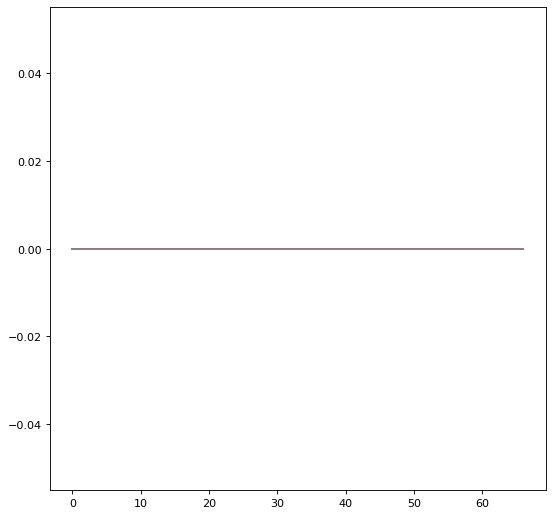

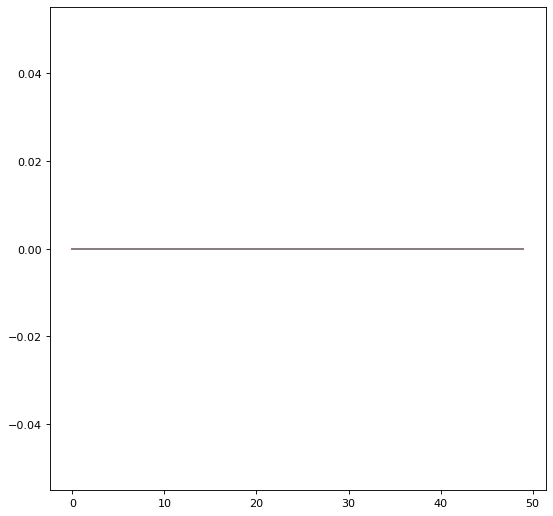

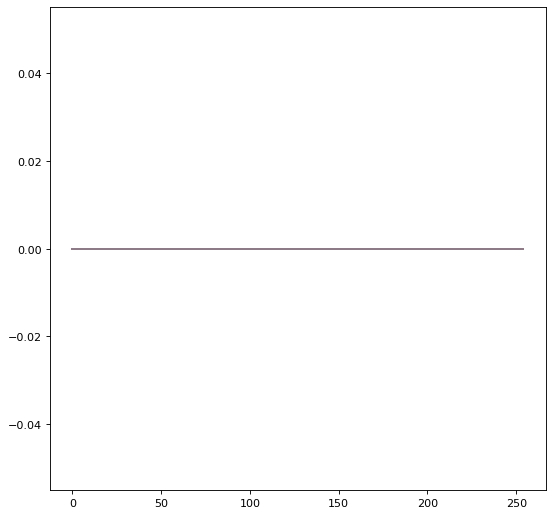

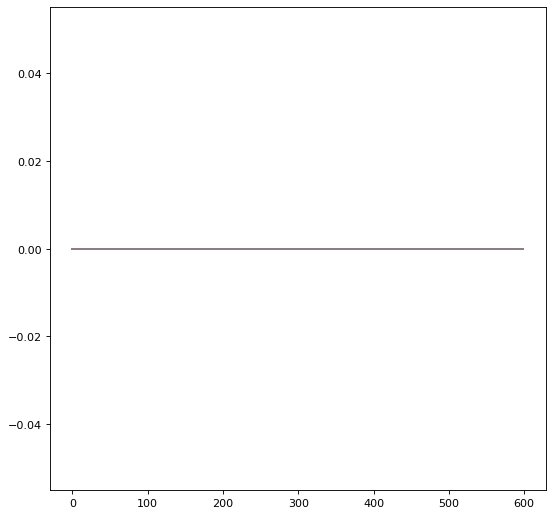

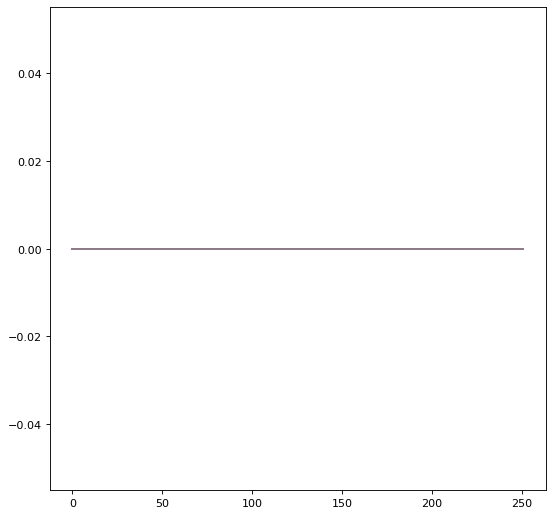

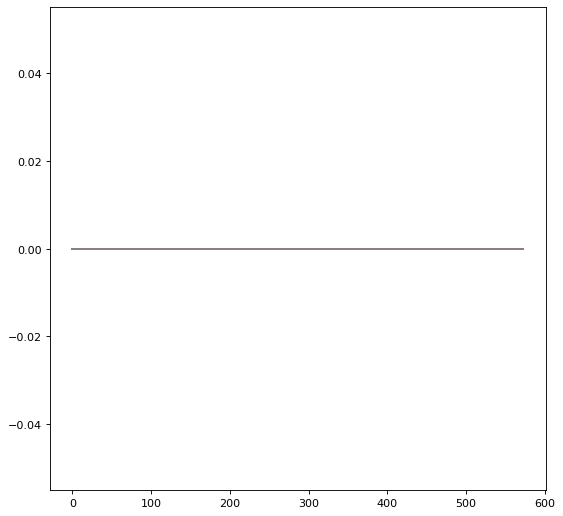

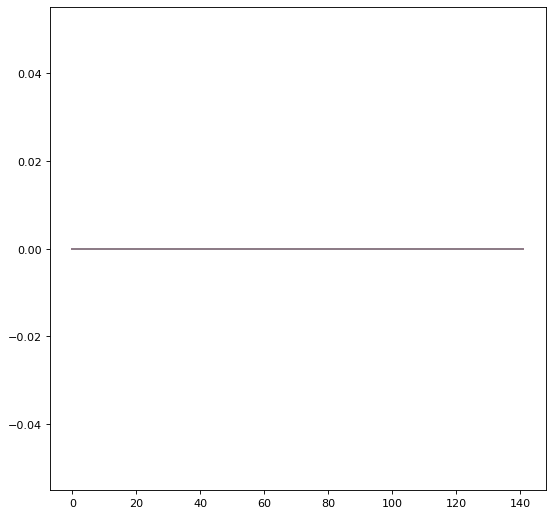

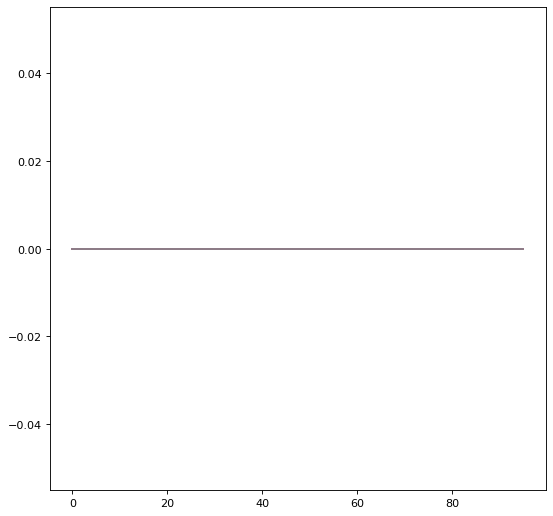

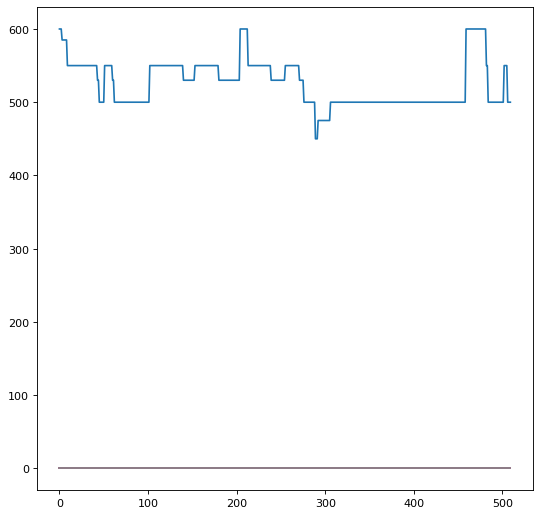

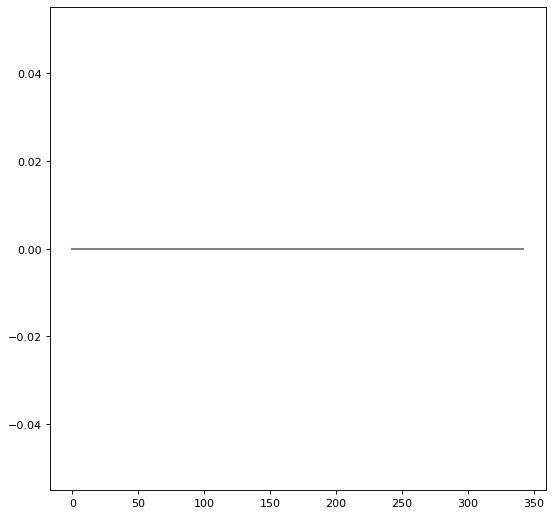

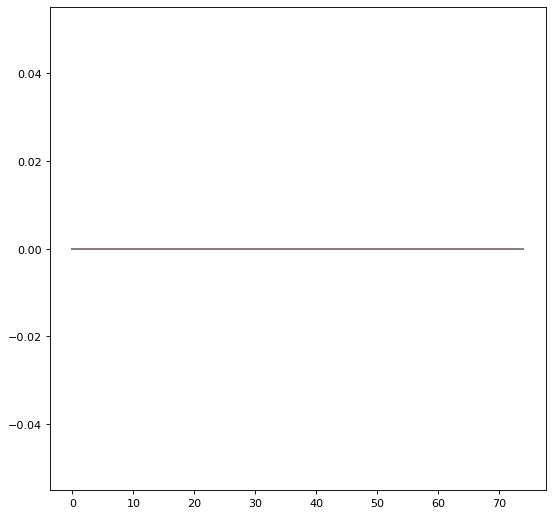

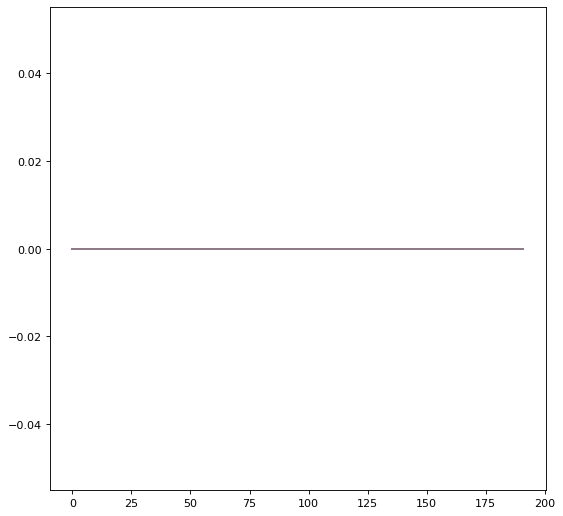

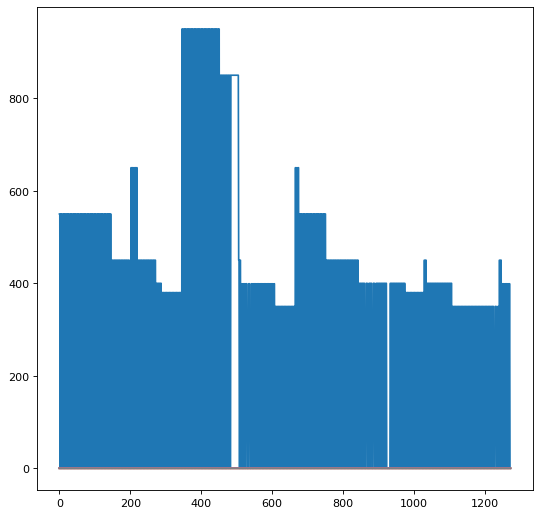

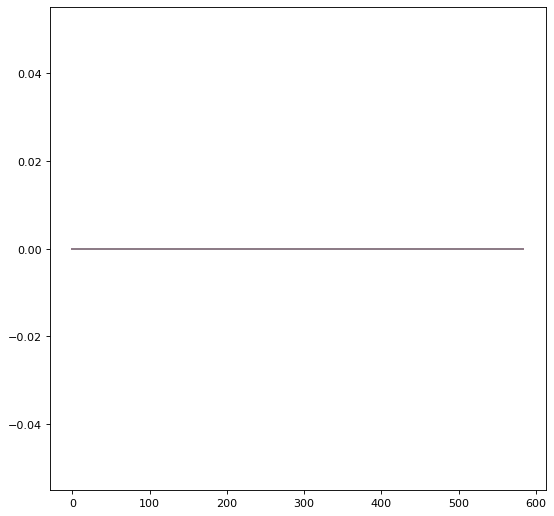

In [137]:
# making list of data for plotting for rate type - 2..

from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
plot_bus = []
for bus in buses:
  plot_bus.append(final_dic_2[bus])
print(len(plot_bus))

for i in range(117):
  figure(figsize=(8, 8), dpi=80)
  plt.plot(plot_bus[i])
  plt.show()